<a href="https://colab.research.google.com/github/alvarofpinheiro/pifwia_abc/blob/main/PIFWIA_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial Bee Colony (ABC) 
Deverá ser implementado o algoritmo ABC em seu modo clássico para otimizar a função 
Rastrigin(https://en.wikipedia.org/wiki/Rastrigin_function). Os parâmetros que devem ser 
utilizados são: 
● N: 100 
● SN: N/2 
● Cmax: 1000 
● limite: 10 
● fitness: igual a saída da função objetivo 
● limites da função: -5,12 e 5,12 
Deverão ser feitas simulações das seguintes formas: 
● Utilizando o cálculo de atualização de posição tradicional. 
● Utilizando o cálculo de atualização de distância tradicional mas, ao invés de escolher 
uma abelha aleatória para xjk, fazer um sorteio como o que é feito para escolher uma fonte de alimento. 
● Utilizar o cálculo de atualização de posição tradicional mas, ao invés de escolher 
uma abelha aleatória para xjk, escolher uma abelha que esteja na mesma fonte de alimento (pode ser aleatório ou um sorteio com pesos probabilísticos como o 
anterior). 
Para cada simulação faça 30 rodadas e desenhe o gráfico de convergência com a média 
das rodadas e também um box plot com o melhor resultado de cada rodada. 
No relatório aponte as diferenças que percebeu nas diferentes execuções, os motivos que 
conseguiu perceber para essa diferença e comente os gráficos. 
Referências 
● Karaboga, Dervis. An idea based on honey bee swarm for numerical optimization. 
Vol. 200. Technical report-tr06, Erciyes university, engineering faculty, computer 
engineering department, 2005. 
Escola Politécnica da Universidade de Pernambuco POLI-UPE Mestrado de Engenharia da Computação 
● Karaboga, Dervis, and Bahriye Akay. "A modified artificial bee colony (ABC) algorithm 
for constrained optimization problems." Applied soft computing 11.3 (2011): 
3021-3031. 


In [1]:
#bibliotecas

from numpy.random import choice
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#Abelha
#As abelhas são as unidades base da otimização, elas divididas em dois tipos:
#Exploradoras: são as responsáveis por sair do ninho em busca de uma fonte de alimento com (exploration). De posse da informação que determina a qualidade da fonte (fitness) retornam para o ninho e dividem esta informação com as oportunistas.
#Trabalhadoras: escolhem uma fonte de alimento para explorar de acordo com seu fitness, são as responsáveis por explorar a vizinhança de uma fonte de alimento (exploitation)

class Exploradora:
  def __init__(self):
        self.posicao = None
        self.trabalhadoras = []
        self.ciclos_sem_melhora = 0

class Trabalhadora:
  def __init__(self):
        self.posicao = None

In [3]:
#Atributos do ABC
#Tamanho da População (N): quantidade de abelhas na colônia.
#Número de fontes de alimento (NF): quantidade de fontes de alimento que a colônia irá explorar, consequentemente a quantidade de abelhas campeiras. Comumente utilizada como metade da quantidade de abelhas.
#Quantidade de ciclos sem melhora (limite): quando a quantidade de ciclos de exploração de uma fonte de alimento atingir esse valor a fonte é abandonada e as abelhas exploradoras buscam outra aleatoriamente.
#Quantiddade máxima de ciclos (Cmax): define quantas iterações de exploração das fontes serão feitas.

n = 100
nf = int(n / 2)
limite = 10
cmax = 1000

In [5]:
#Definição da função objetivo

def custo(posicao): 
  return sum([coord ** 2 for coord in posicao])

def fitness(posicao):
  return 1 / abs(custo(posicao))

### Função *Sphere*

$f(x) = \sum_{i=1}^{D} x_i^2$

<img src=https://www.researchgate.net/profile/Raed_MaraBeh/publication/325659052/figure/fig7/AS:635571554766858@1528543475410/Two-dimensional-Sphere-function.png width="500">

In [6]:
#Inicialização da colônia

exploradoras = []
trabalhadoras = []

for i in range(nf):
  exploradora = Exploradora()
  exploradora.posicao = [random.uniform(-5.12, 5.12), random.uniform(-5.12, 5.12)]
  exploradora.melhor_posicao = exploradora.posicao.copy()
  exploradoras.append(exploradora)
  
  trabalhadora = Trabalhadora()
  trabalhadoras.append(trabalhadora)

colonia = exploradoras + trabalhadoras

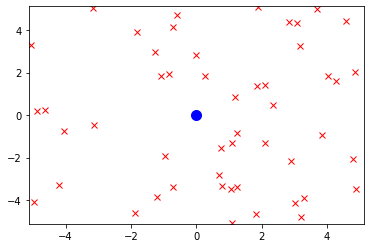

In [7]:
#Posições iniciais das exploradoras

plt.axis([-5.12, 5.12, -5.12, 5.12])
plt.plot(0,0, marker='o', markersize=10, color='b')

for i in range(nf):
    abelha = exploradoras[i]
    x, y = zip(abelha.posicao)
    plt.plot(x, y, marker='x', color='r')

plt.show()

In [8]:
#Escolha das fontes de alimento

def alocar_abelhas(abelhas):
  # faz a soma dos fitness das abelhas exploradoras
  soma_fitness = 0
  
  for i in range(nf):
    soma_fitness += fitness(exploradoras[i].posicao)

  # cria a distribuição de probabilidades de acordo com o fitness calculado
  distribuicao_probabilidade = []
  
  for i in range(nf):
    probabilidade_alocacao = fitness(exploradoras[i].posicao) / soma_fitness
    distribuicao_probabilidade.append(probabilidade_alocacao)
  
  # posiciona as oportunitas de acordo com a atratividade das exploradoras, "transformando-as" agora em trabalhadoras
  for abelha in abelhas:
    exploradora = choice(exploradoras, 1, p=distribuicao_probabilidade)[0]
    abelha.posicao = exploradora.posicao.copy()
    exploradora.trabalhadoras.append(abelha)

## Movimentação da abelha exploradora
$v_{ij} = x_{ij} + φ_{ij}(x_{ij} − x_{kj})$

In [9]:
#Movimentação da abelha exploradora

def movimenta_abelha(abelha):
  colonia_candidata = colonia.copy()
  colonia_candidata.remove(abelha)
  abelha_candidata = random.choice(colonia_candidata)

  x = abelha.posicao[0] + random.uniform(-1, 1) * (abelha.posicao[0] - abelha_candidata.posicao[0])
  y = abelha.posicao[1] + random.uniform(-1, 1) * (abelha.posicao[1] - abelha_candidata.posicao[1])
  
  if x < -10:
    x = -10
  elif x > 10:
    x = 10

  if y < -10:
    y = -10
  elif y > 10:
    y = 10

  if fitness([x, y]) > fitness(abelha.posicao):
    abelha.posicao = [x, y]

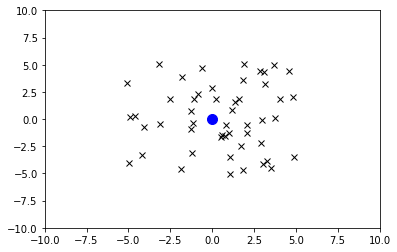

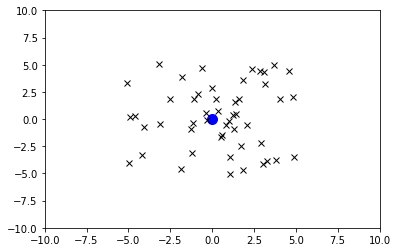

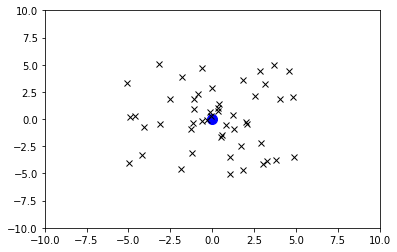

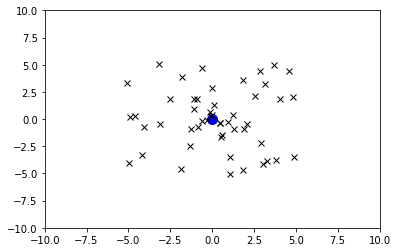

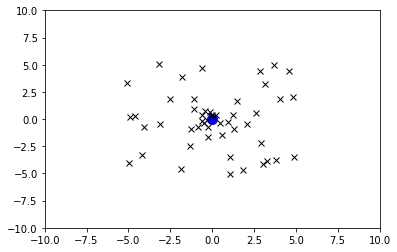

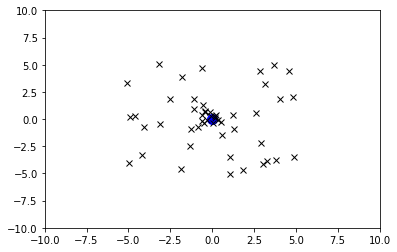

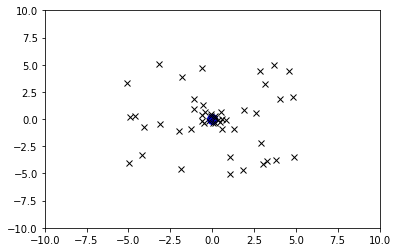

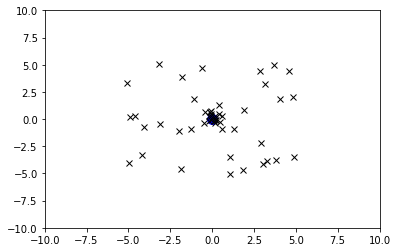

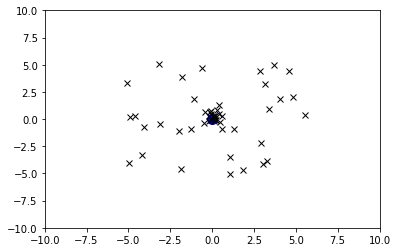

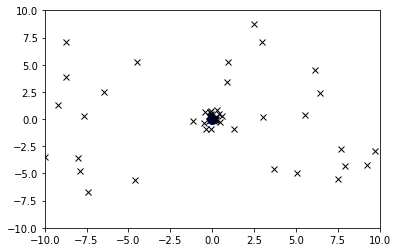

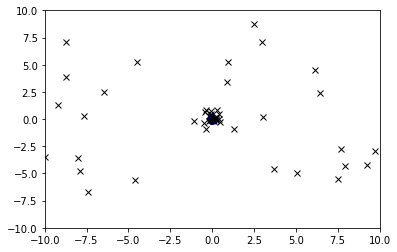

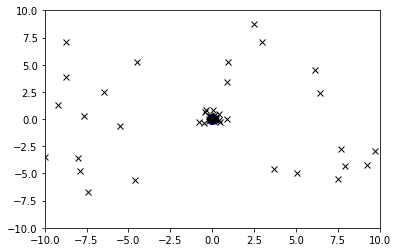

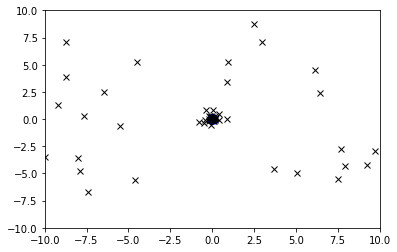

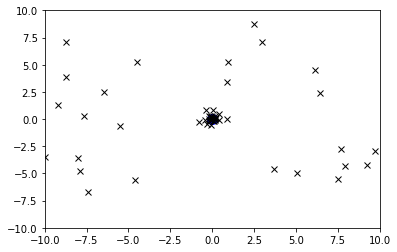

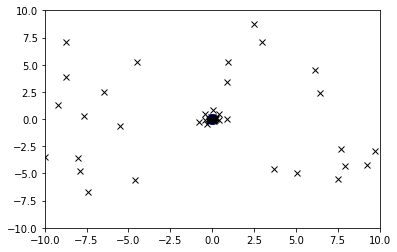

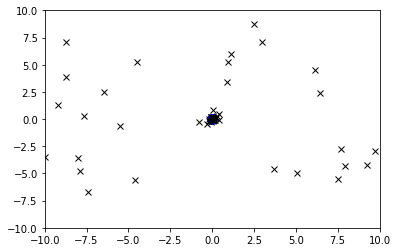

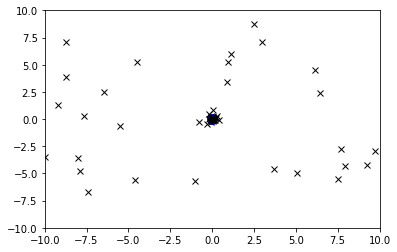

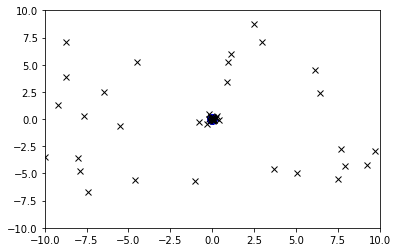

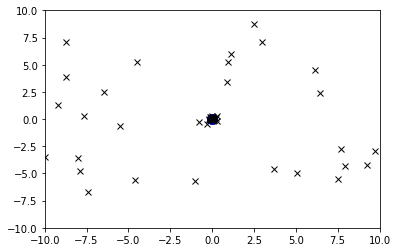

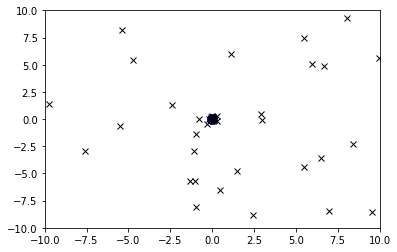

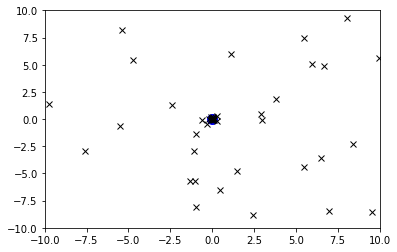

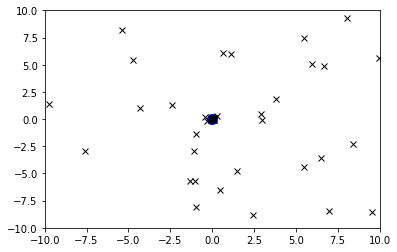

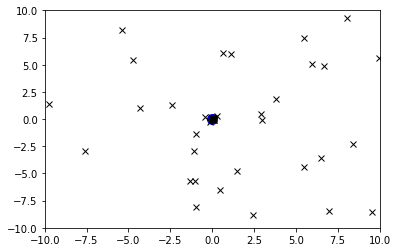

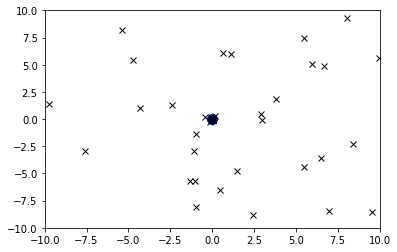

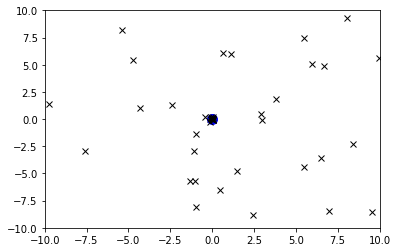

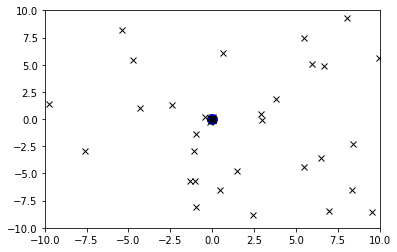

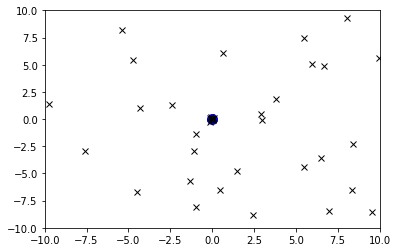

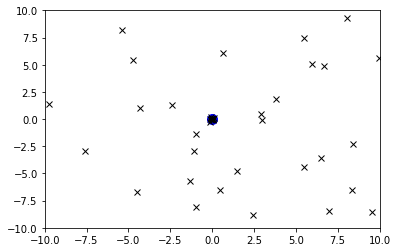

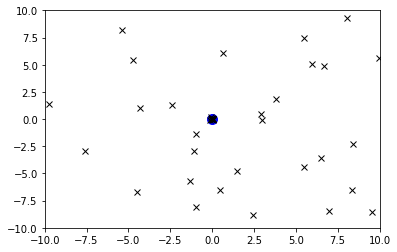

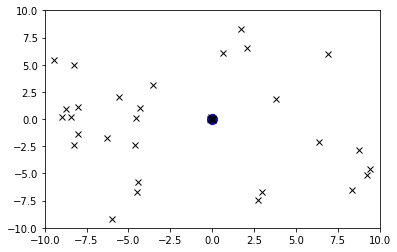

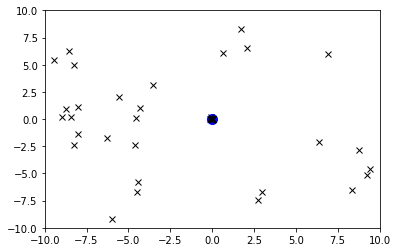

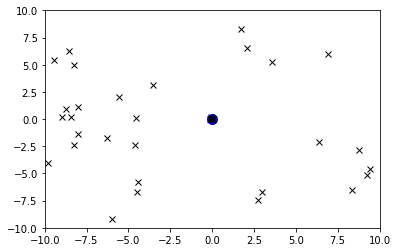

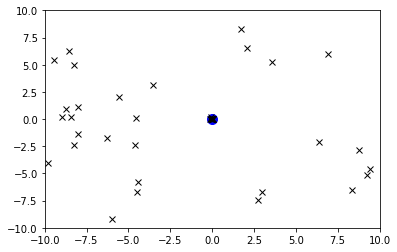

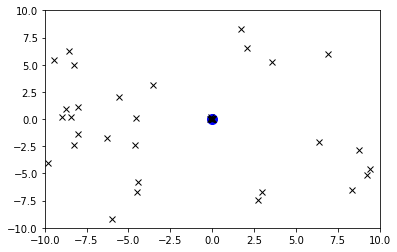

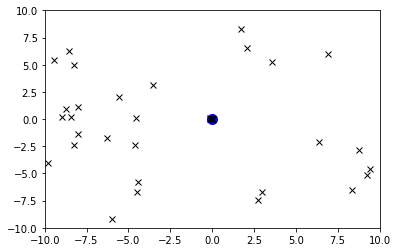

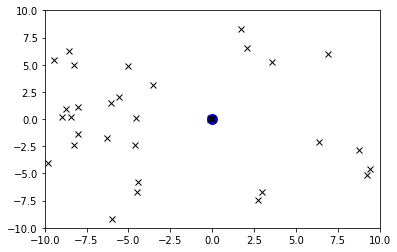

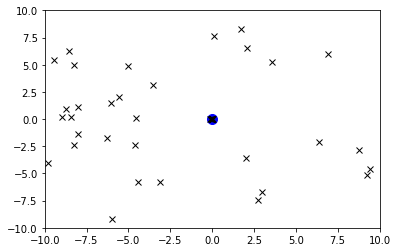

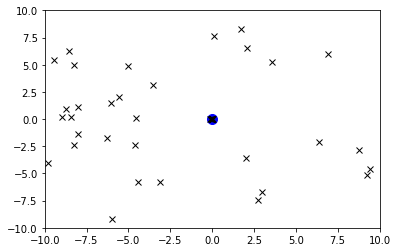

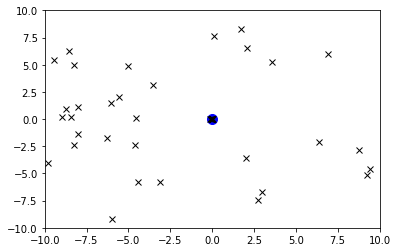

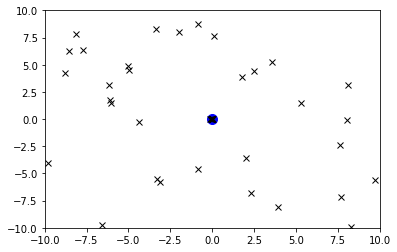

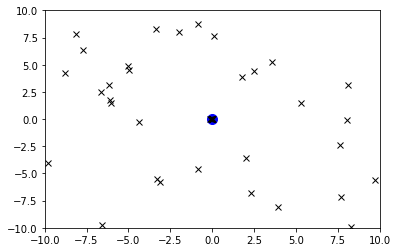

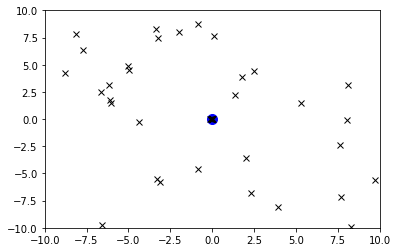

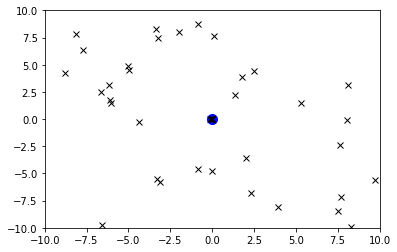

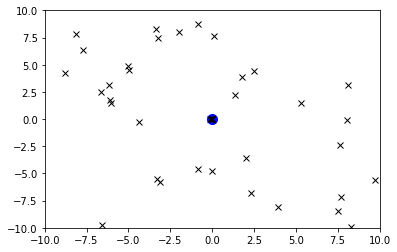

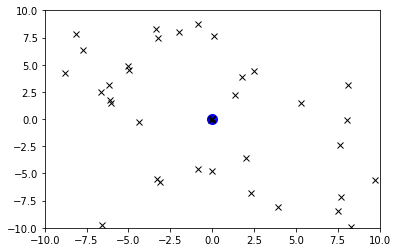

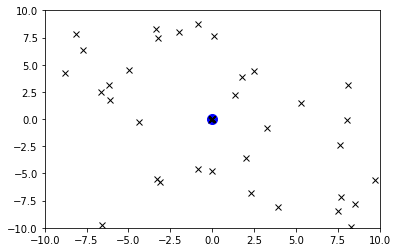

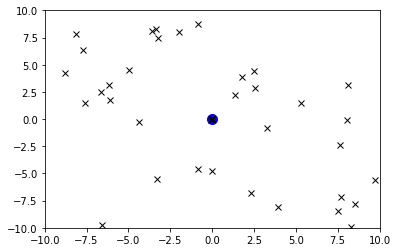

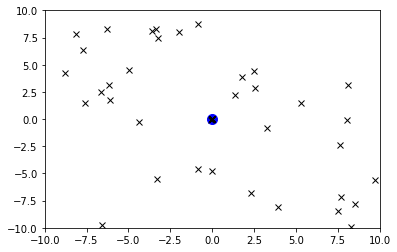

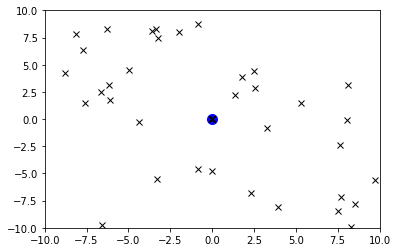

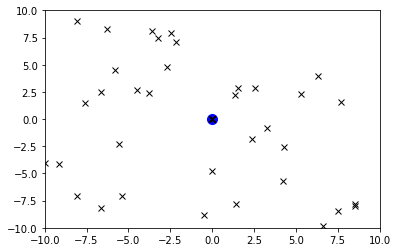

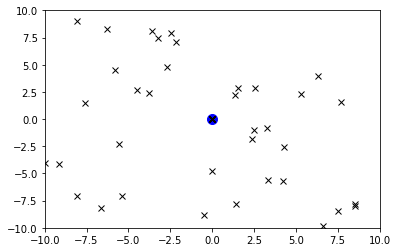

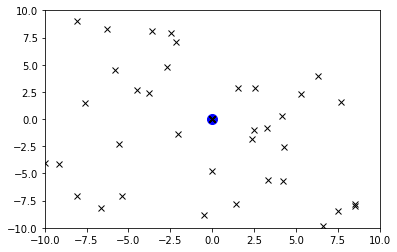

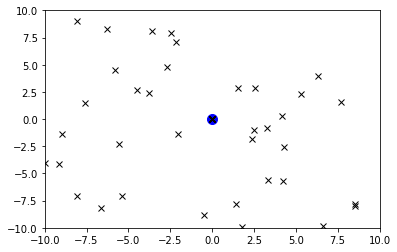

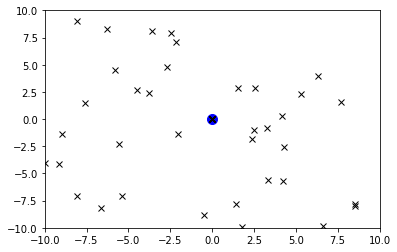

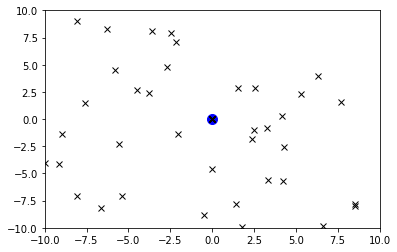

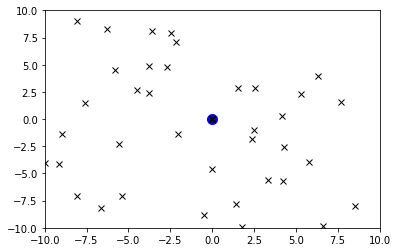

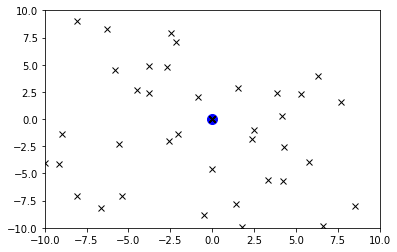

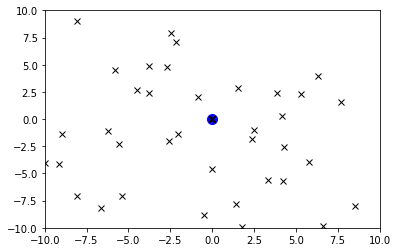

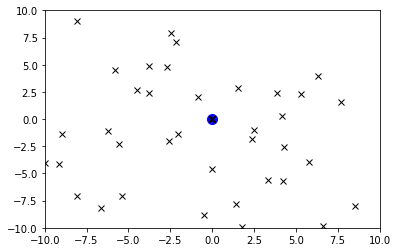

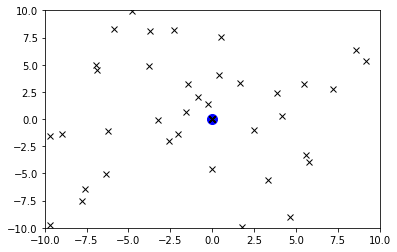

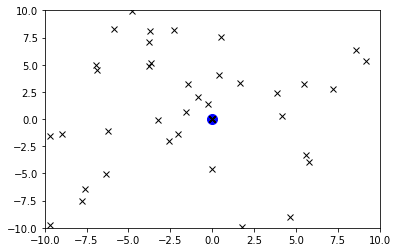

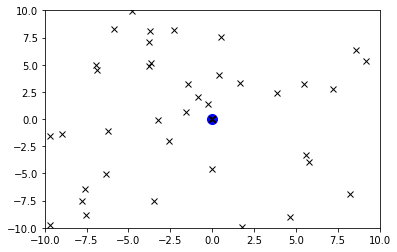

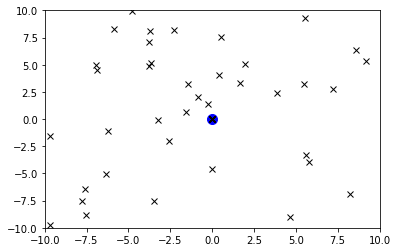

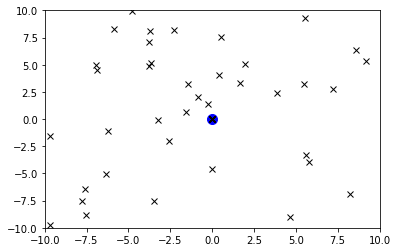

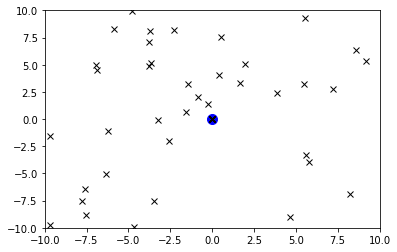

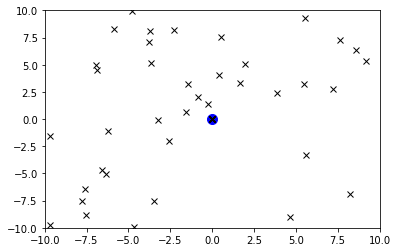

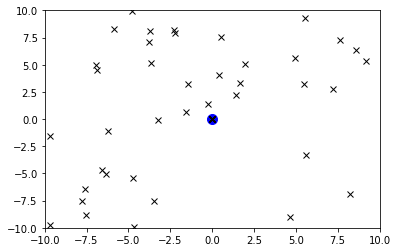

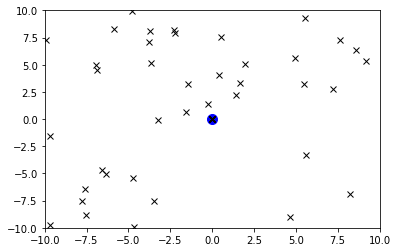

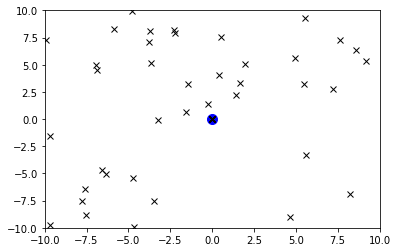

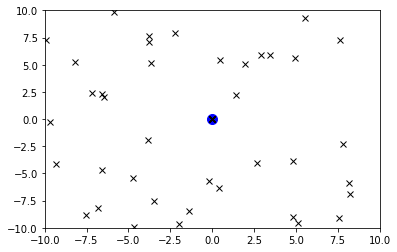

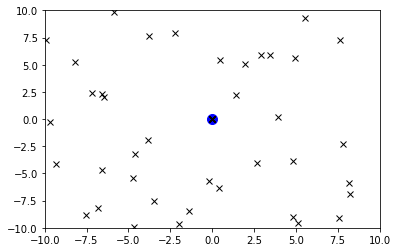

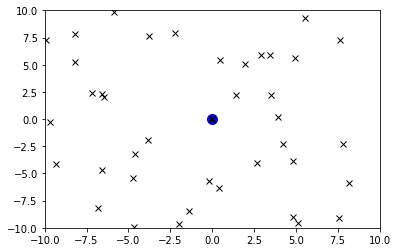

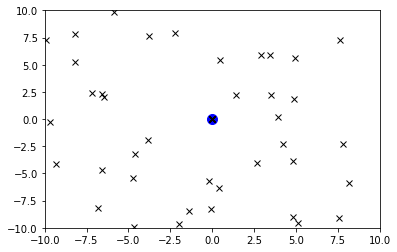

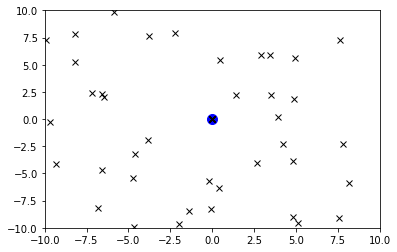

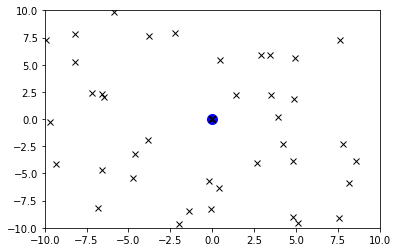

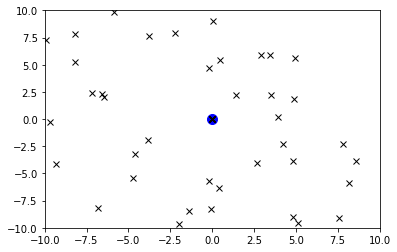

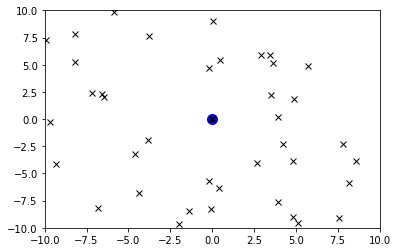

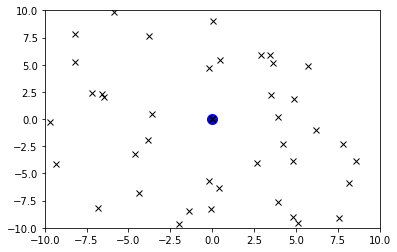

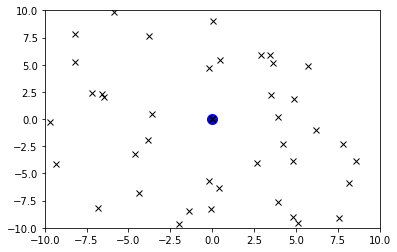

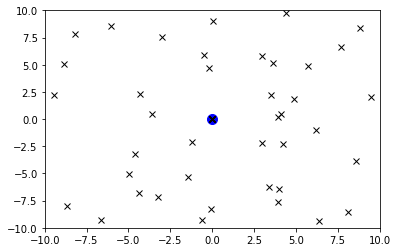

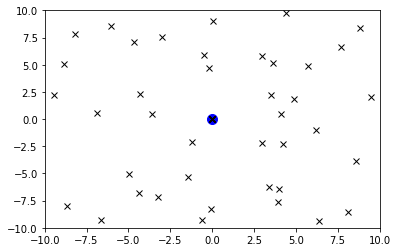

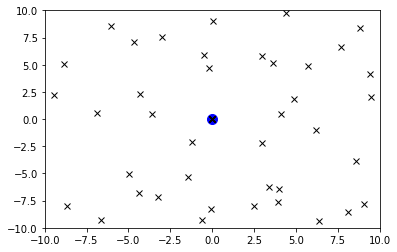

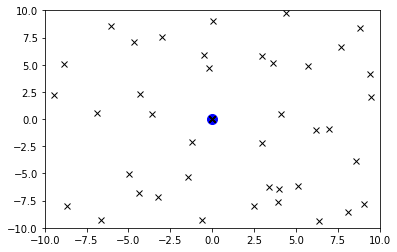

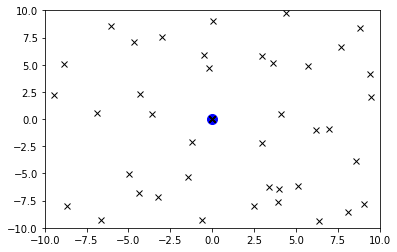

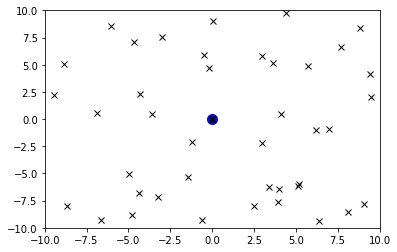

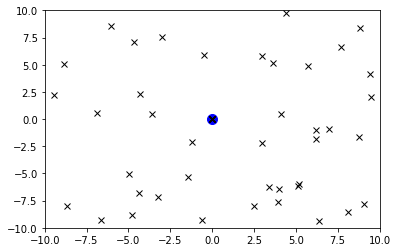

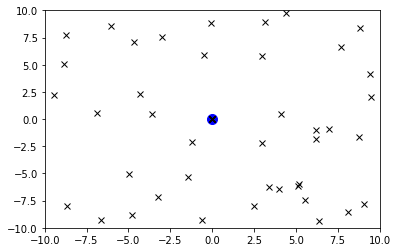

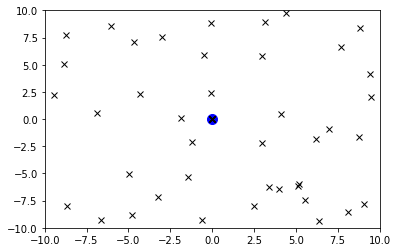

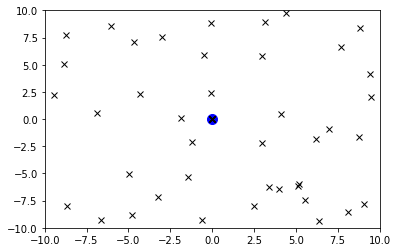

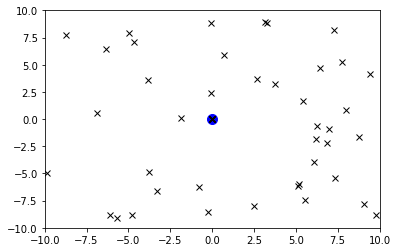

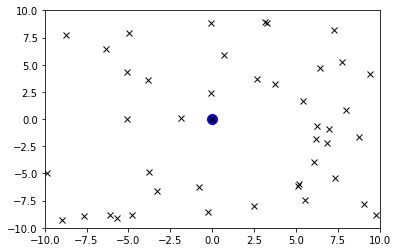

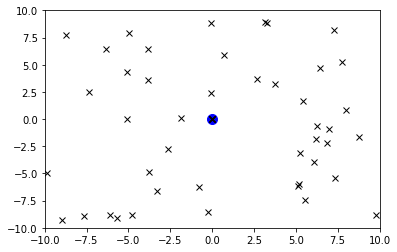

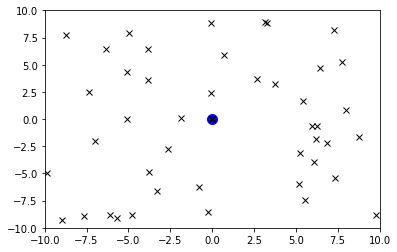

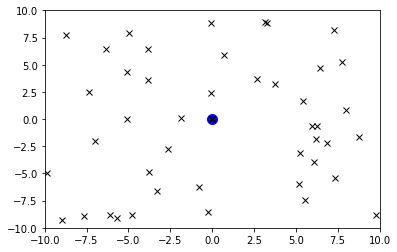

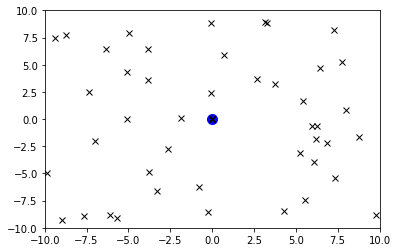

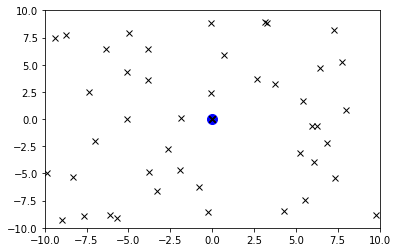

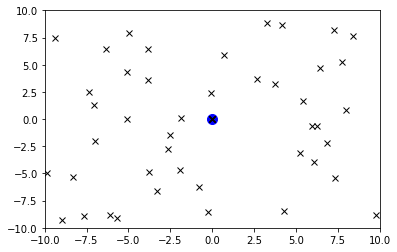

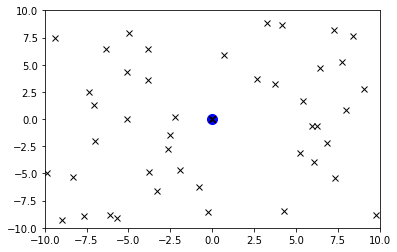

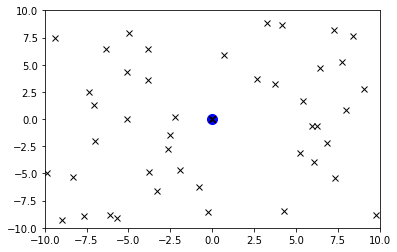

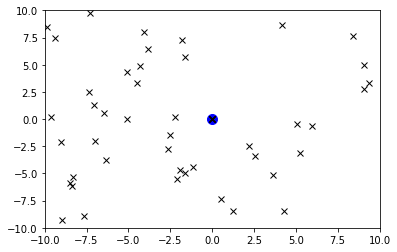

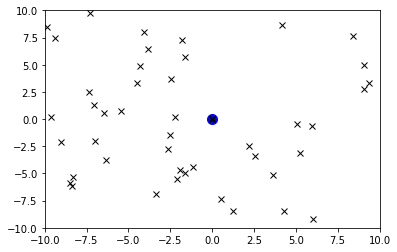

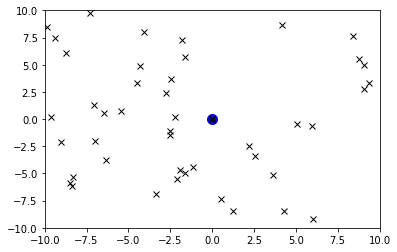

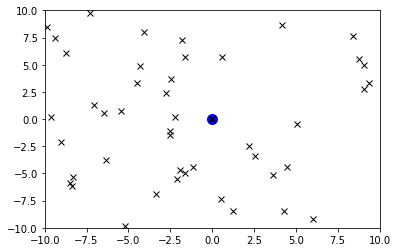

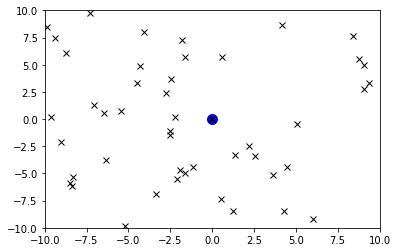

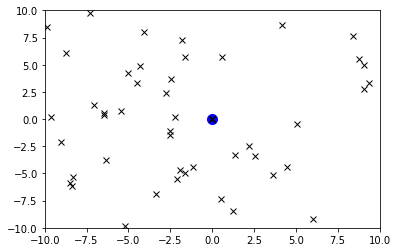

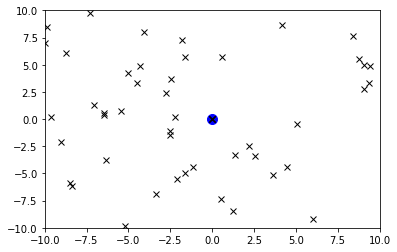

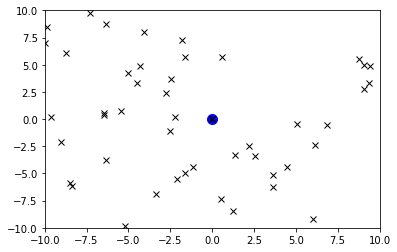

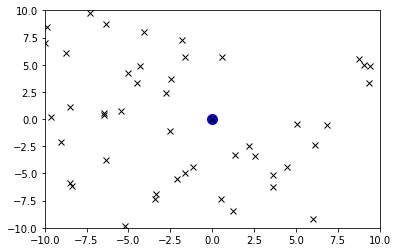

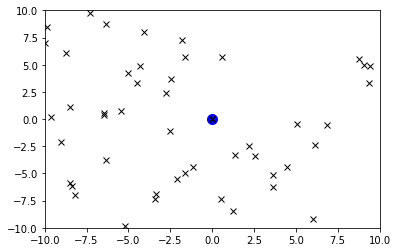

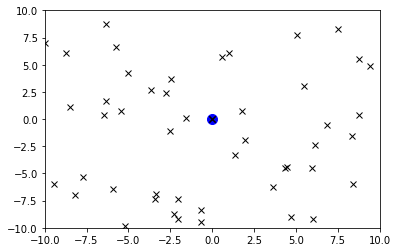

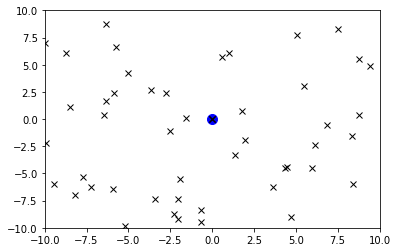

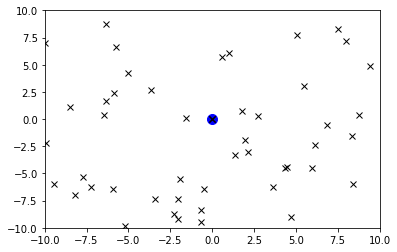

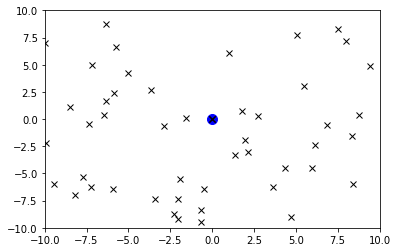

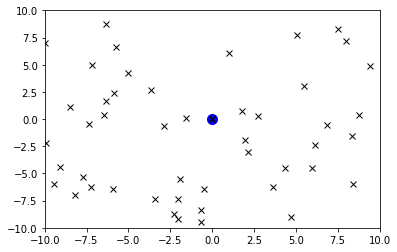

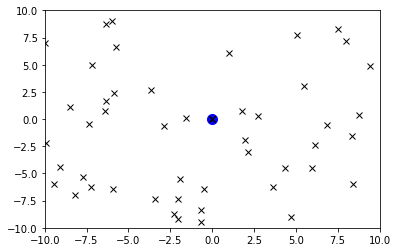

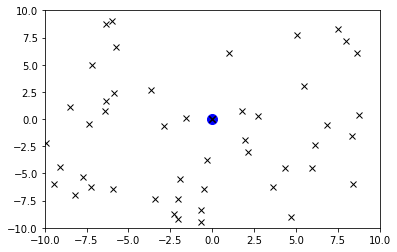

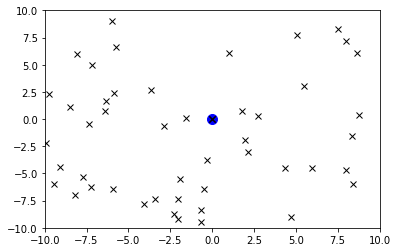

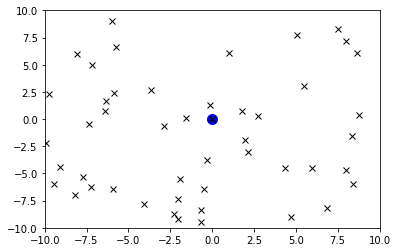

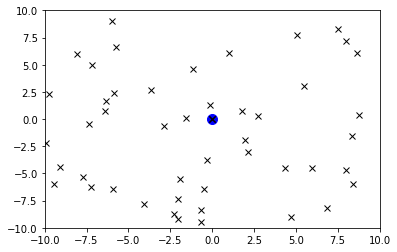

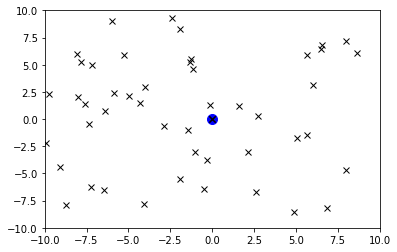

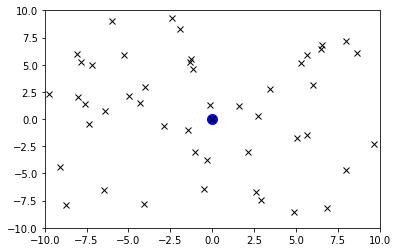

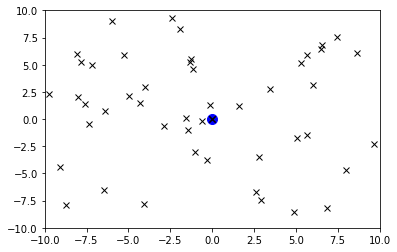

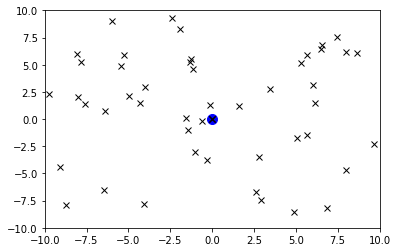

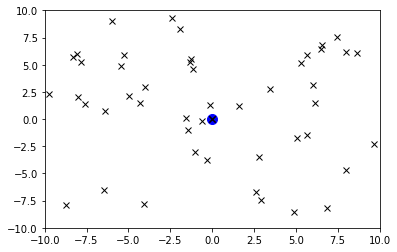

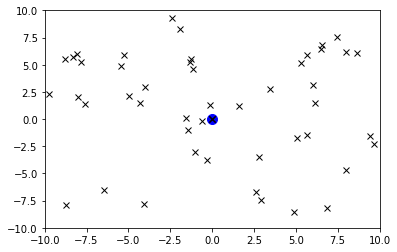

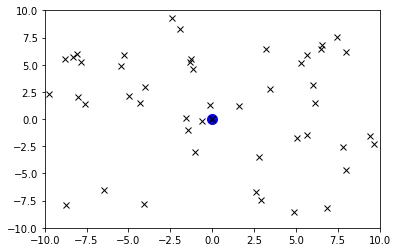

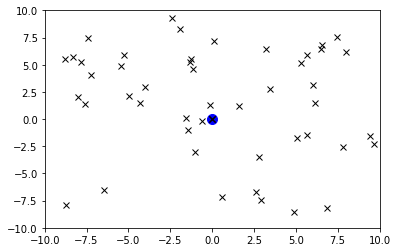

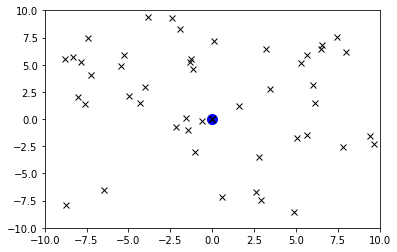

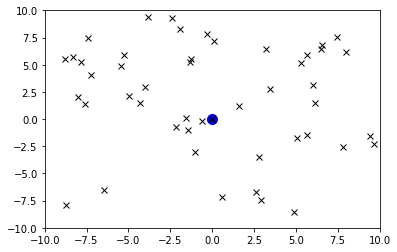

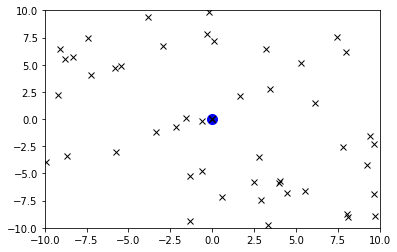

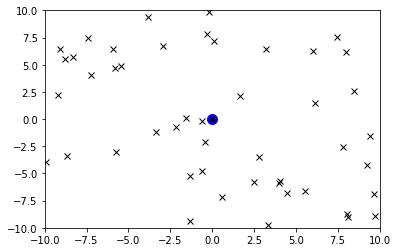

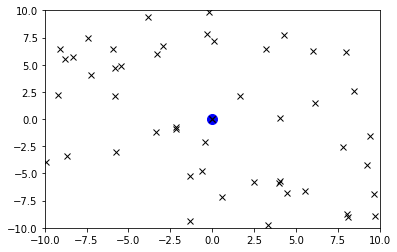

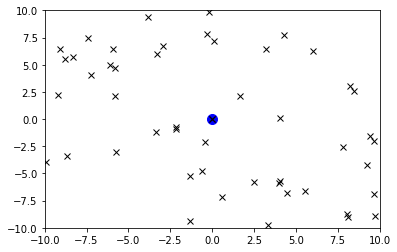

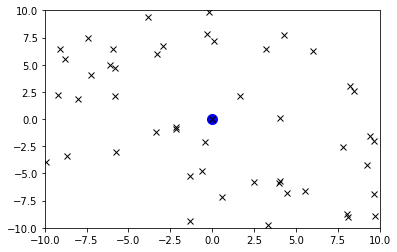

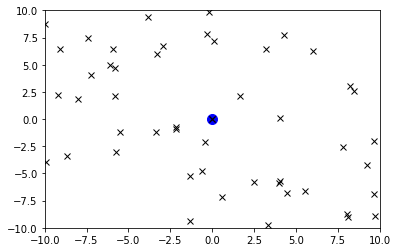

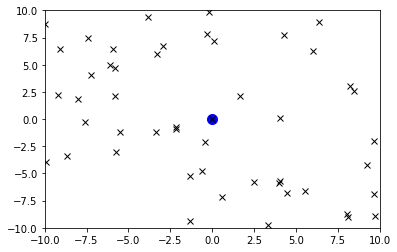

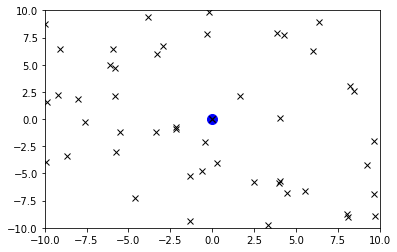

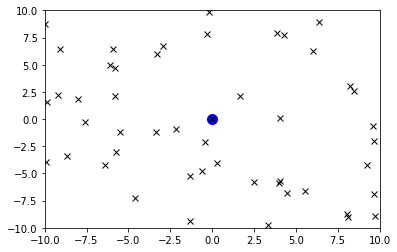

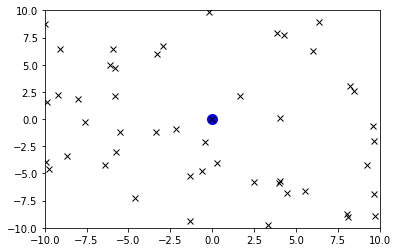

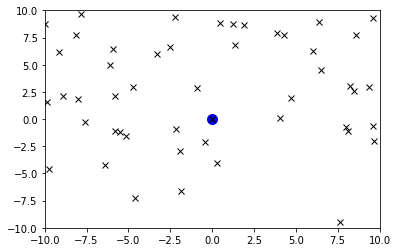

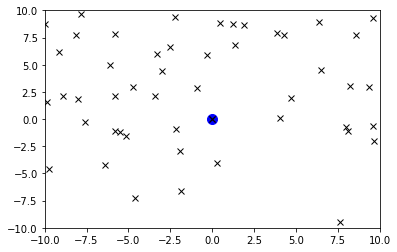

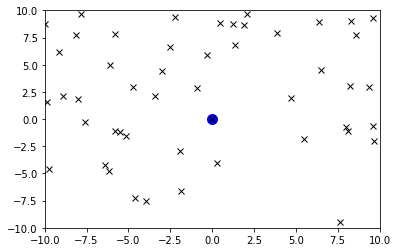

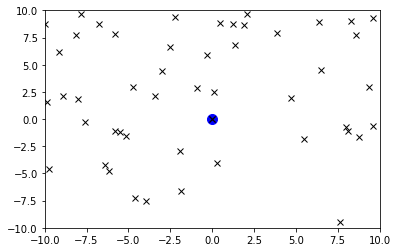

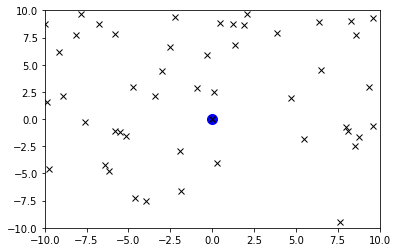

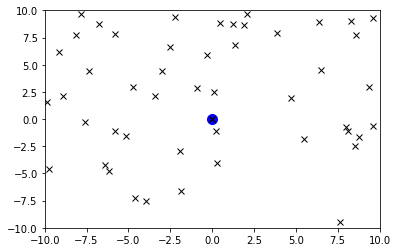

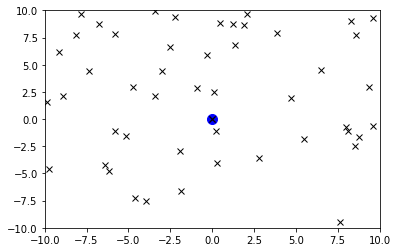

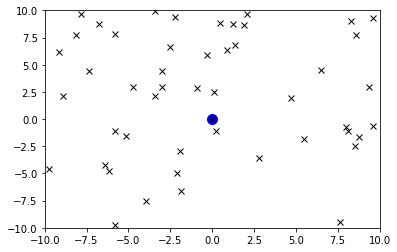

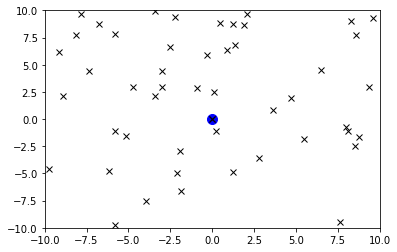

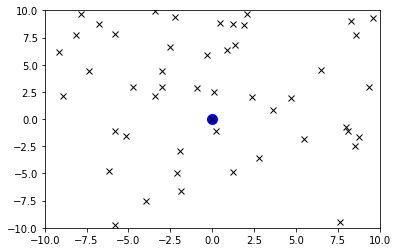

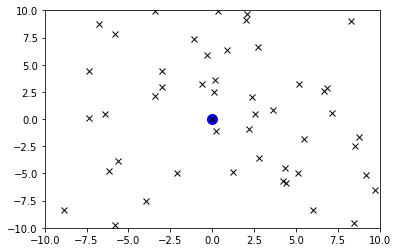

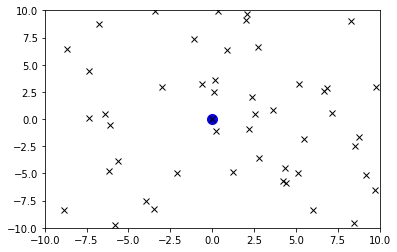

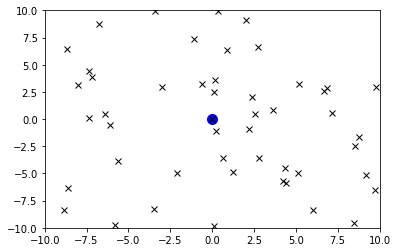

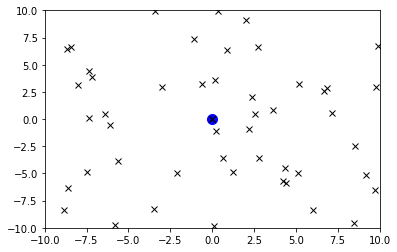

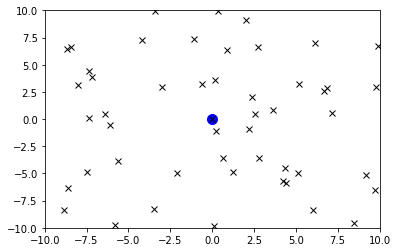

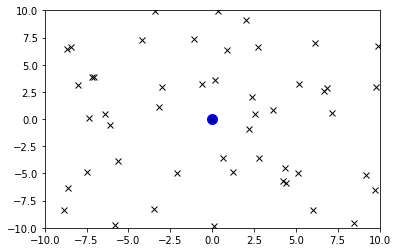

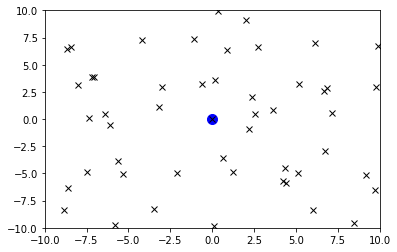

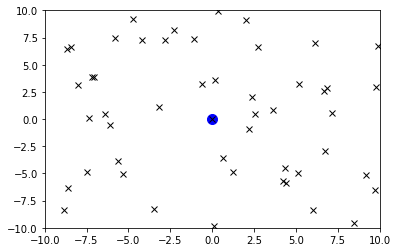

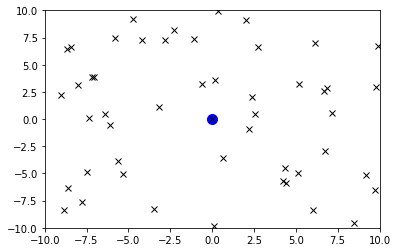

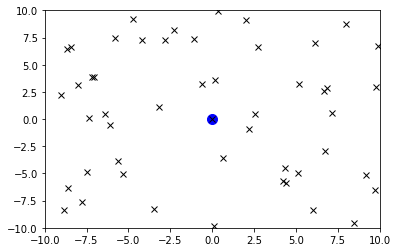

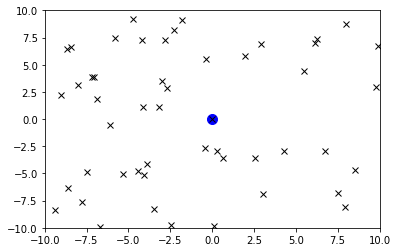

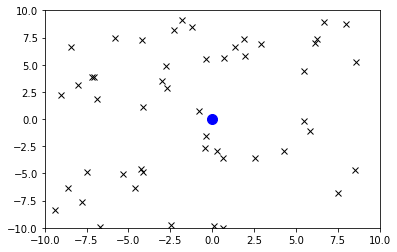

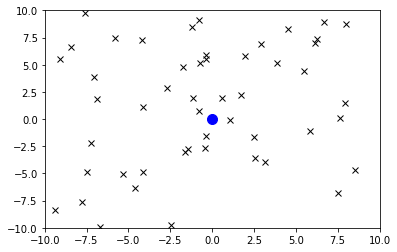

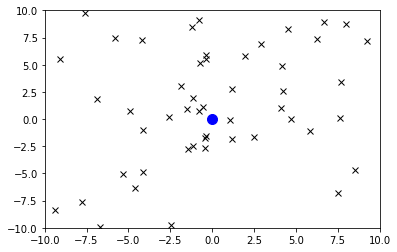

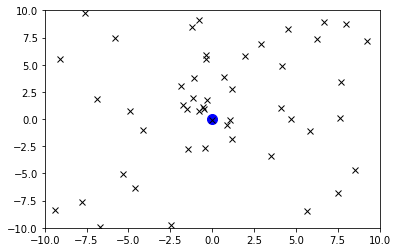

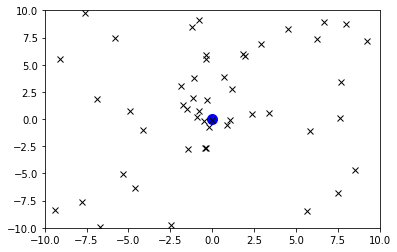

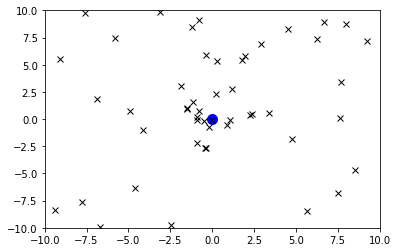

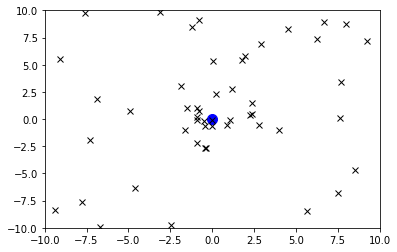

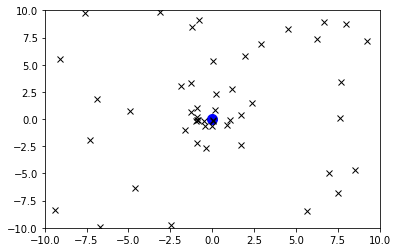

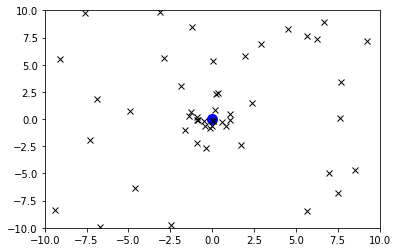

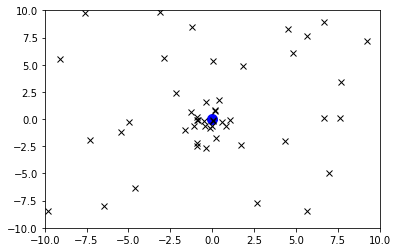

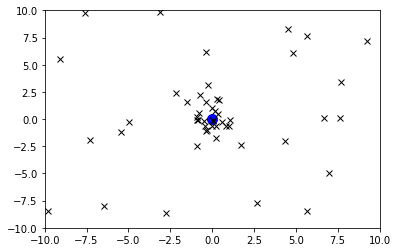

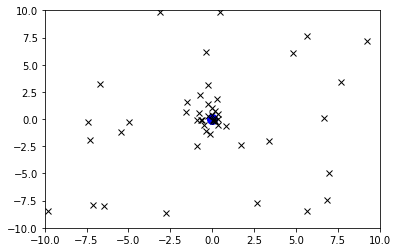

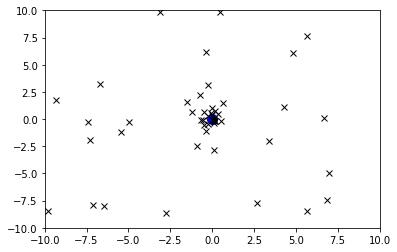

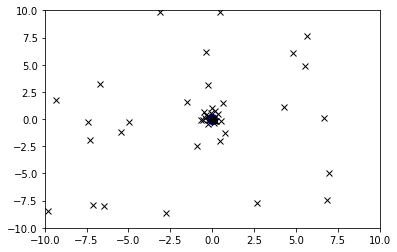

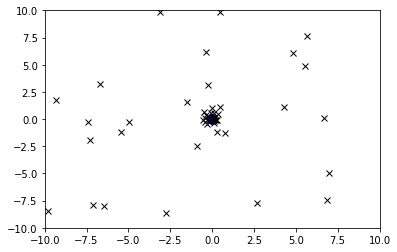

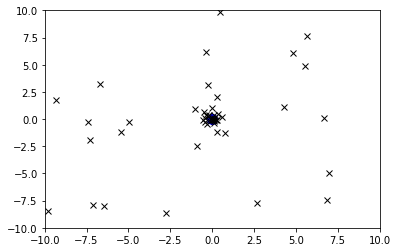

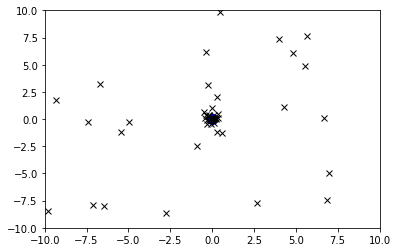

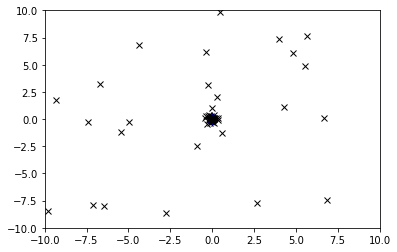

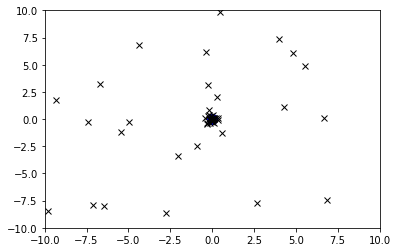

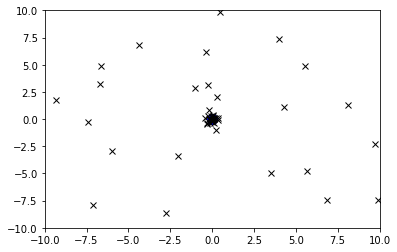

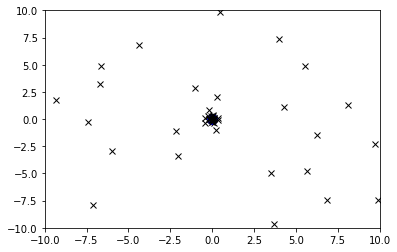

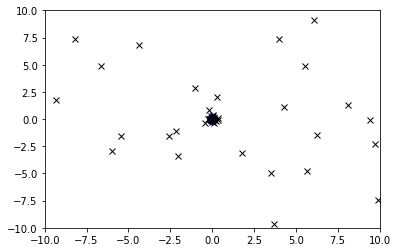

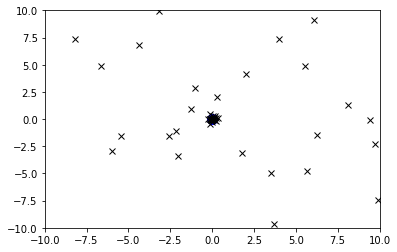

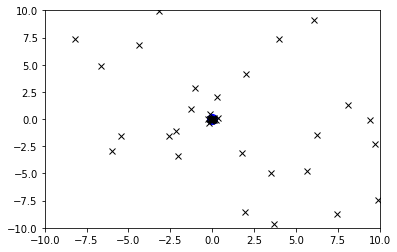

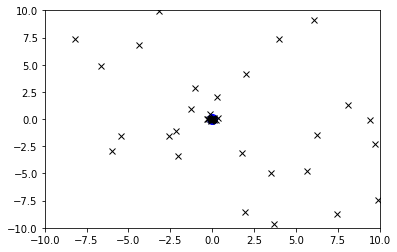

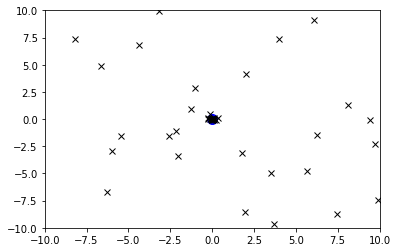

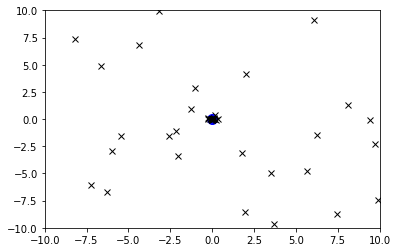

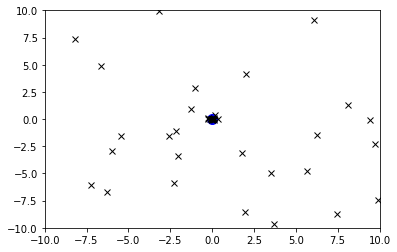

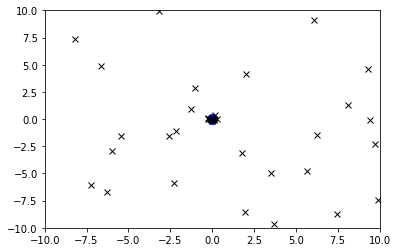

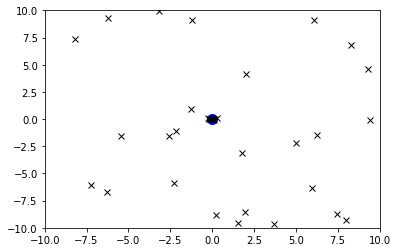

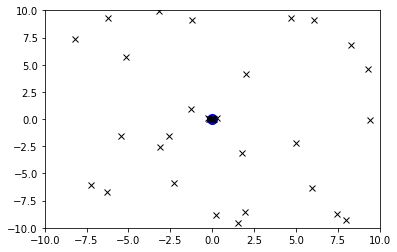

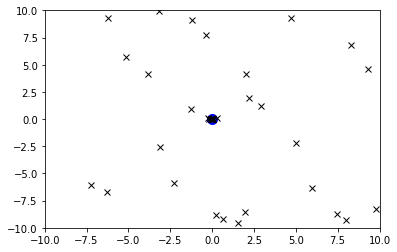

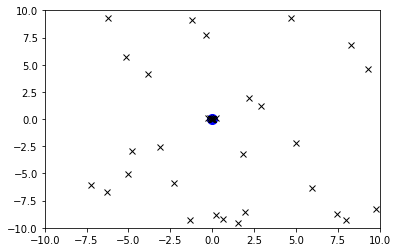

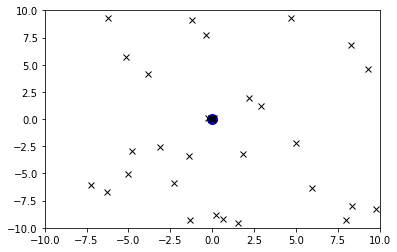

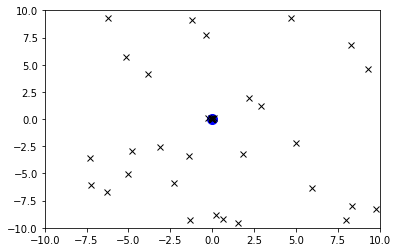

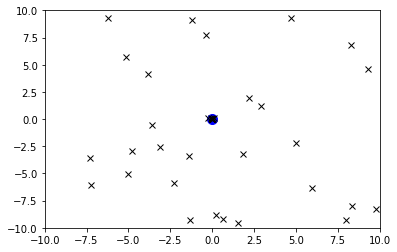

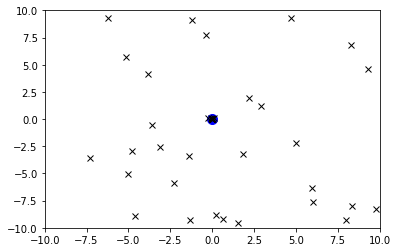

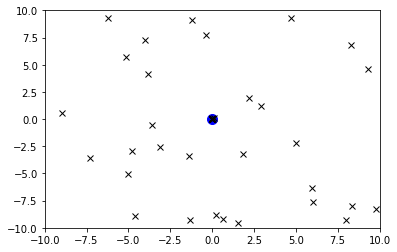

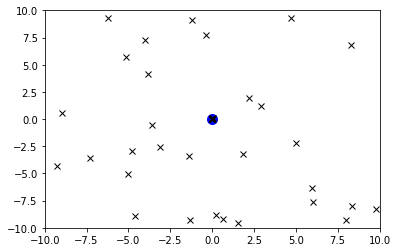

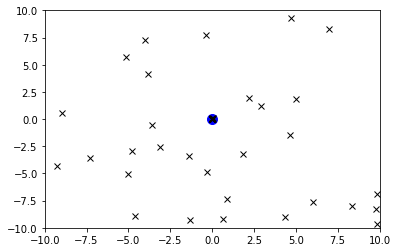

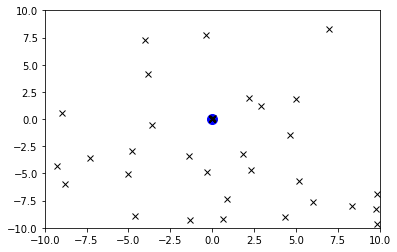

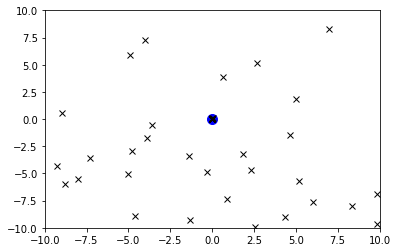

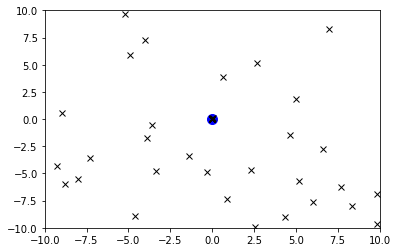

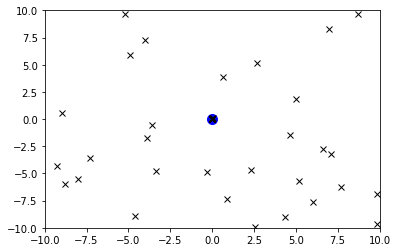

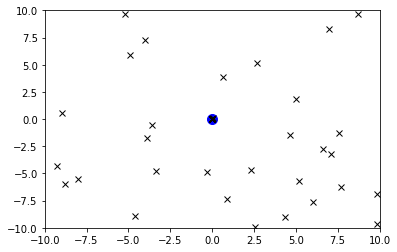

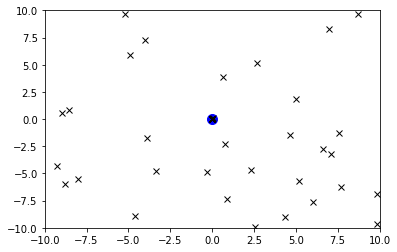

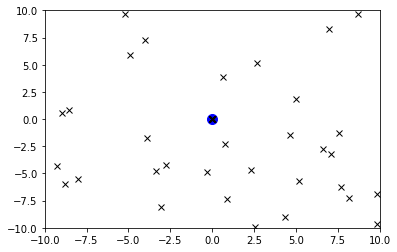

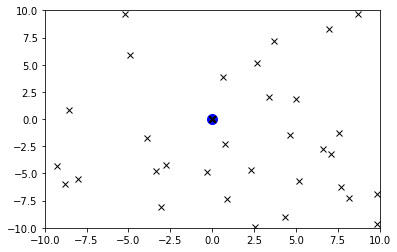

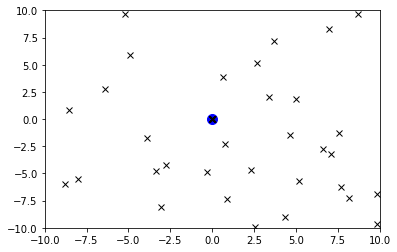

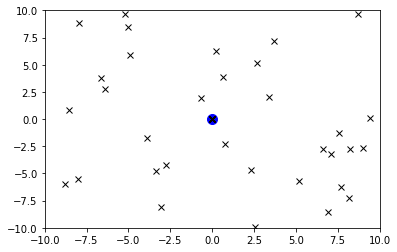

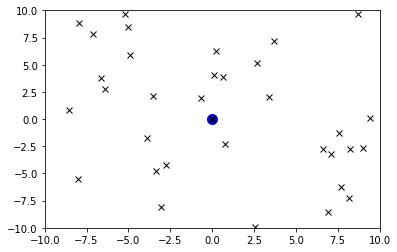

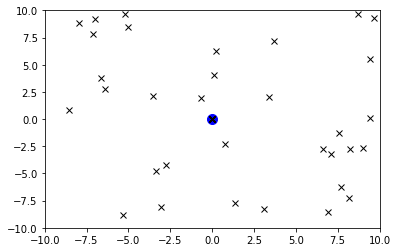

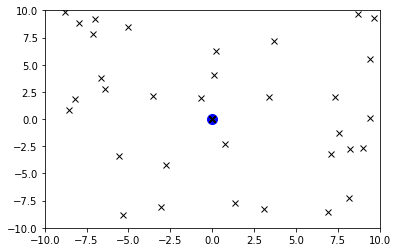

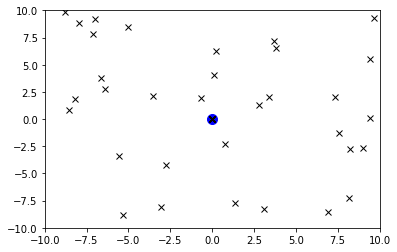

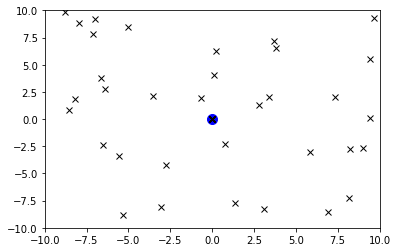

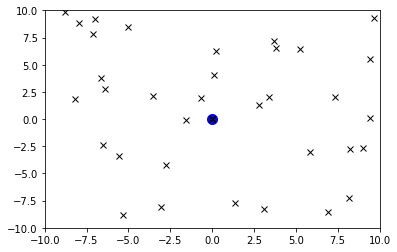

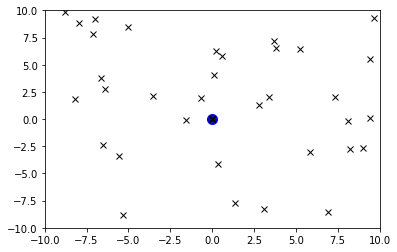

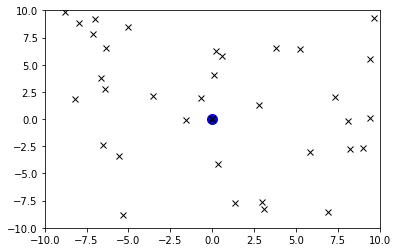

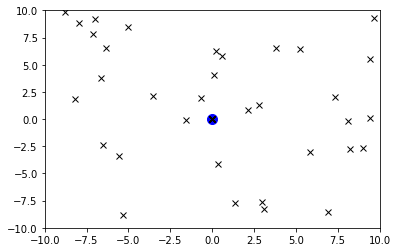

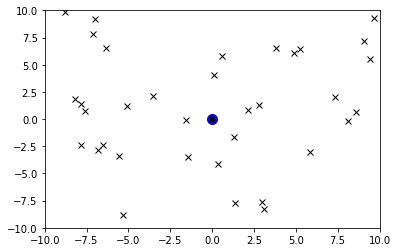

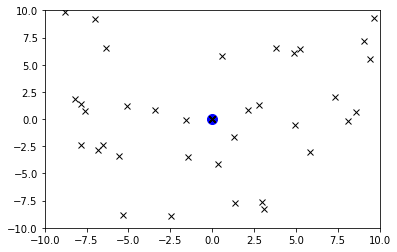

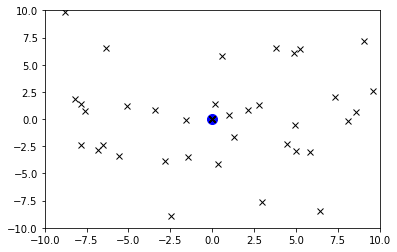

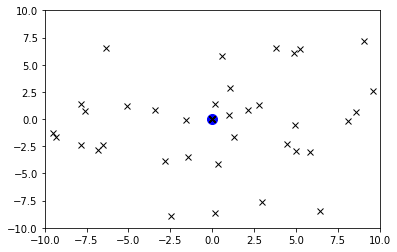

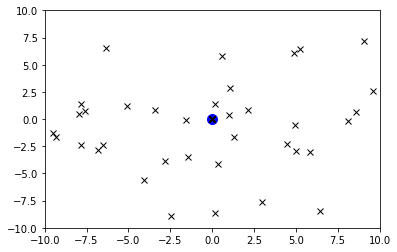

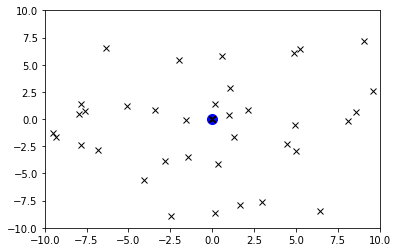

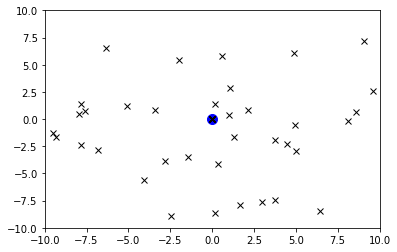

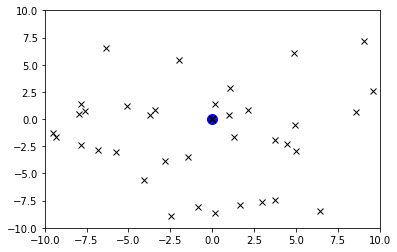

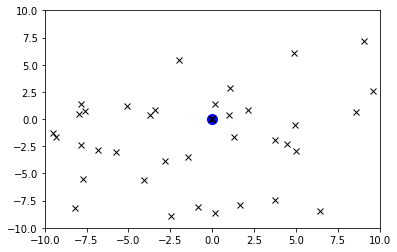

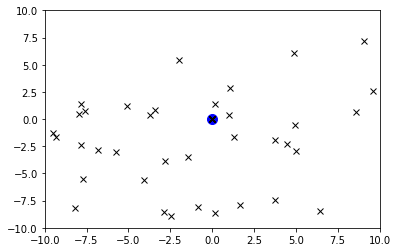

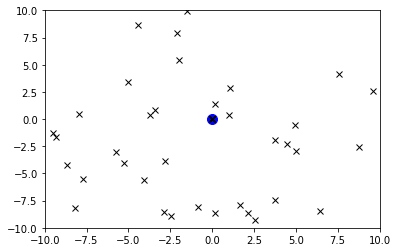

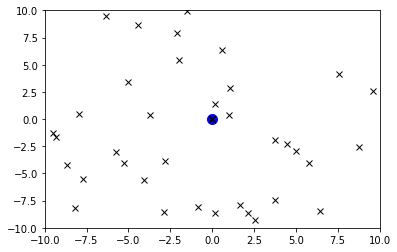

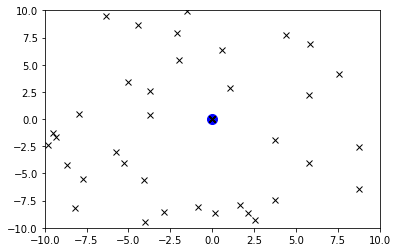

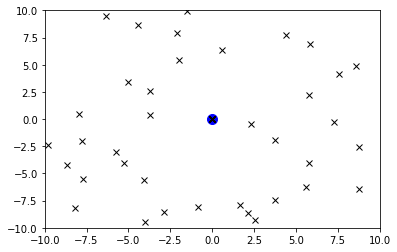

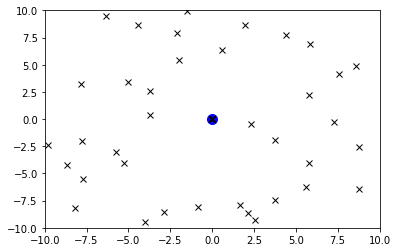

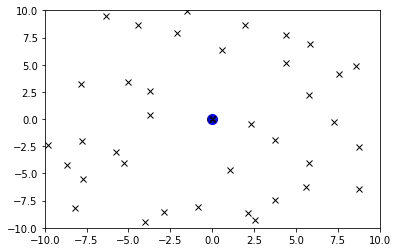

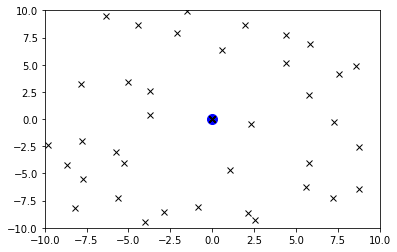

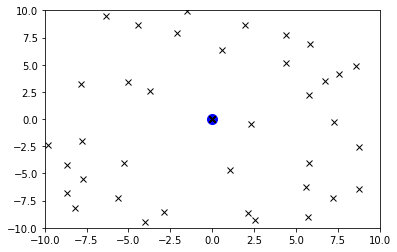

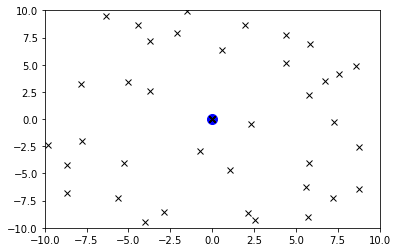

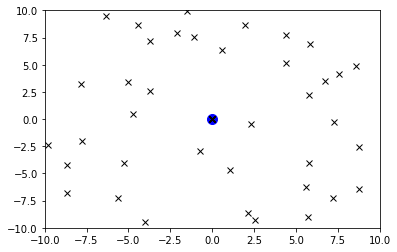

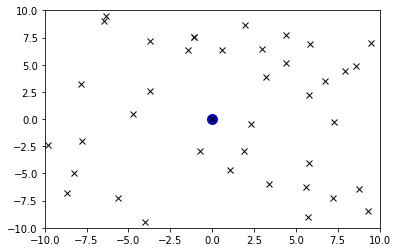

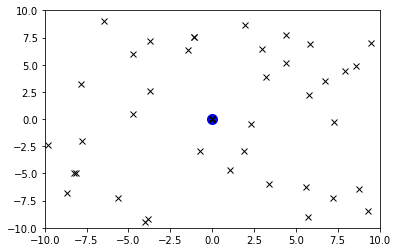

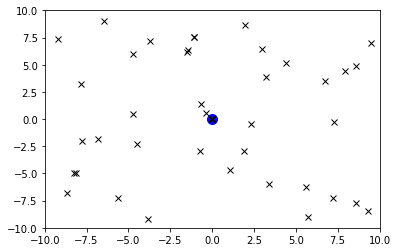

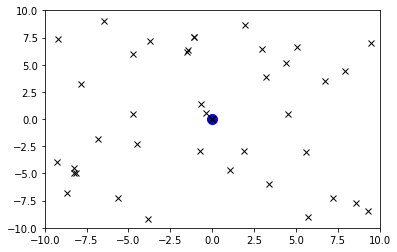

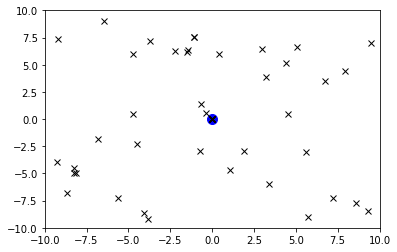

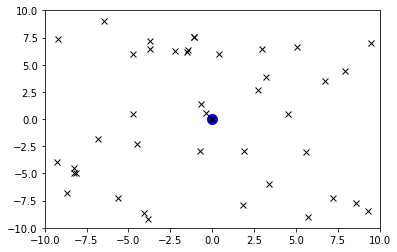

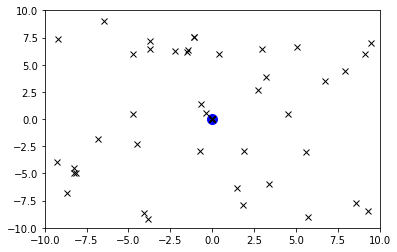

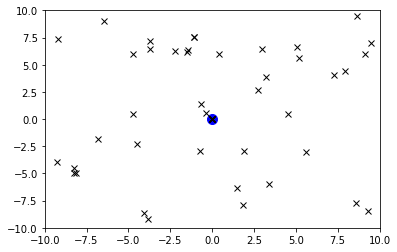

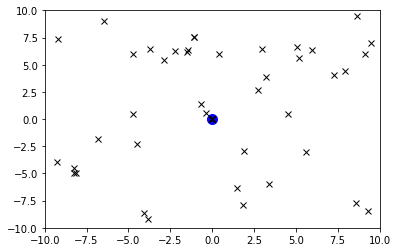

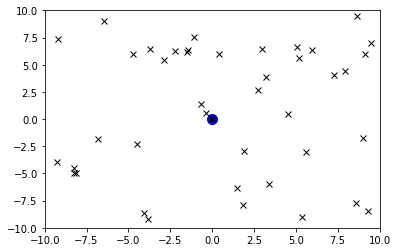

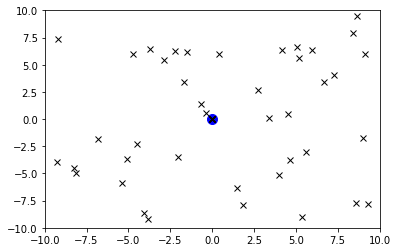

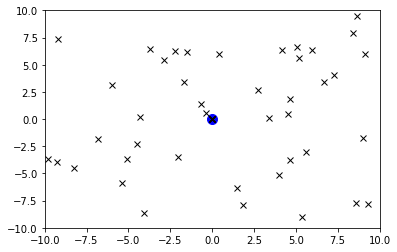

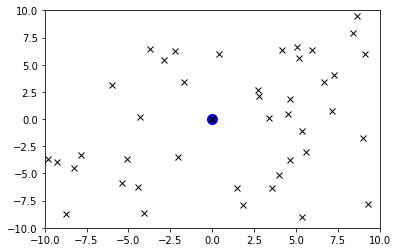

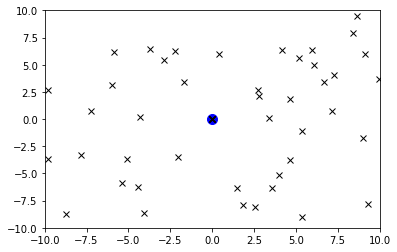

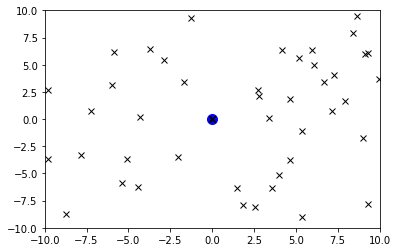

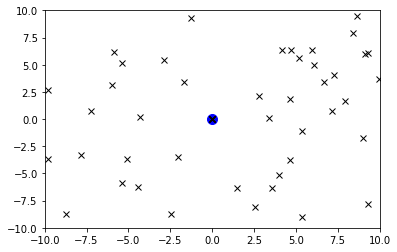

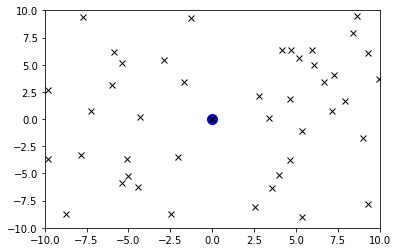

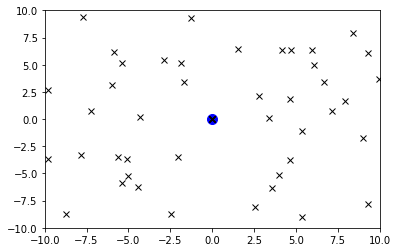

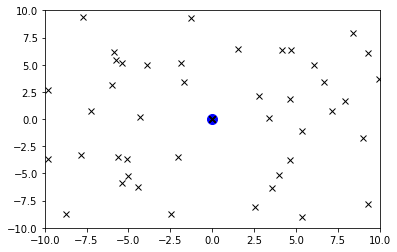

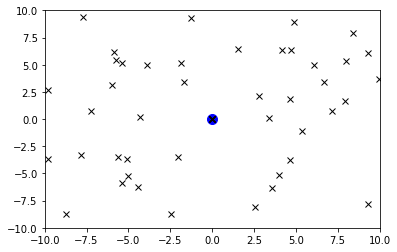

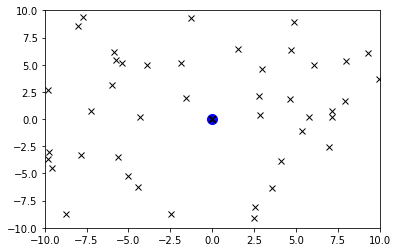

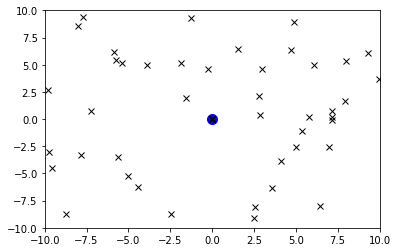

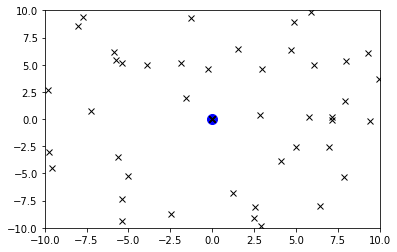

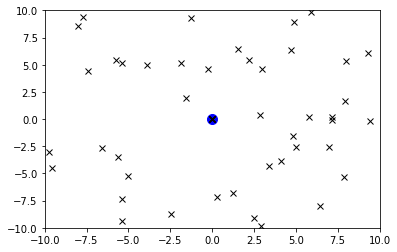

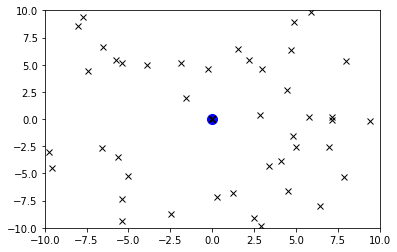

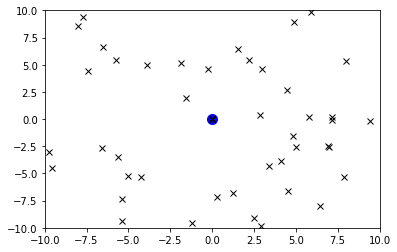

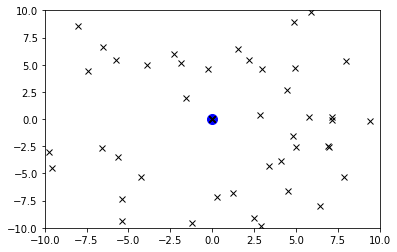

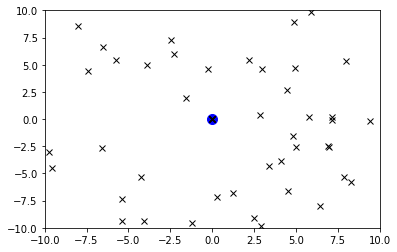

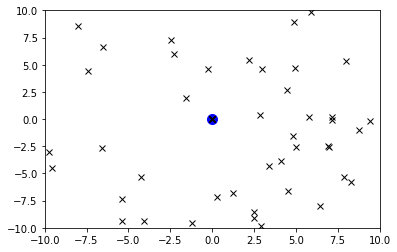

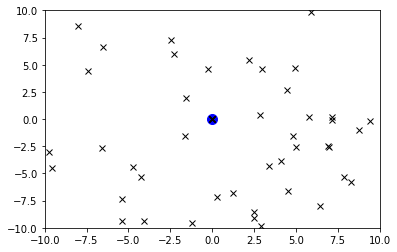

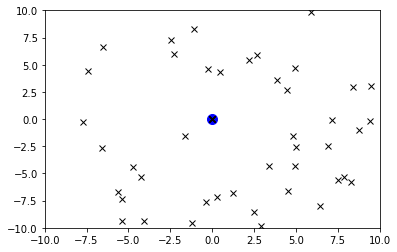

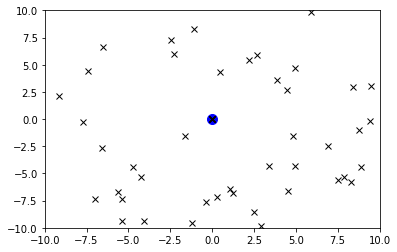

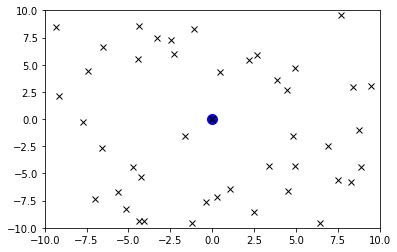

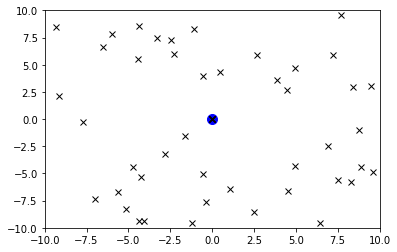

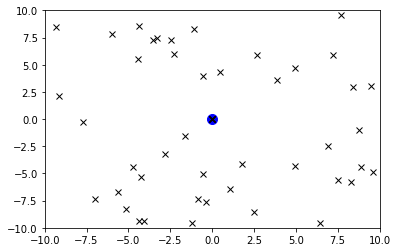

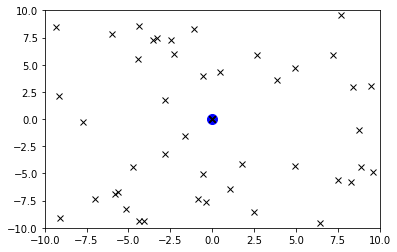

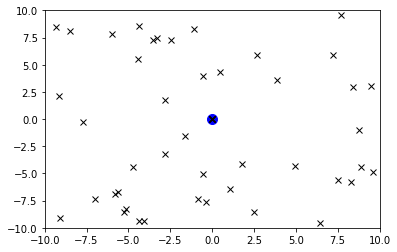

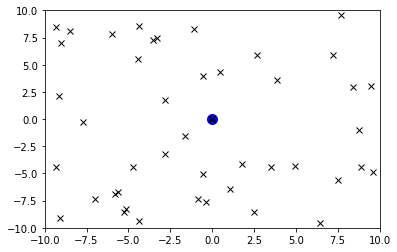

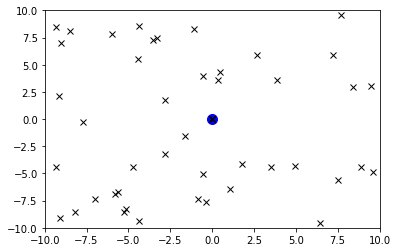

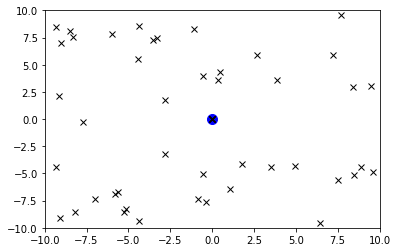

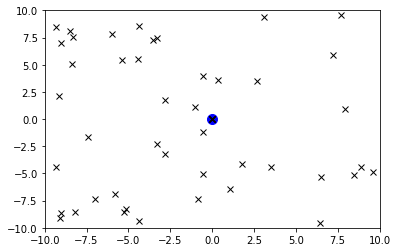

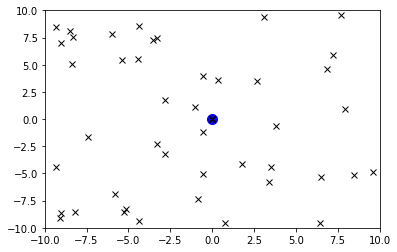

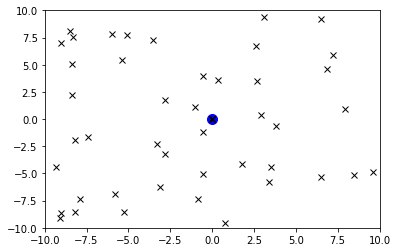

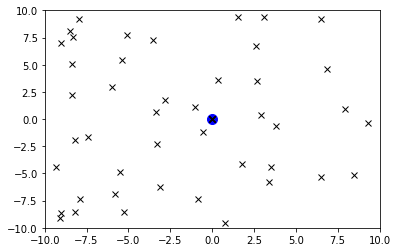

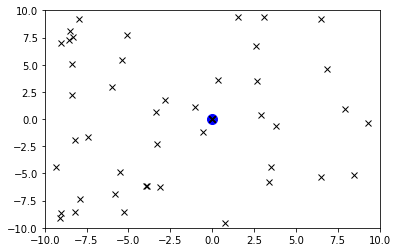

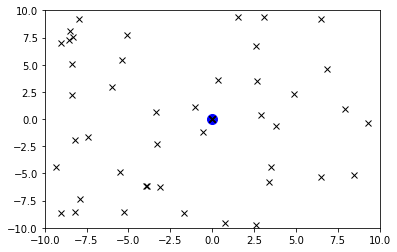

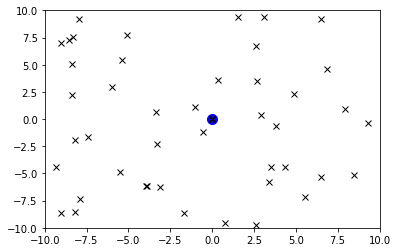

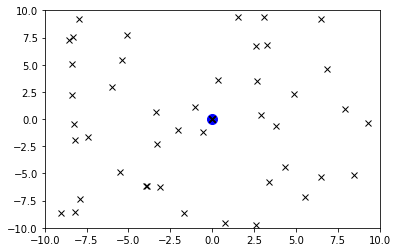

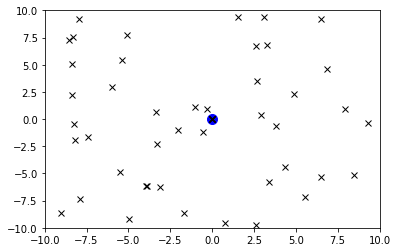

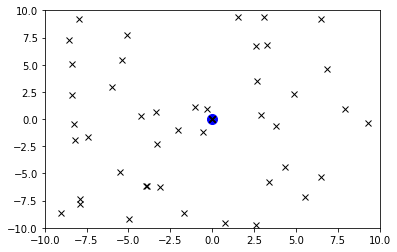

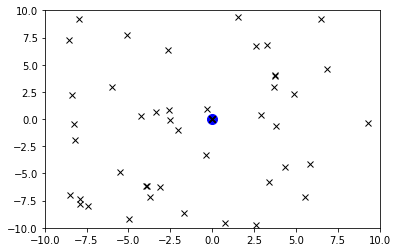

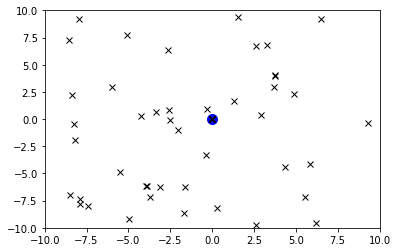

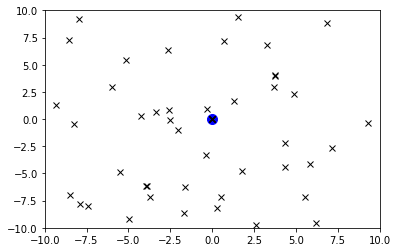

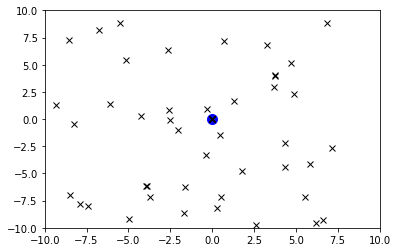

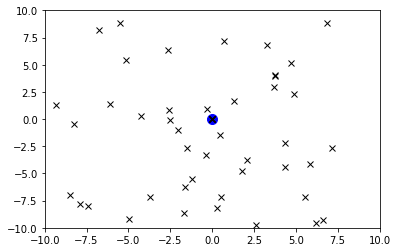

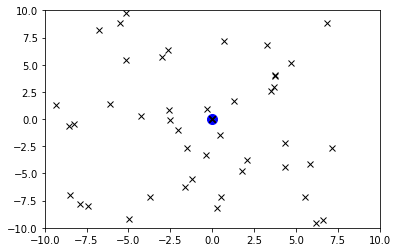

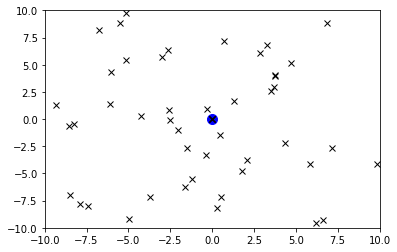

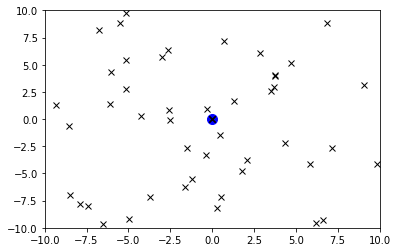

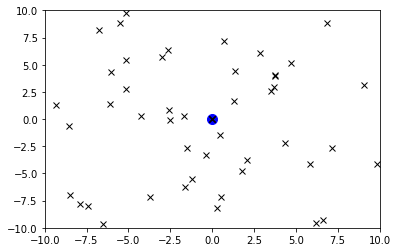

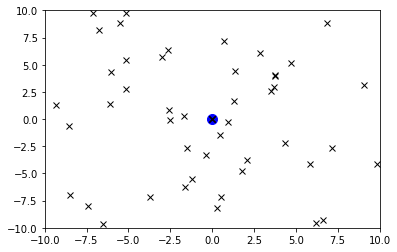

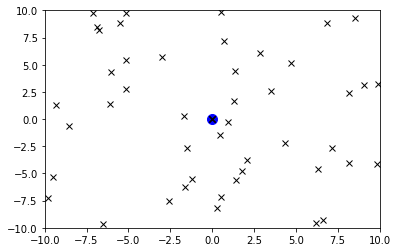

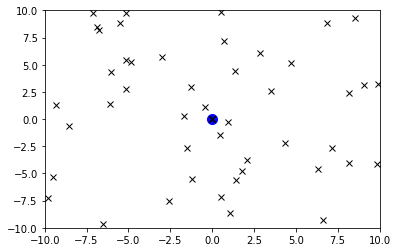

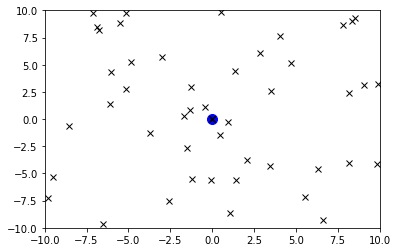

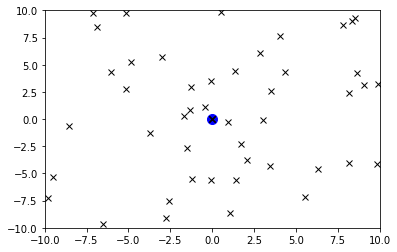

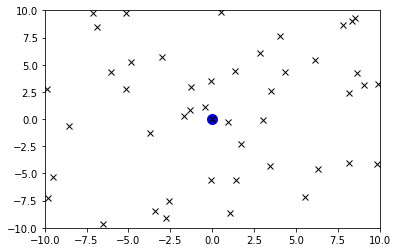

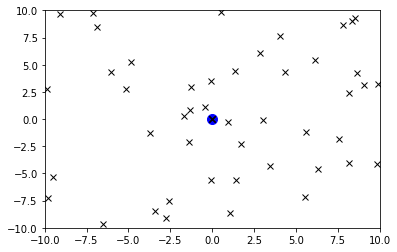

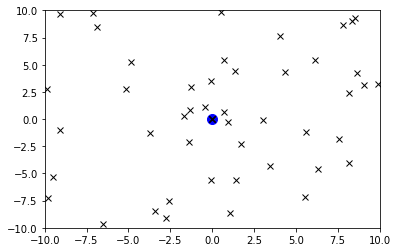

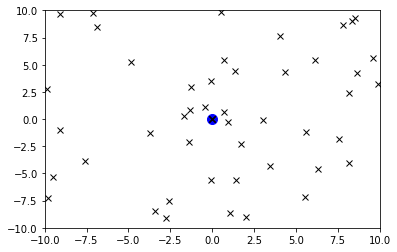

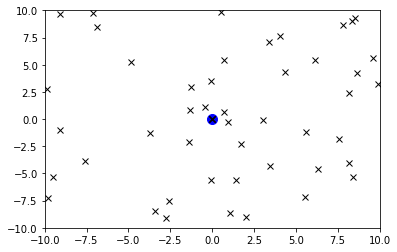

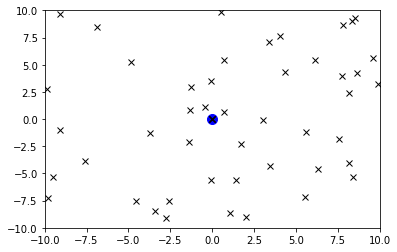

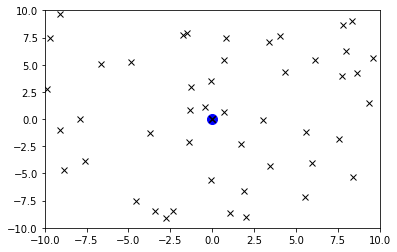

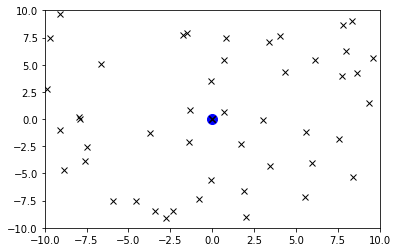

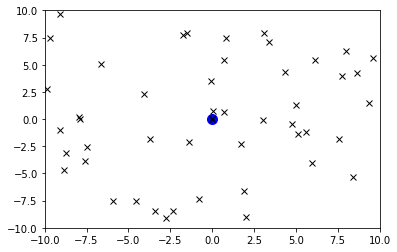

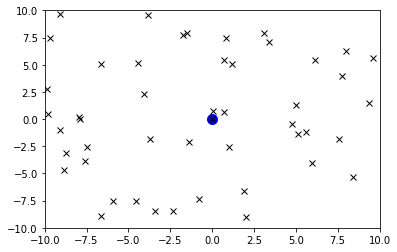

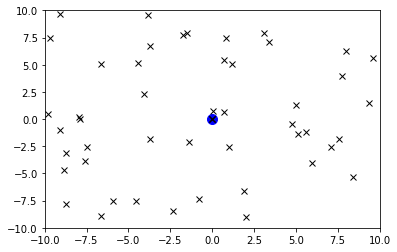

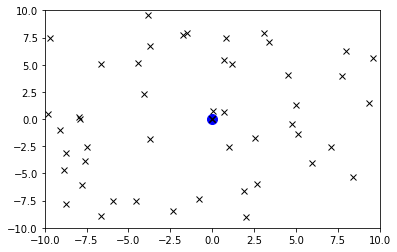

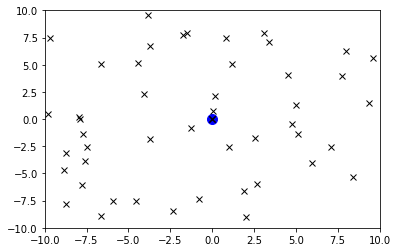

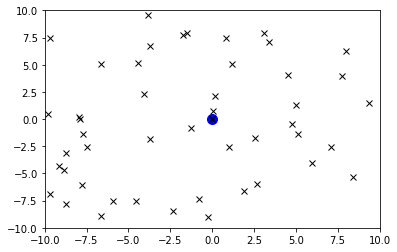

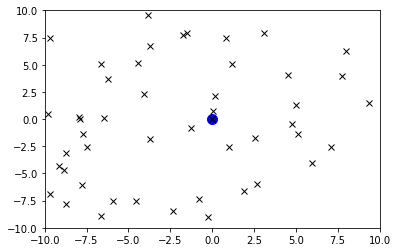

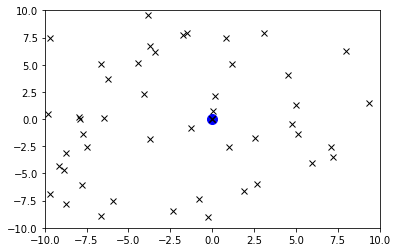

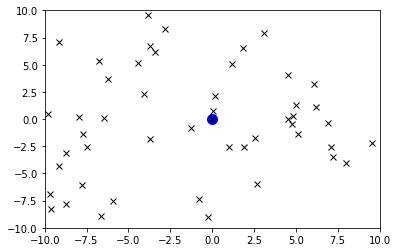

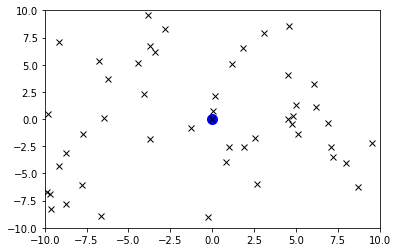

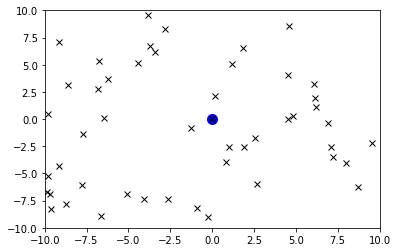

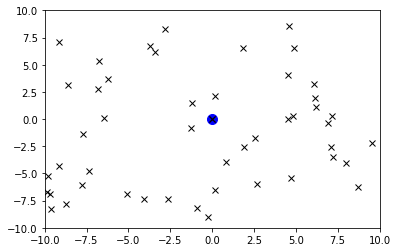

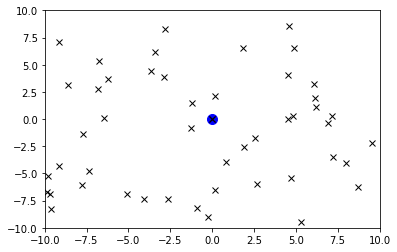

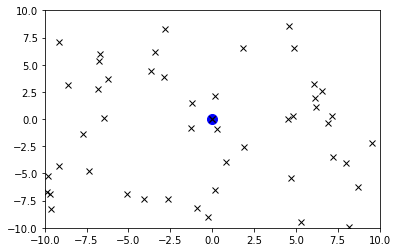

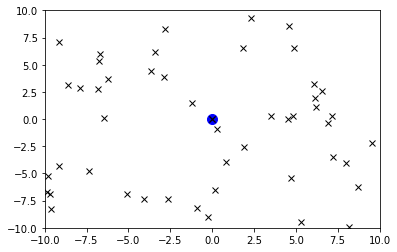

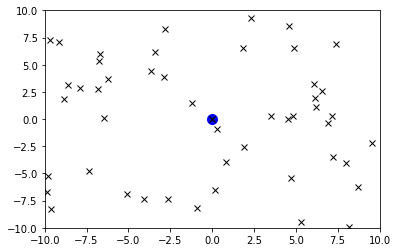

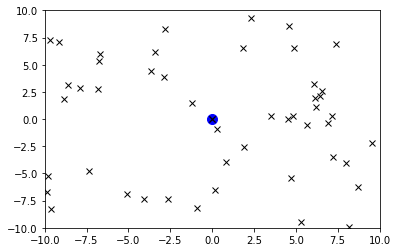

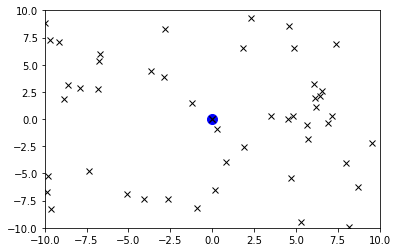

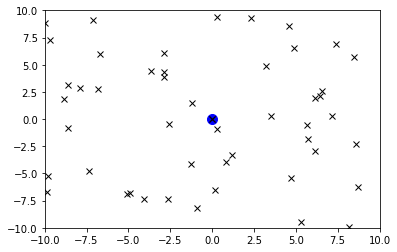

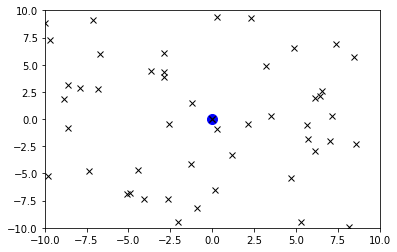

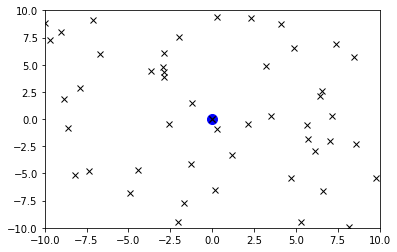

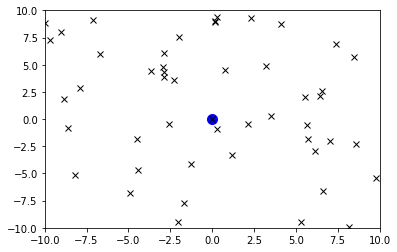

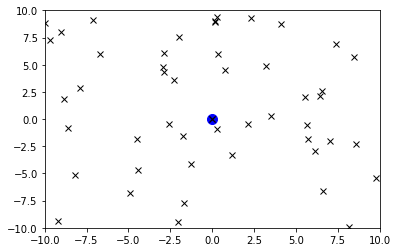

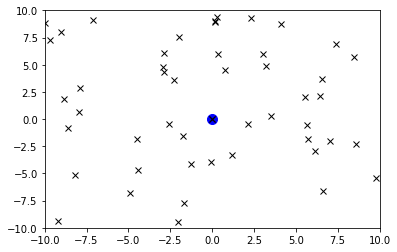

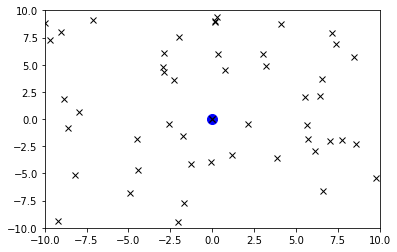

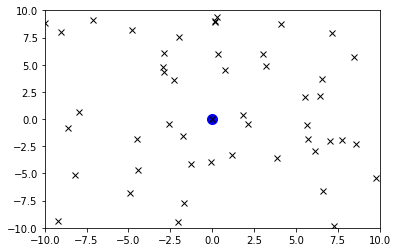

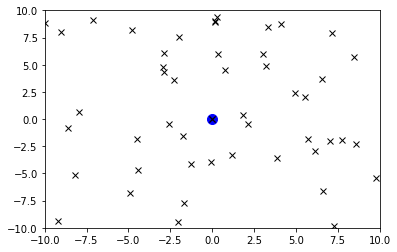

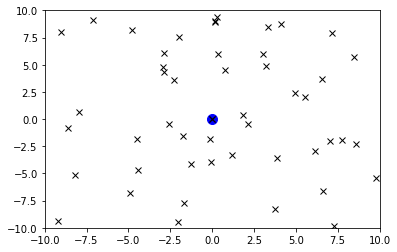

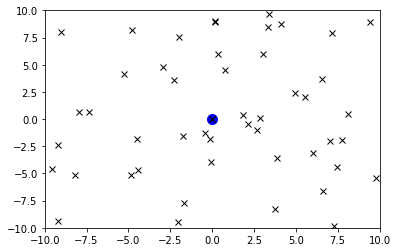

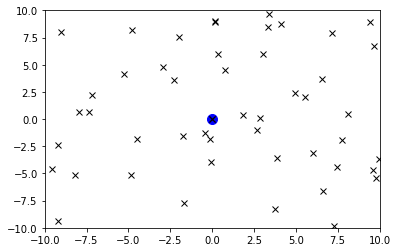

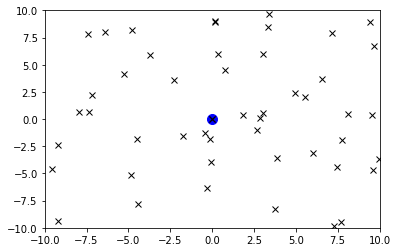

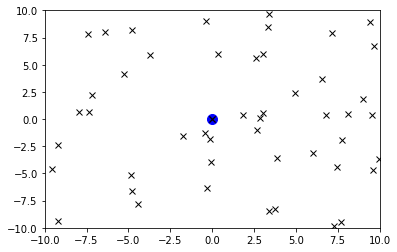

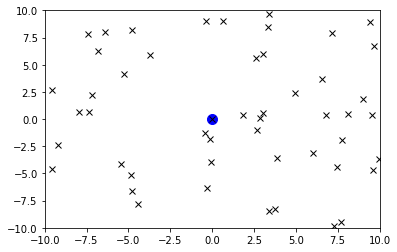

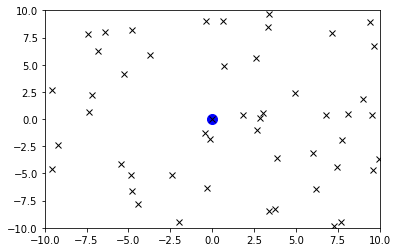

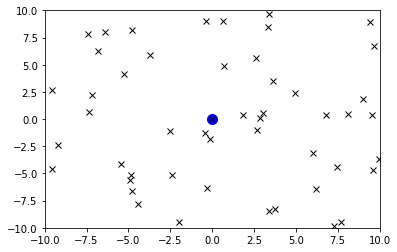

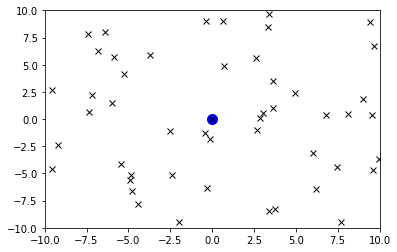

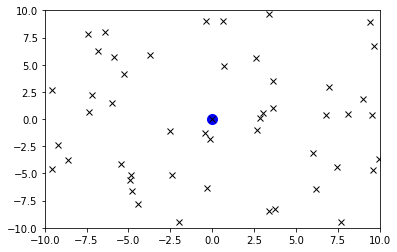

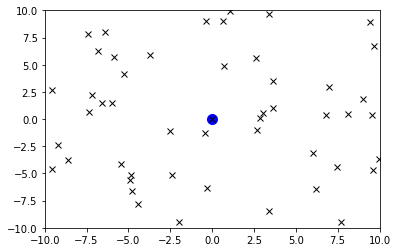

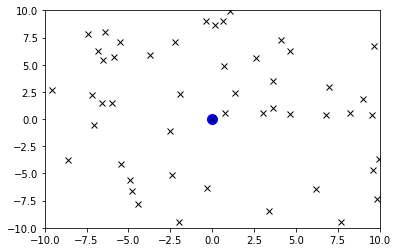

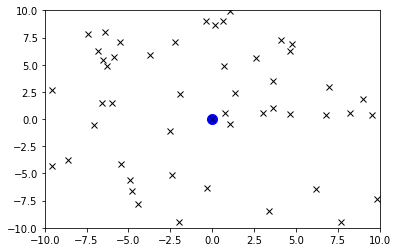

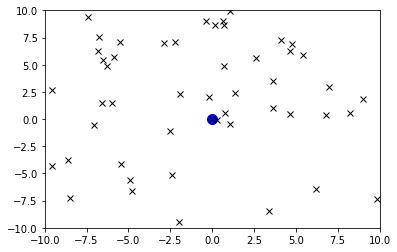

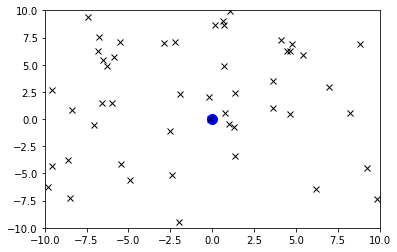

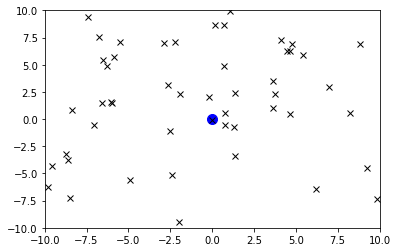

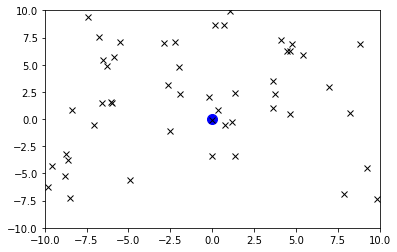

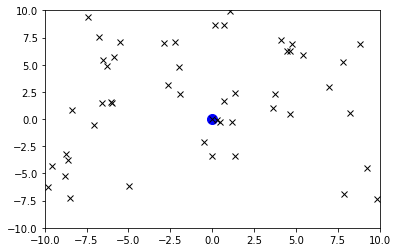

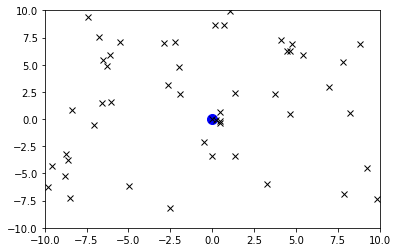

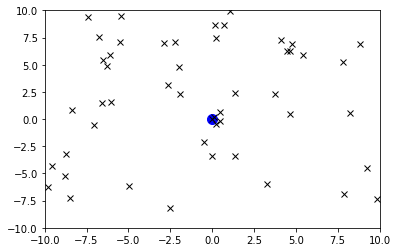

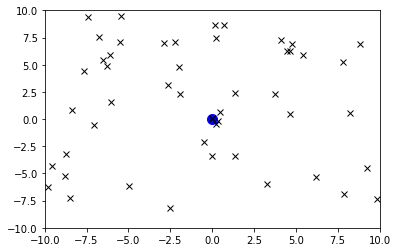

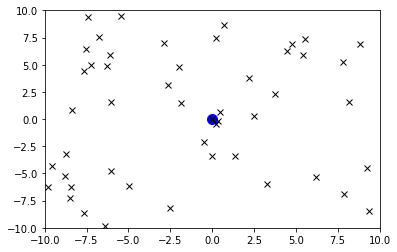

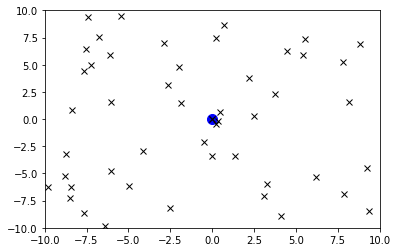

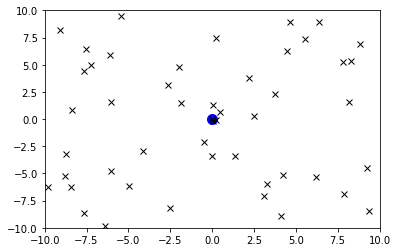

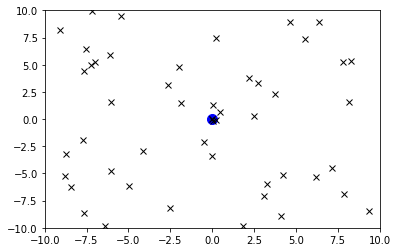

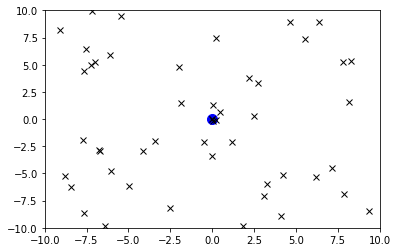

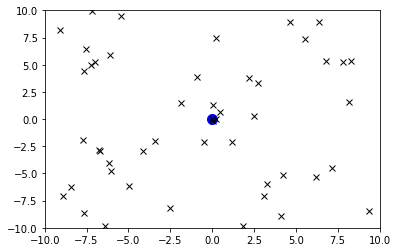

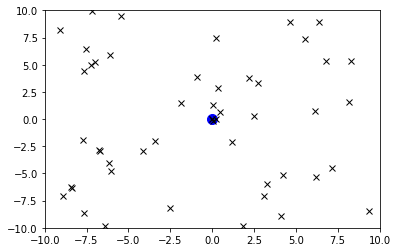

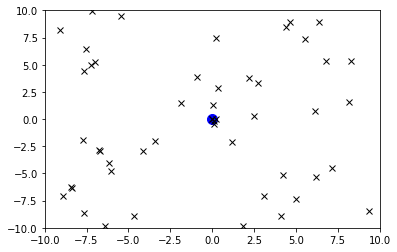

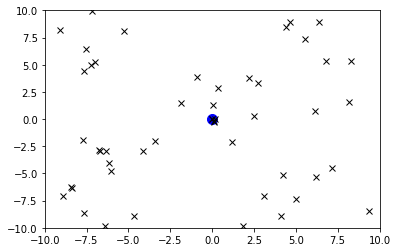

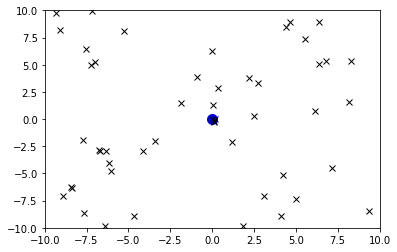

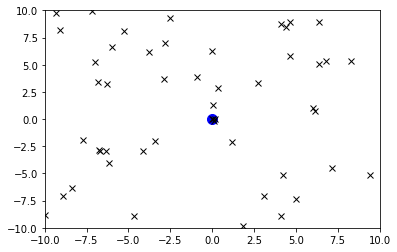

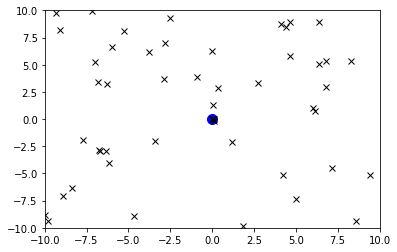

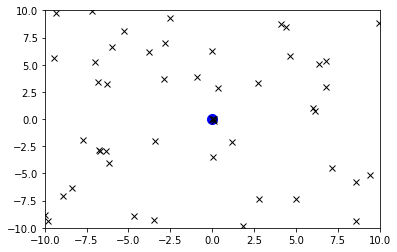

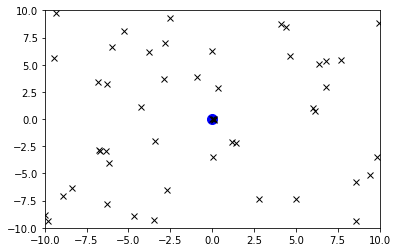

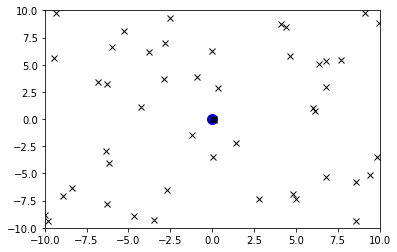

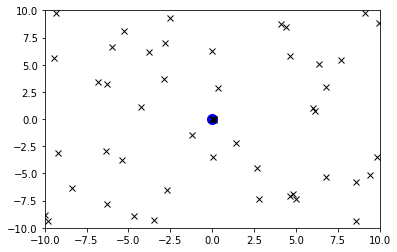

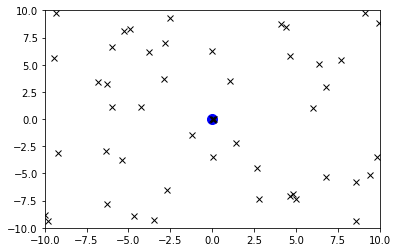

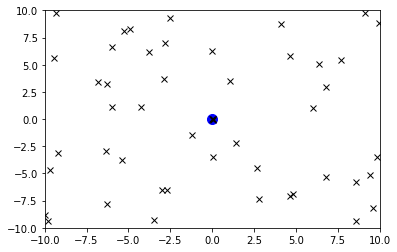

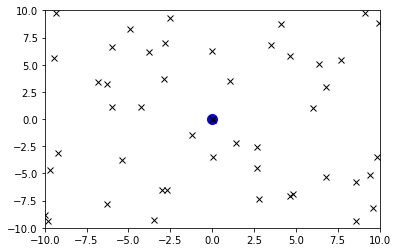

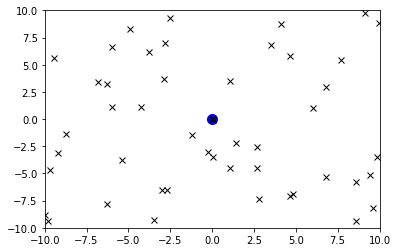

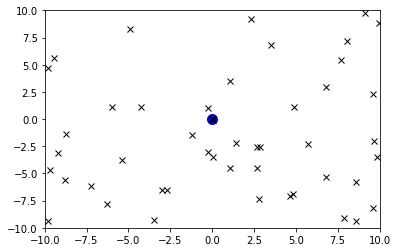

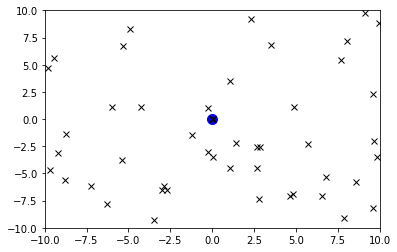

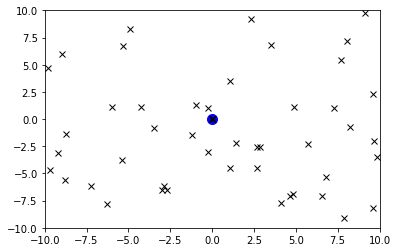

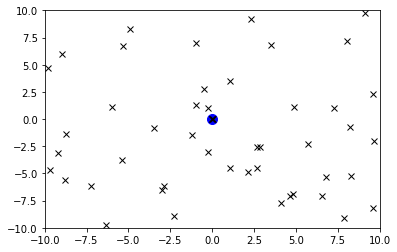

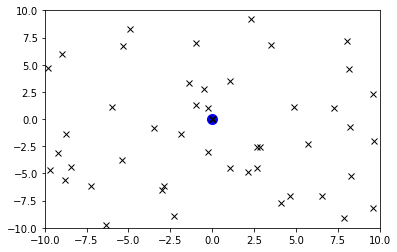

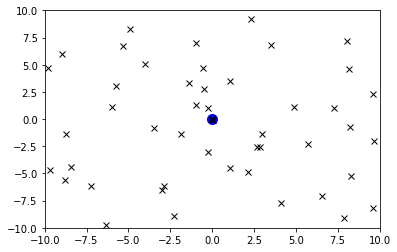

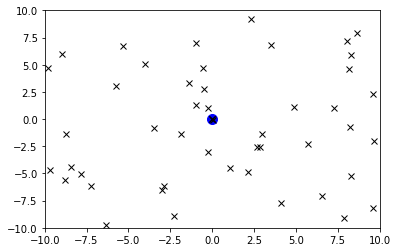

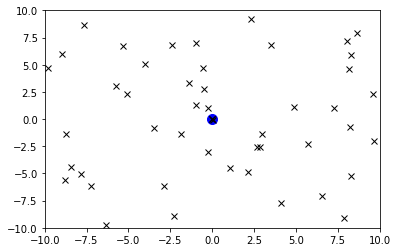

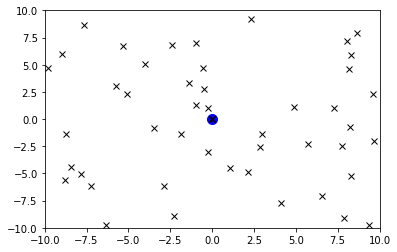

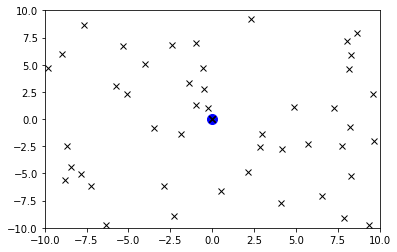

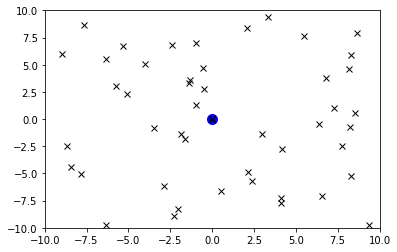

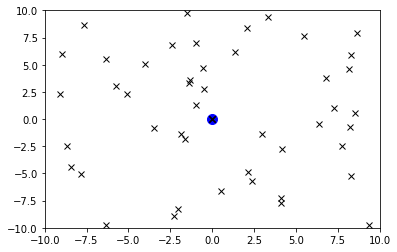

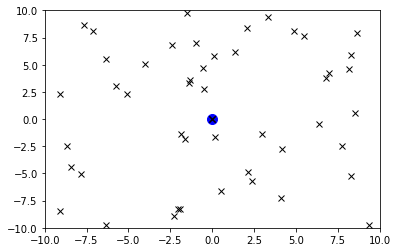

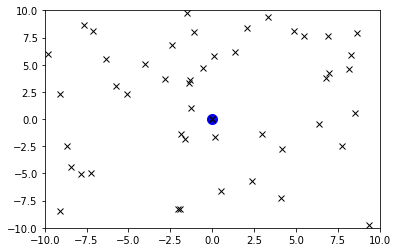

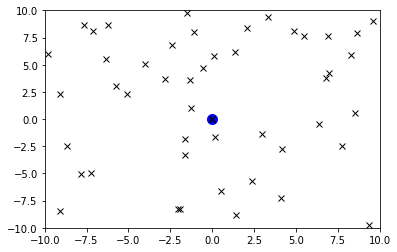

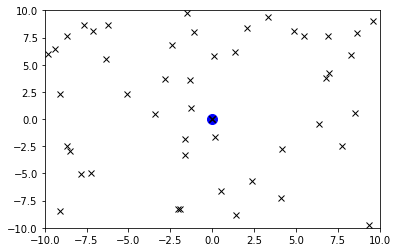

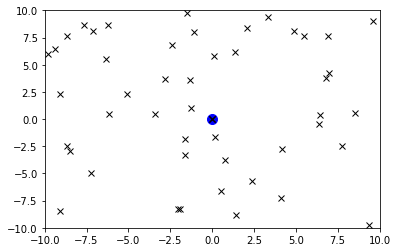

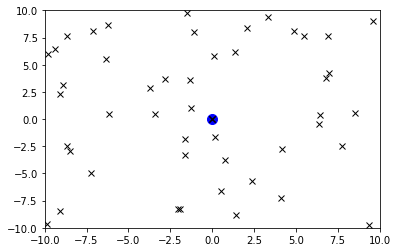

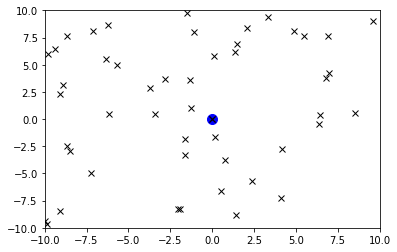

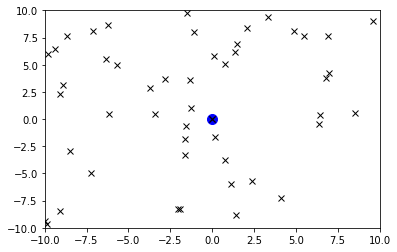

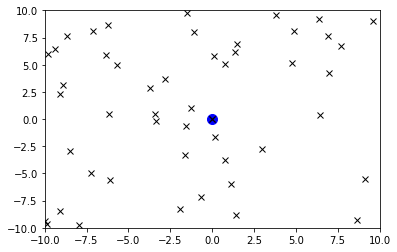

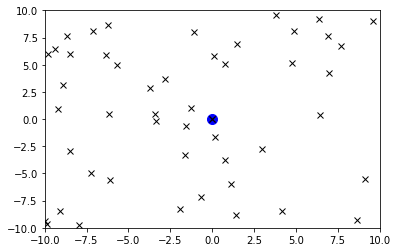

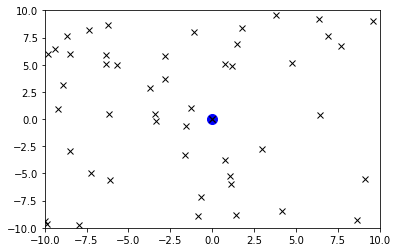

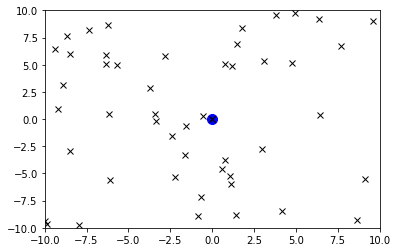

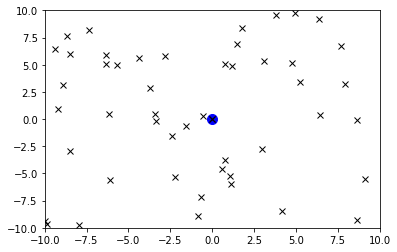

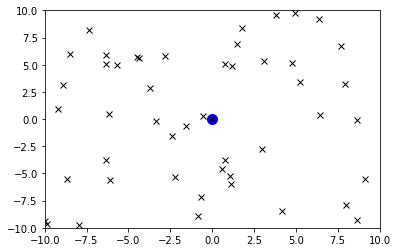

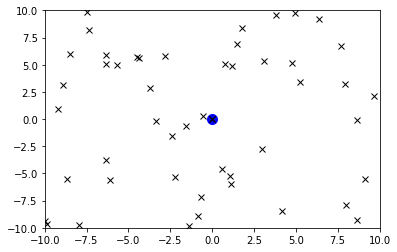

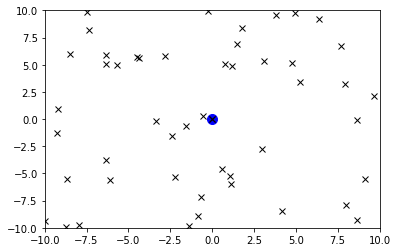

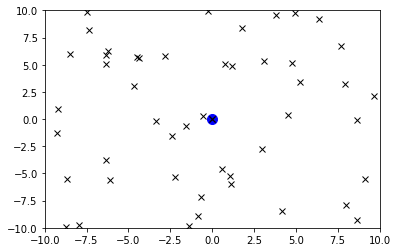

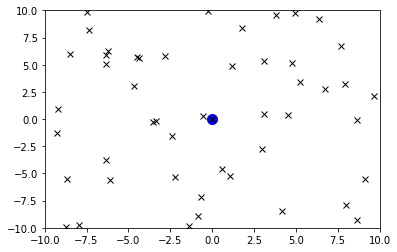

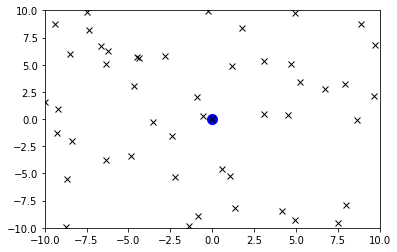

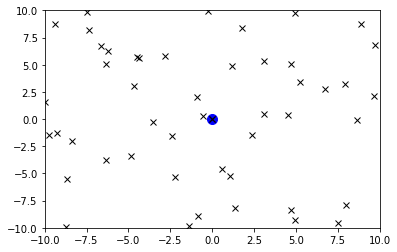

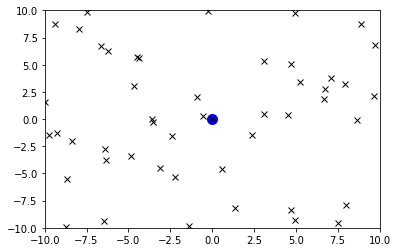

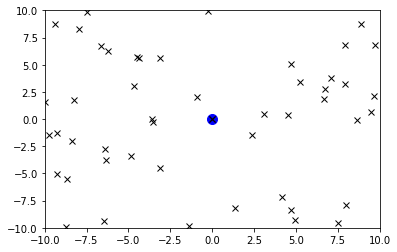

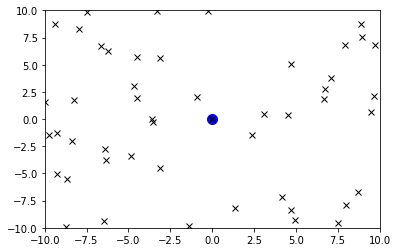

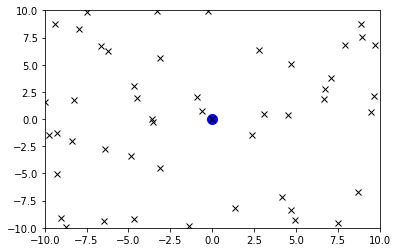

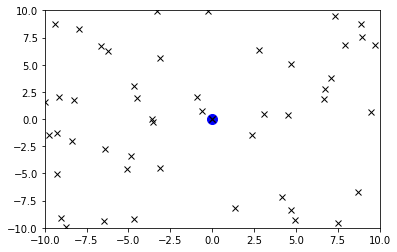

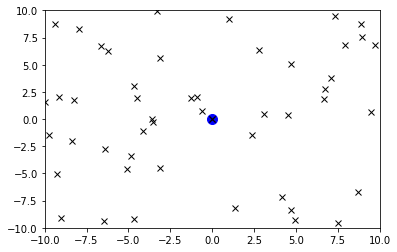

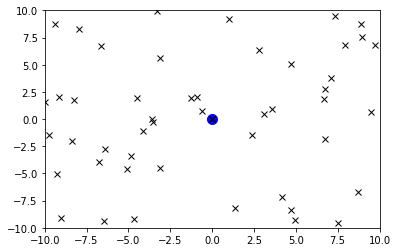

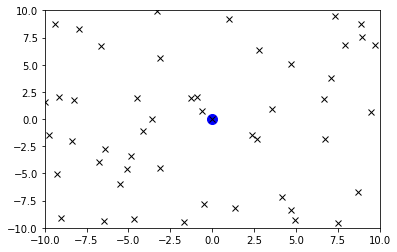

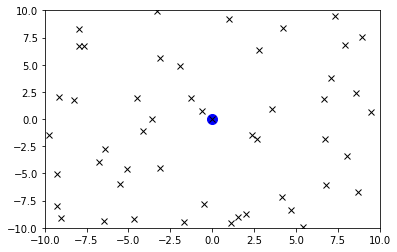

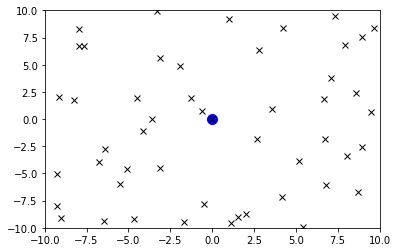

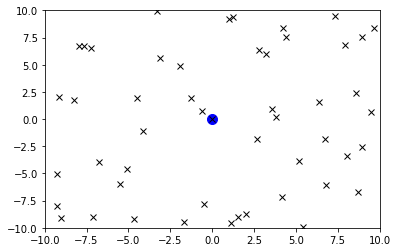

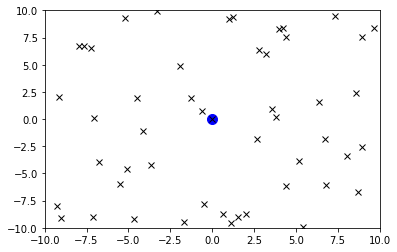

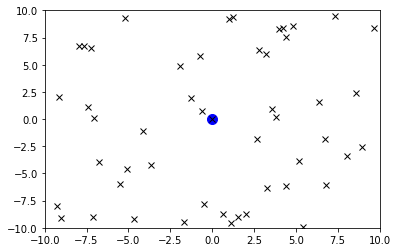

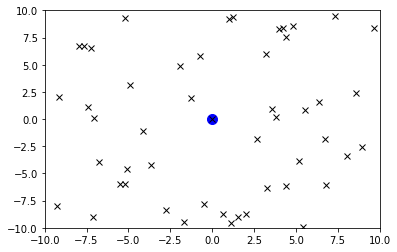

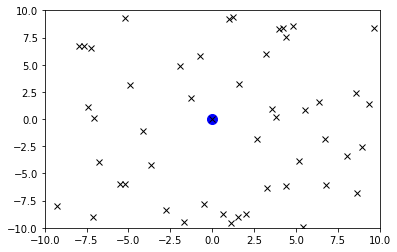

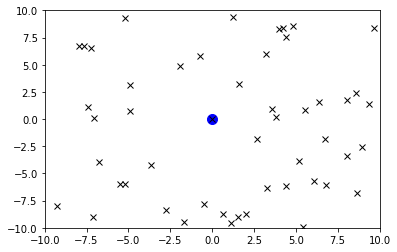

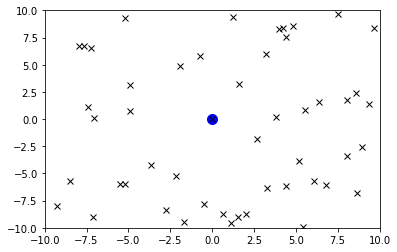

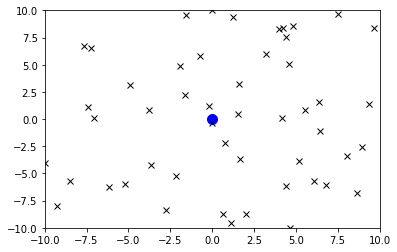

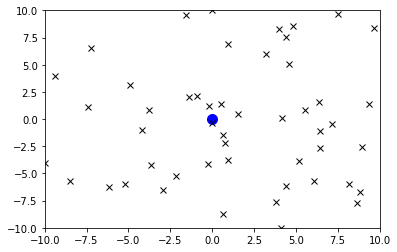

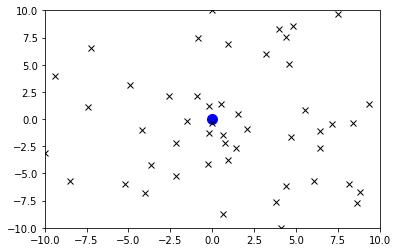

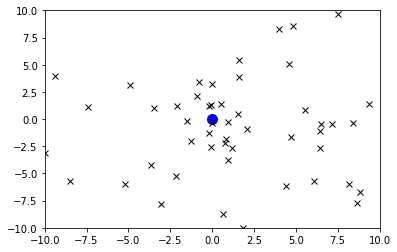

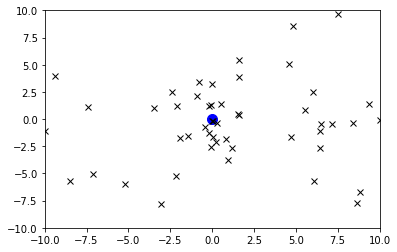

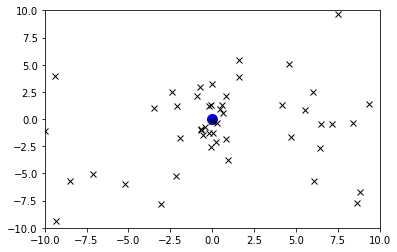

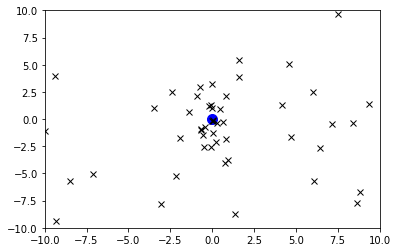

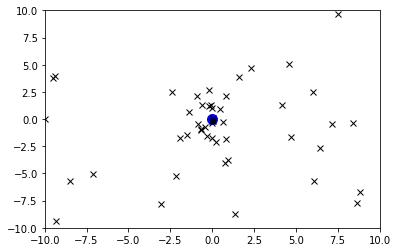

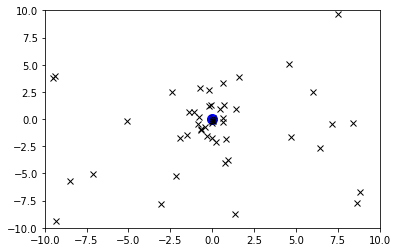

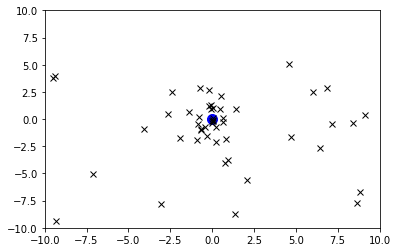

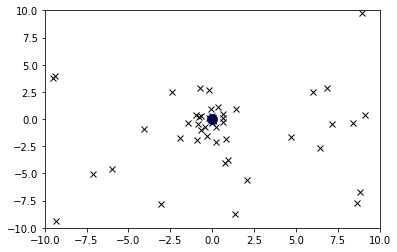

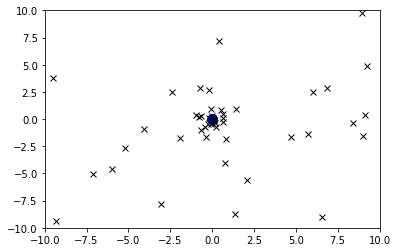

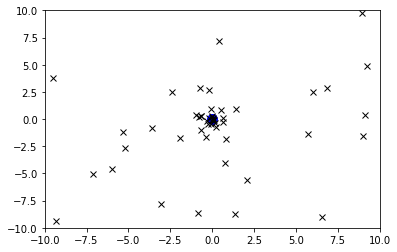

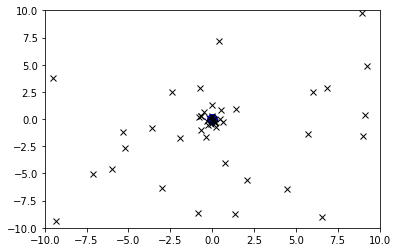

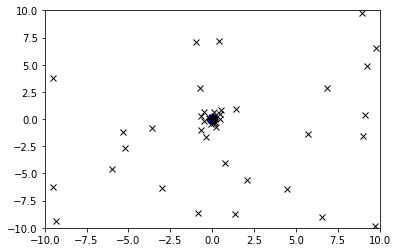

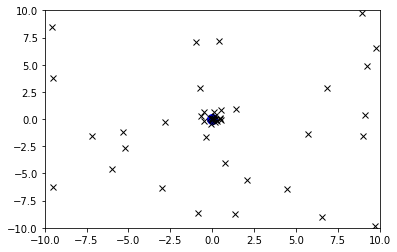

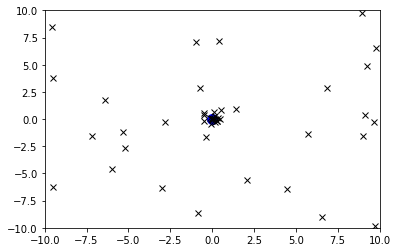

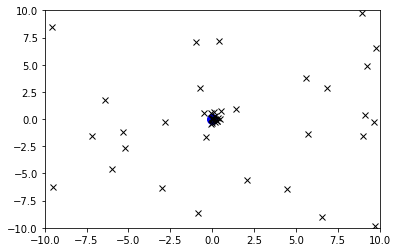

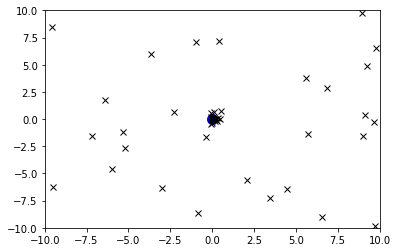

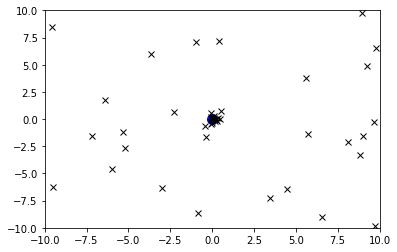

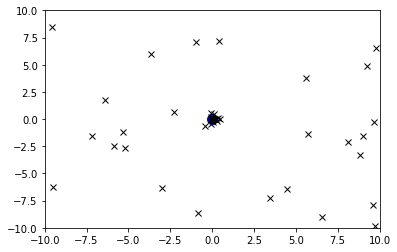

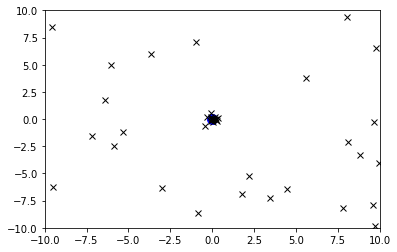

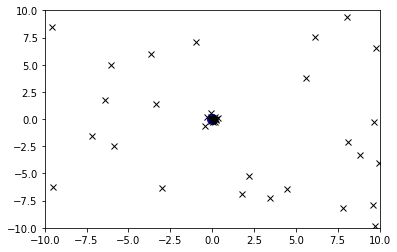

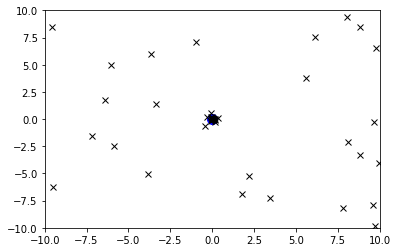

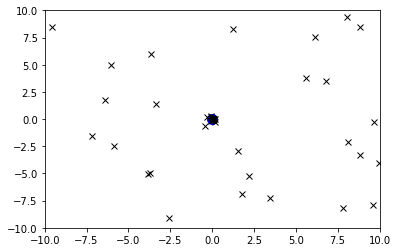

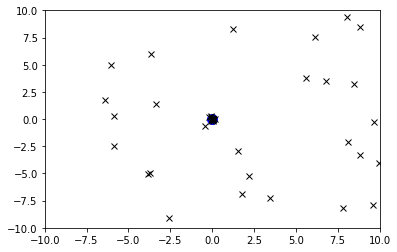

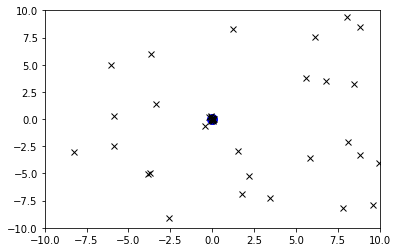

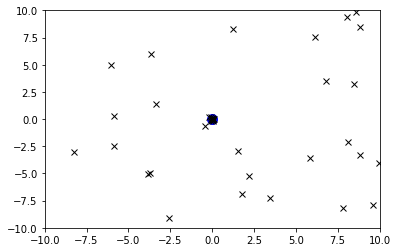

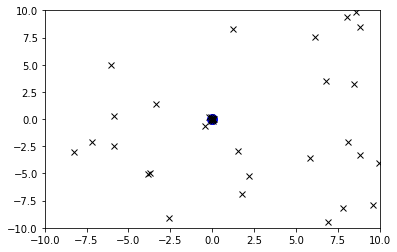

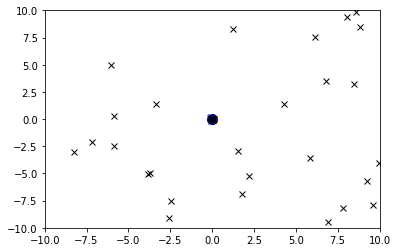

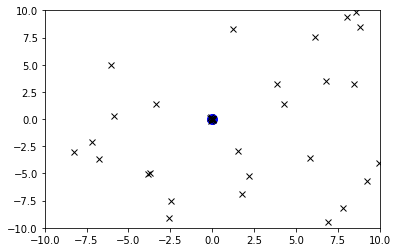

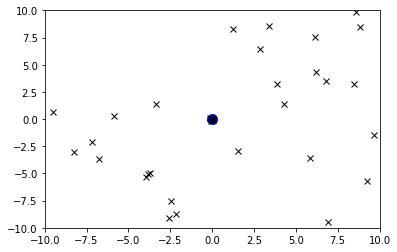

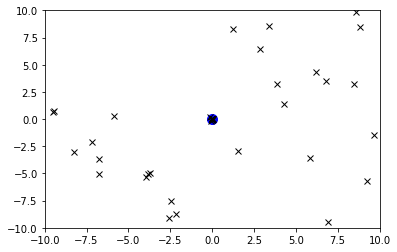

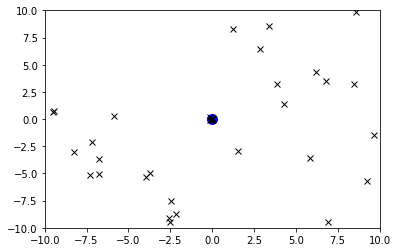

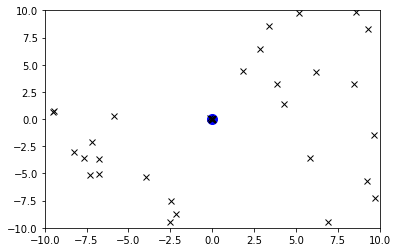

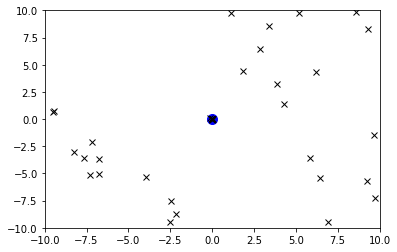

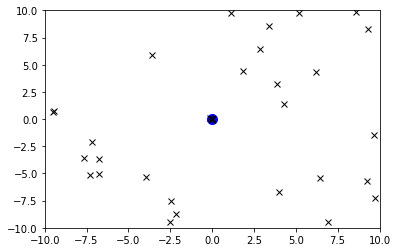

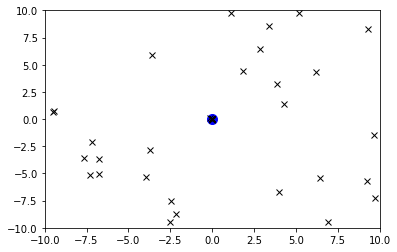

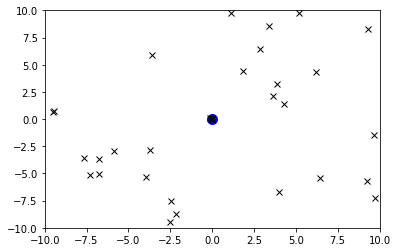

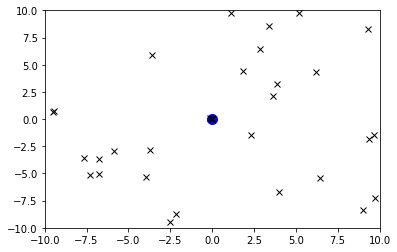

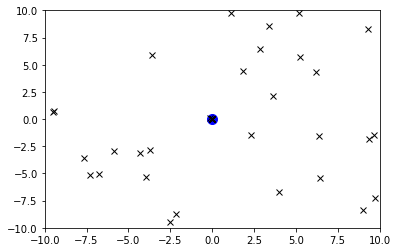

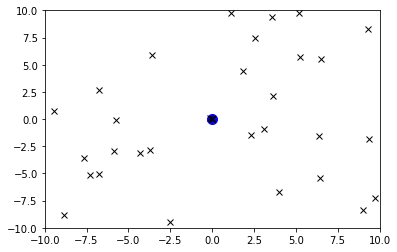

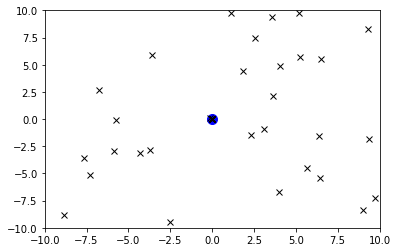

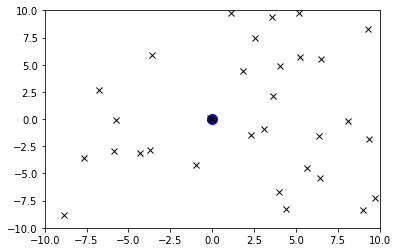

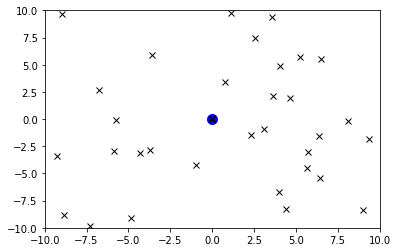

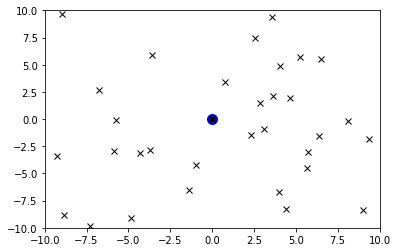

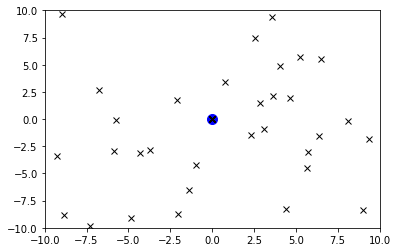

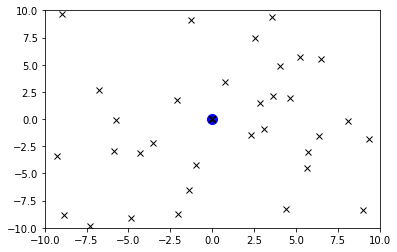

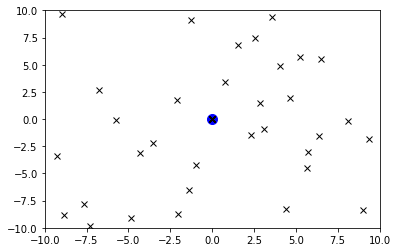

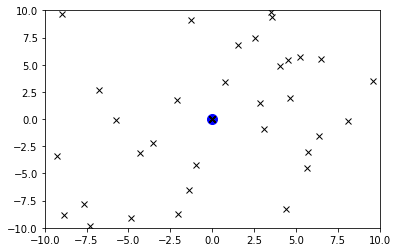

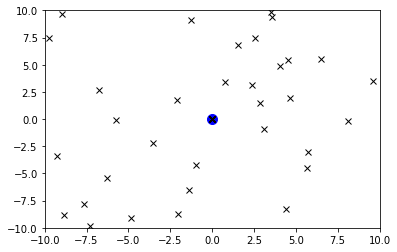

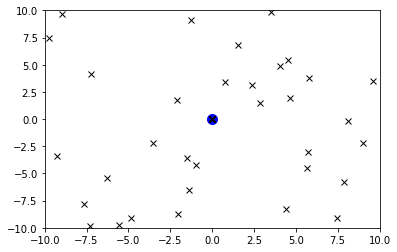

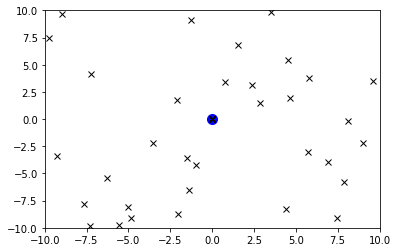

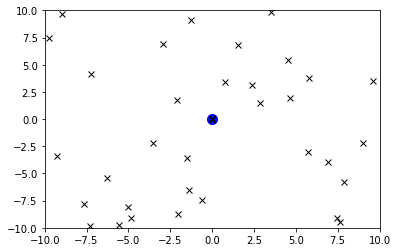

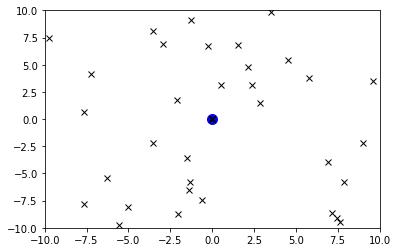

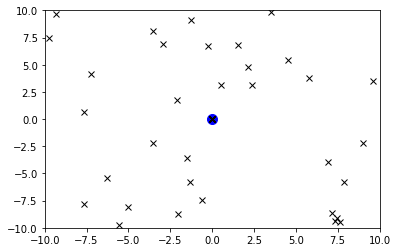

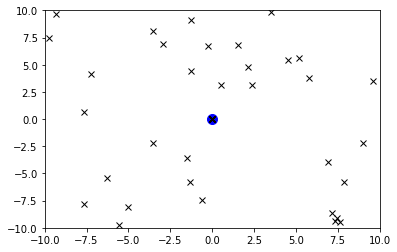

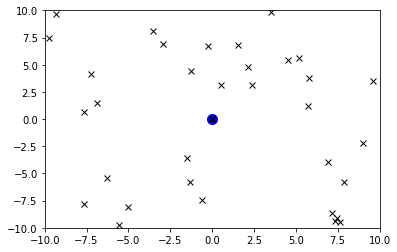

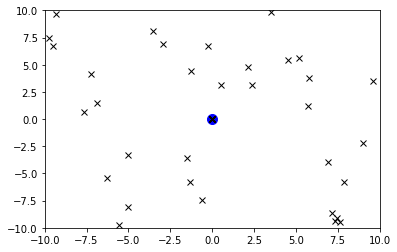

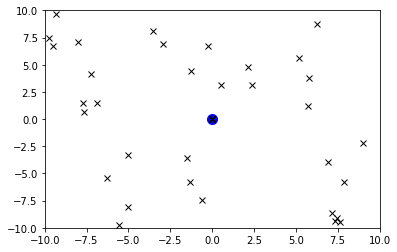

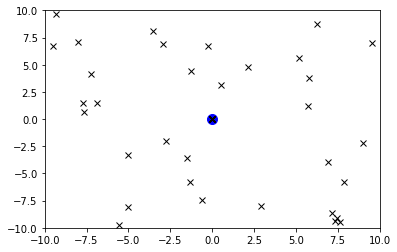

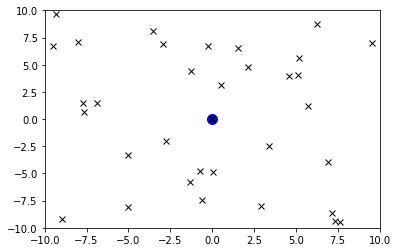

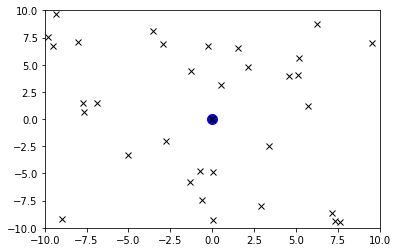

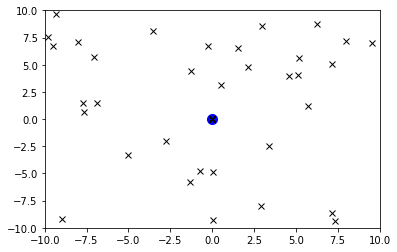

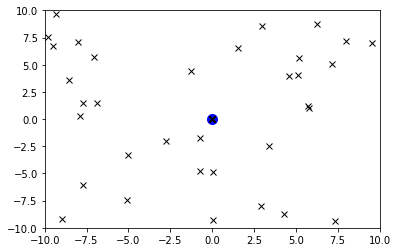

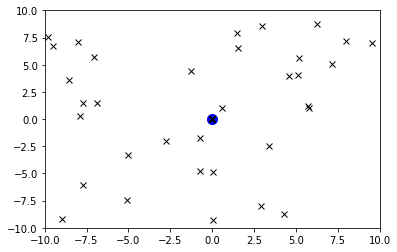

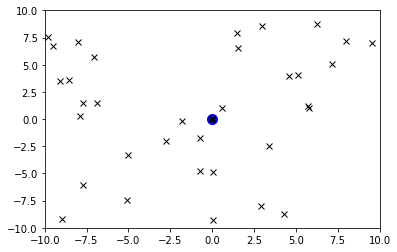

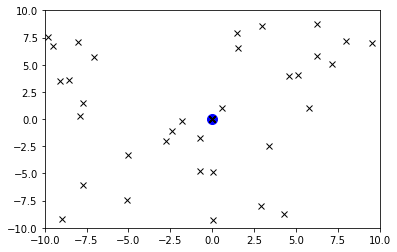

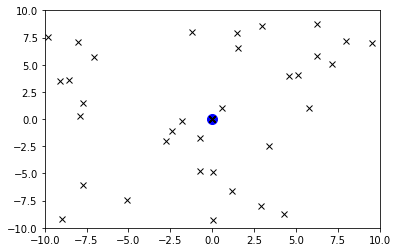

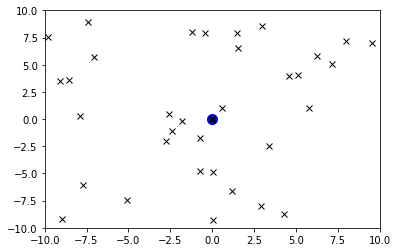

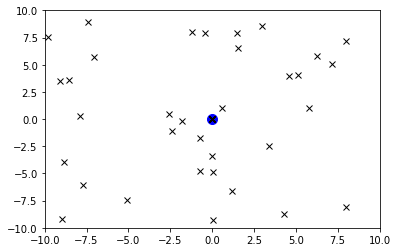

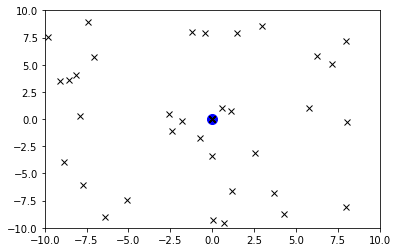

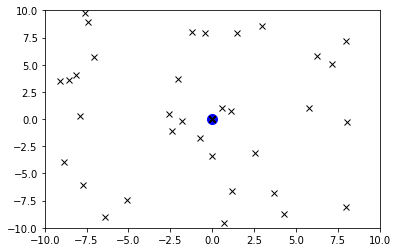

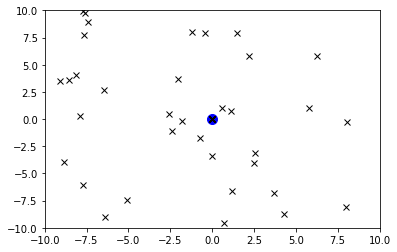

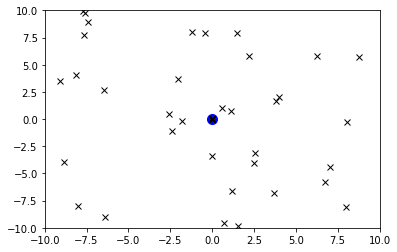

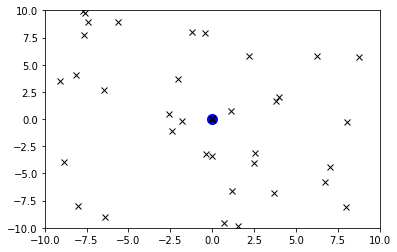

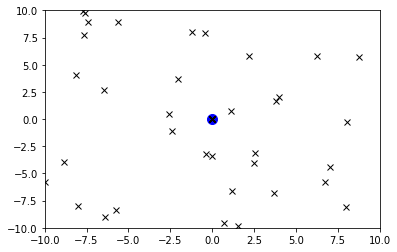

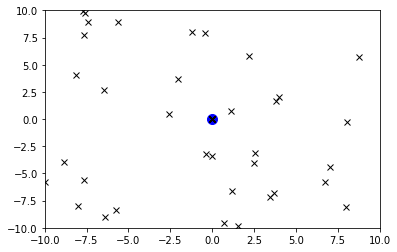

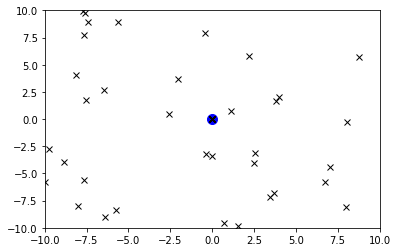

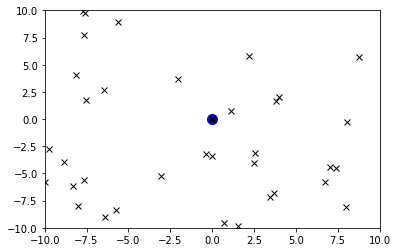

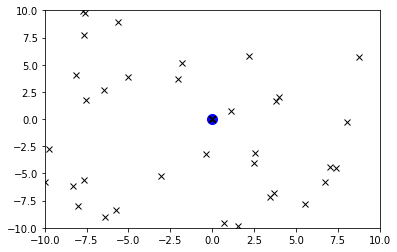

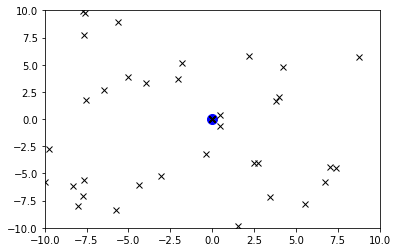

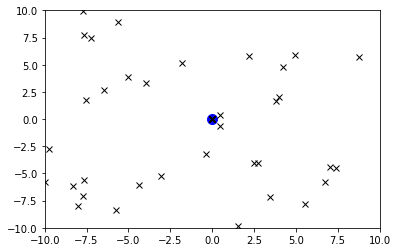

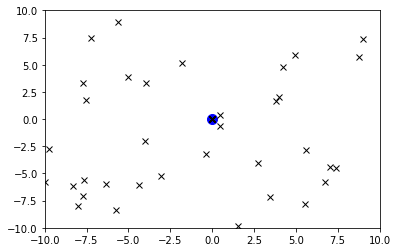

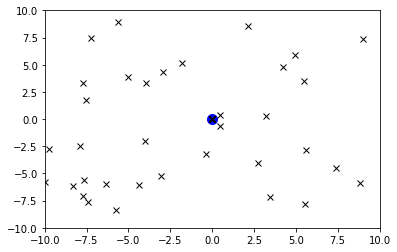

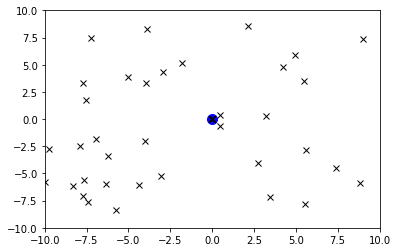

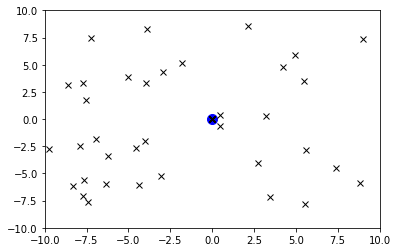

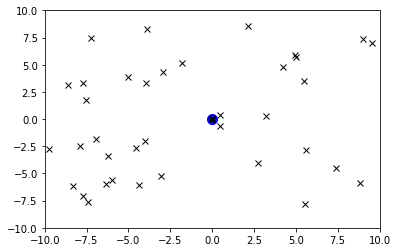

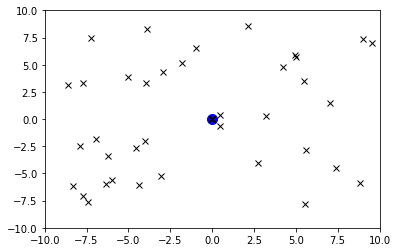

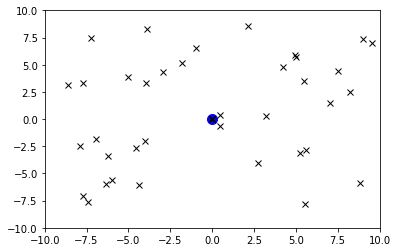

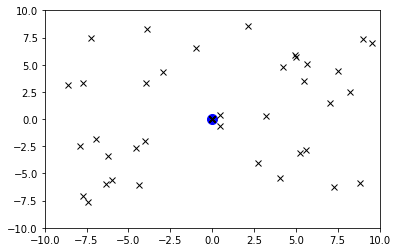

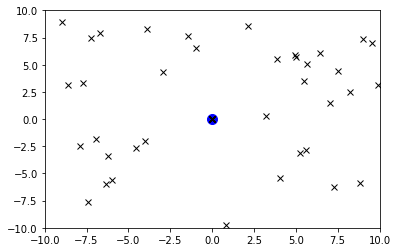

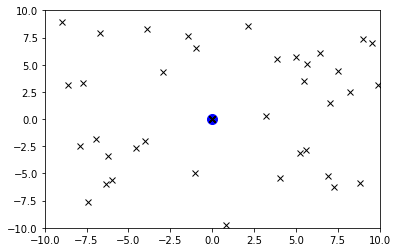

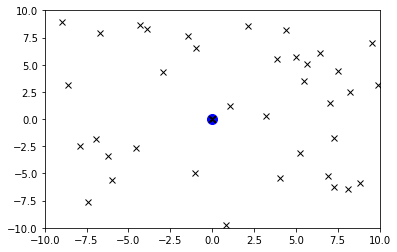

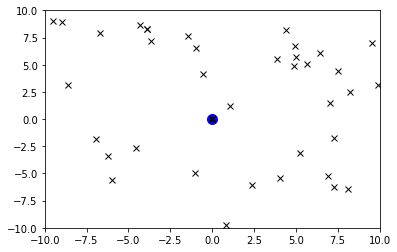

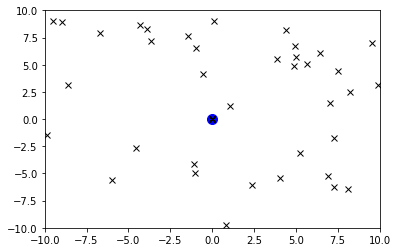

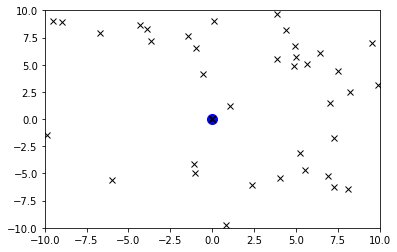

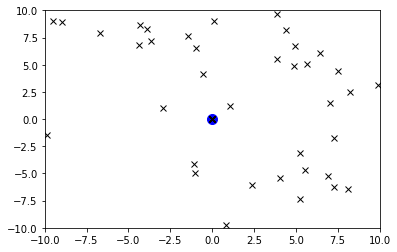

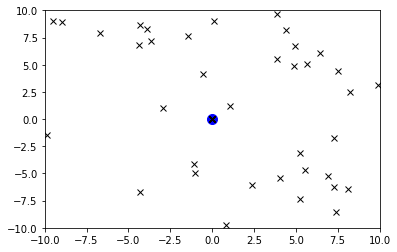

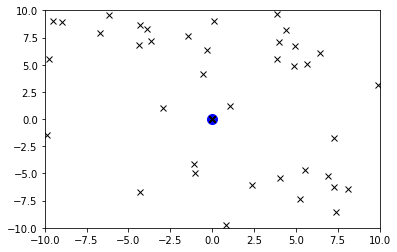

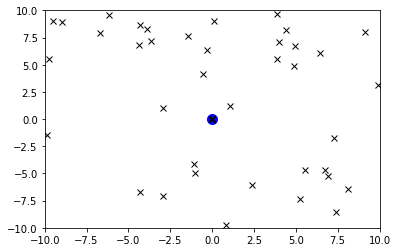

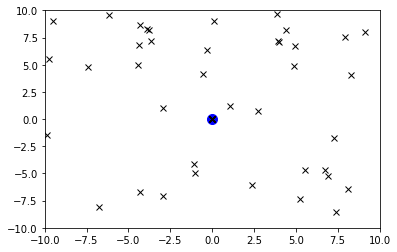

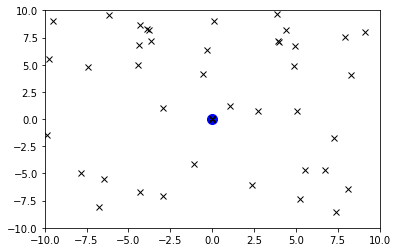

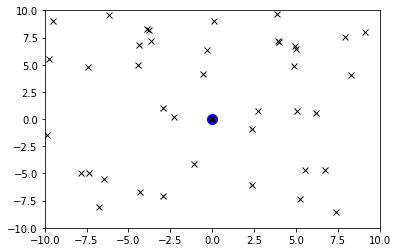

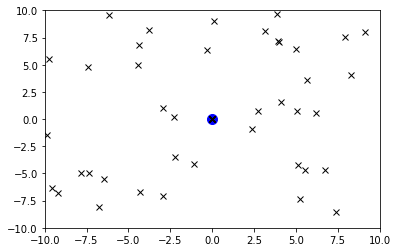

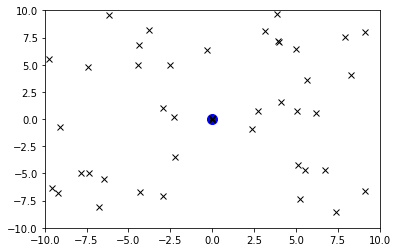

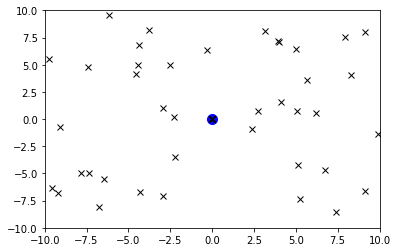

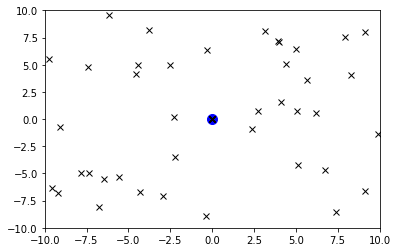

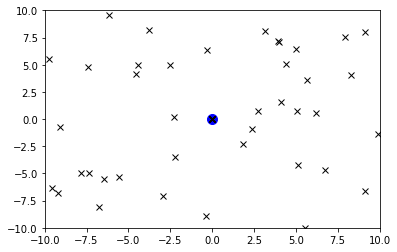

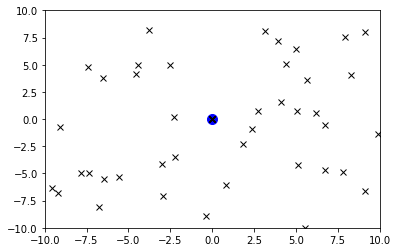

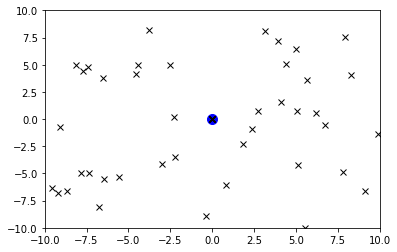

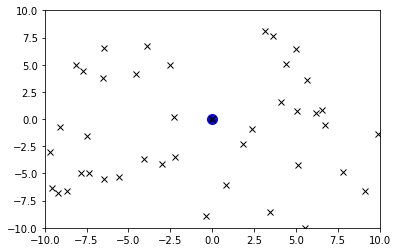

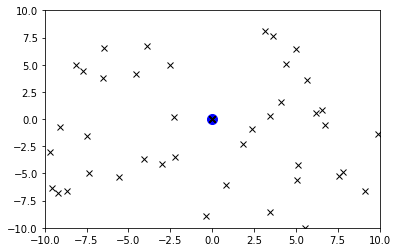

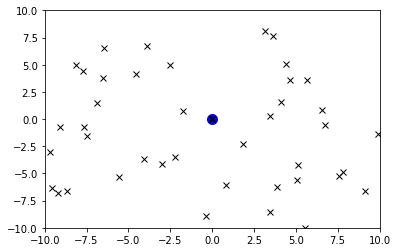

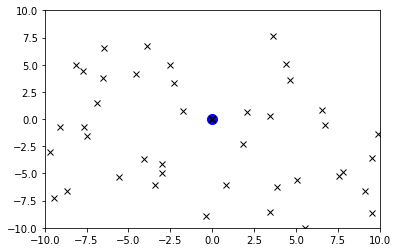

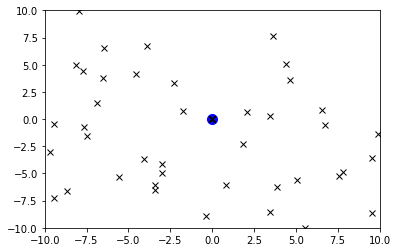

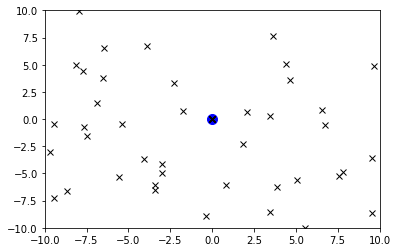

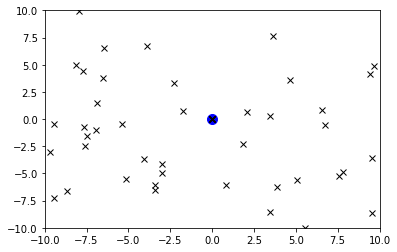

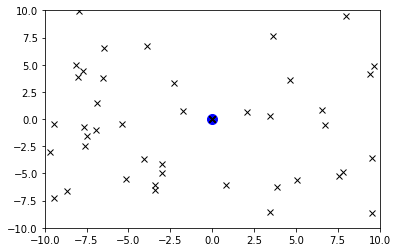

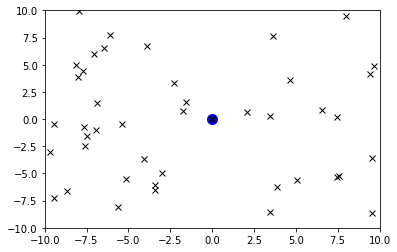

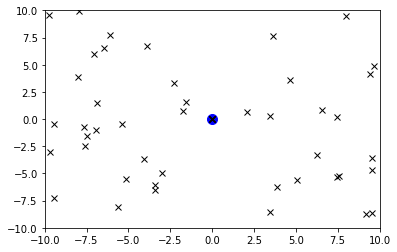

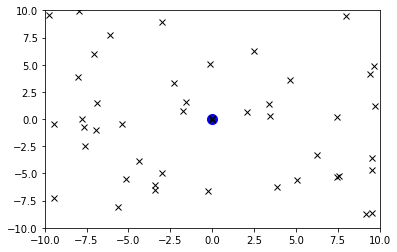

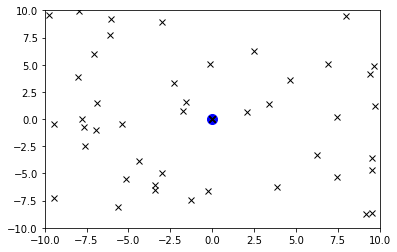

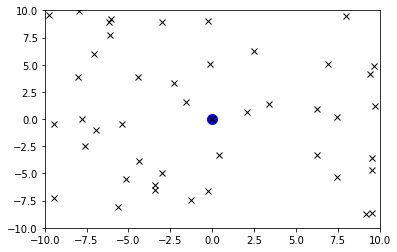

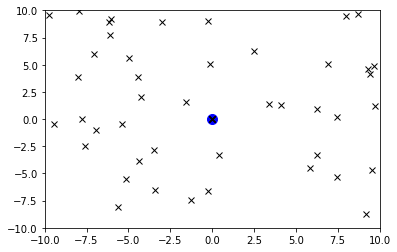

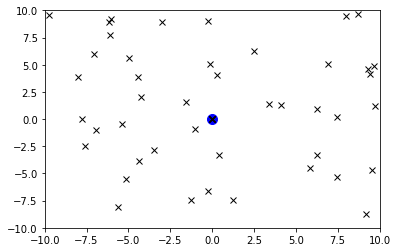

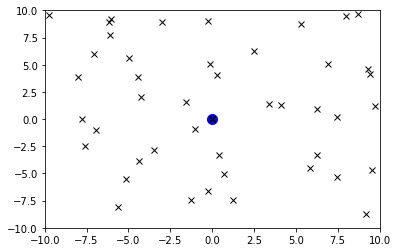

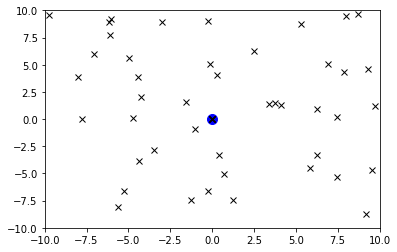

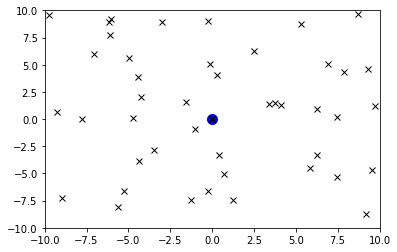

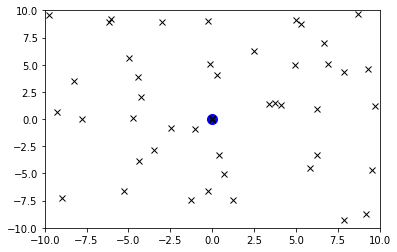

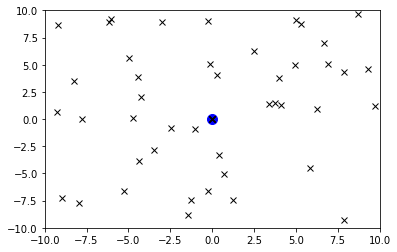

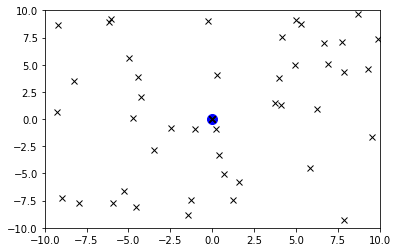

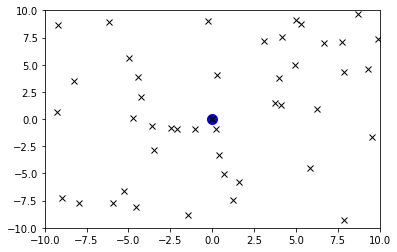

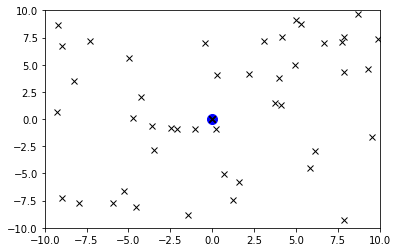

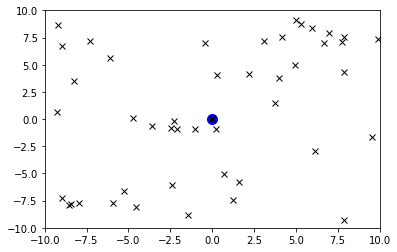

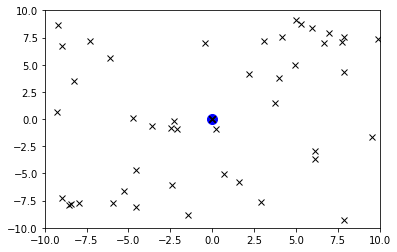

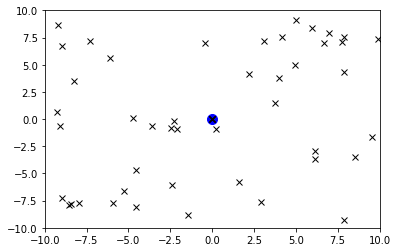

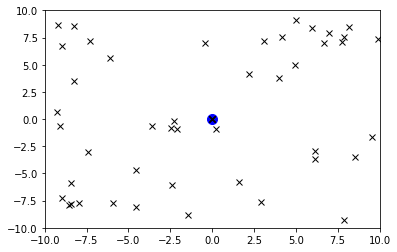

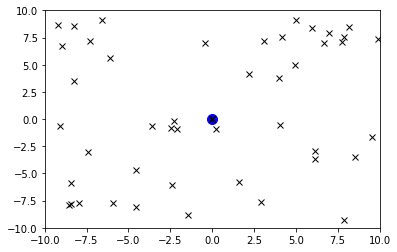

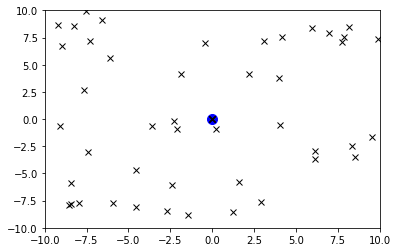

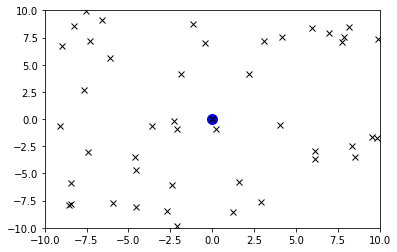

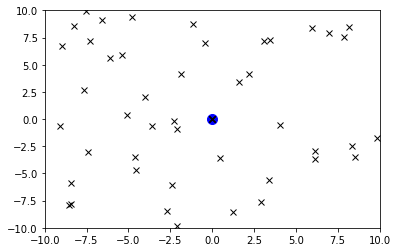

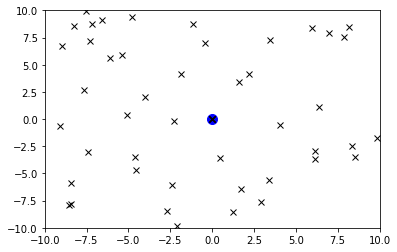

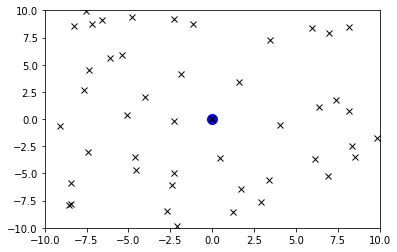

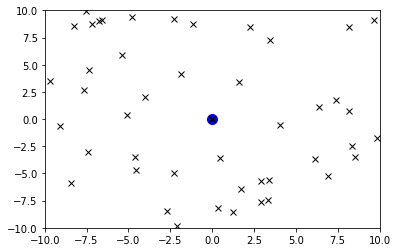

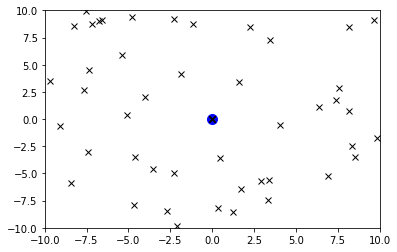

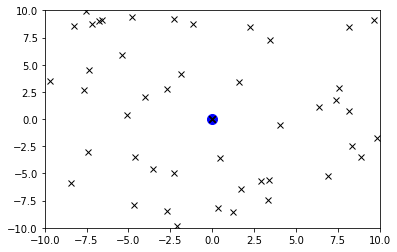

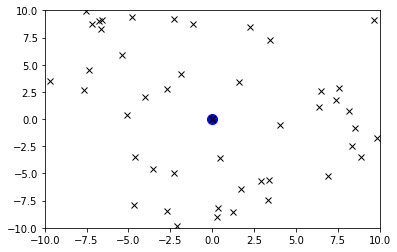

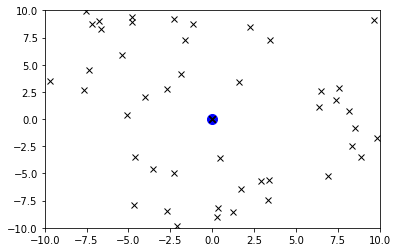

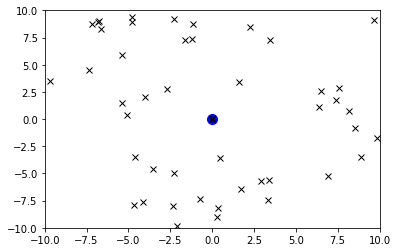

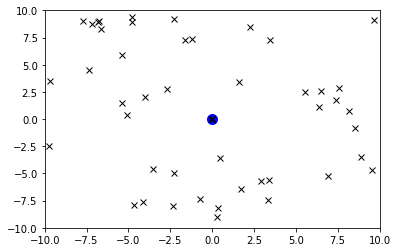

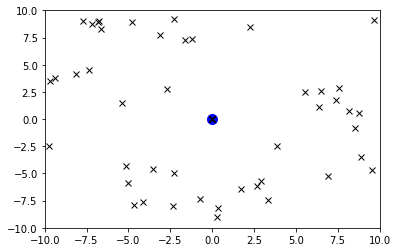

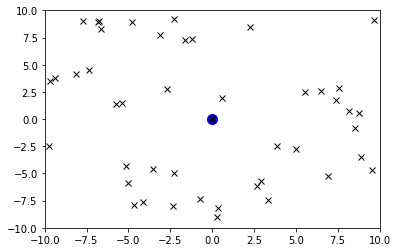

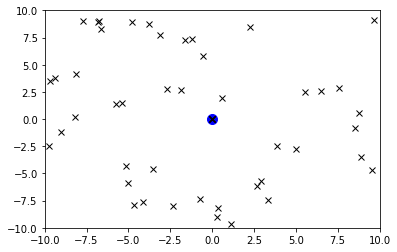

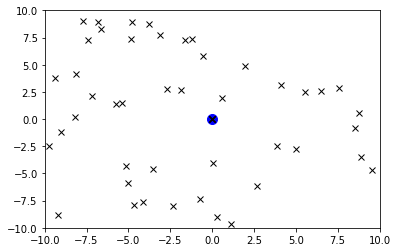

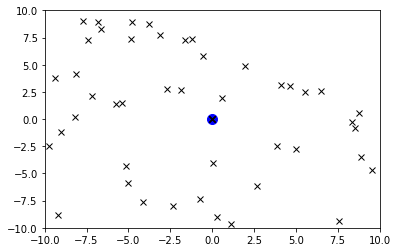

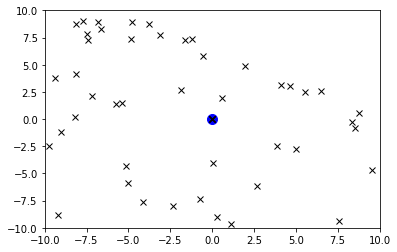

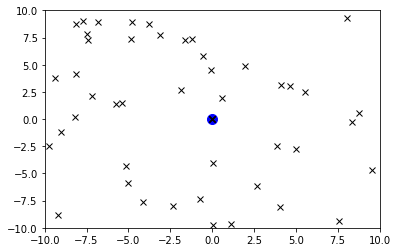

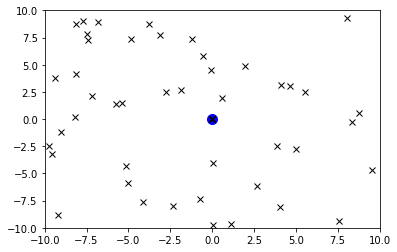

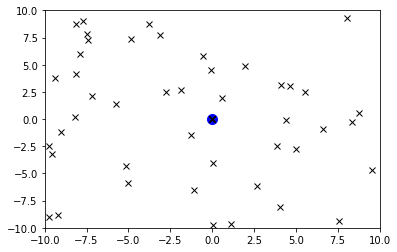

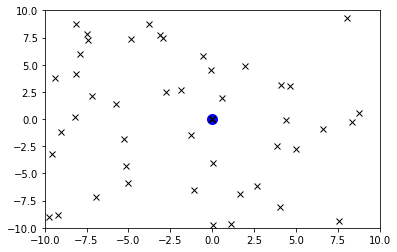

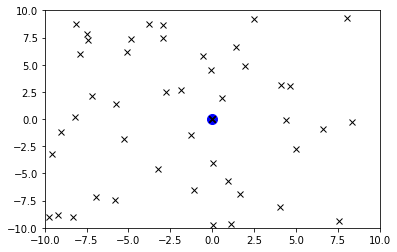

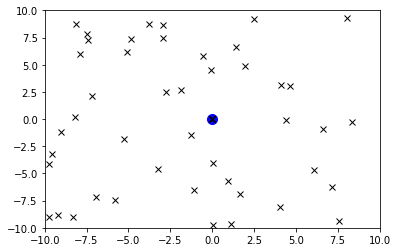

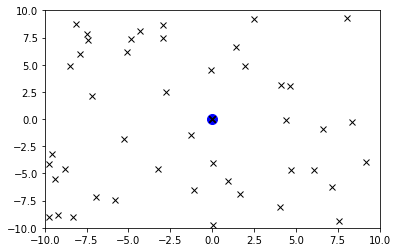

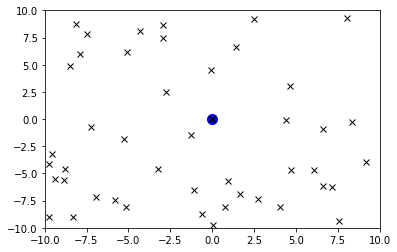

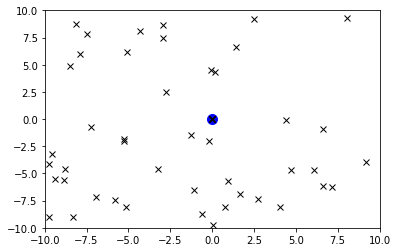

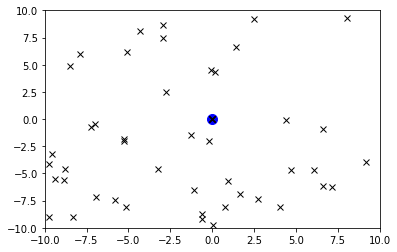

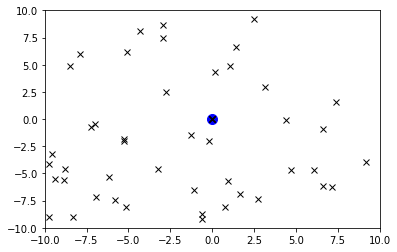

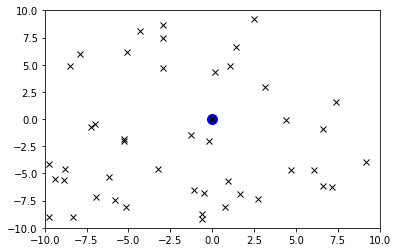

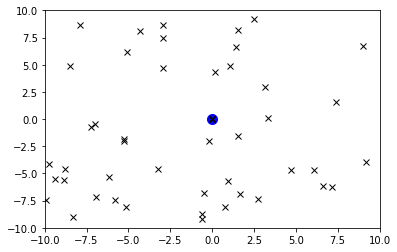

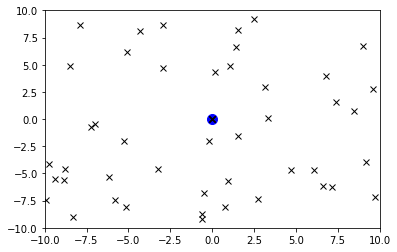

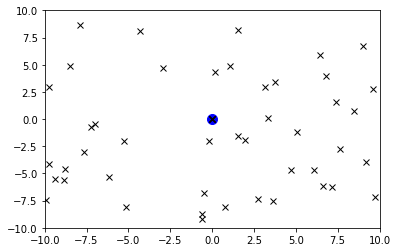

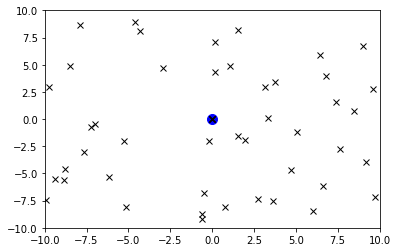

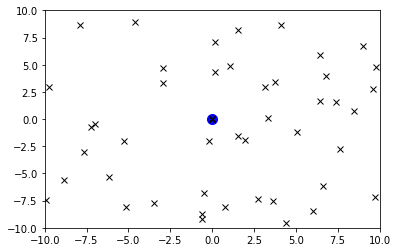

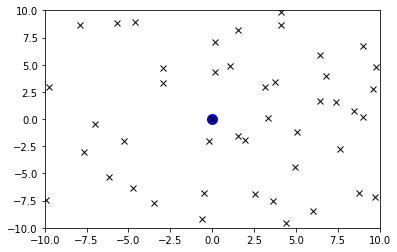

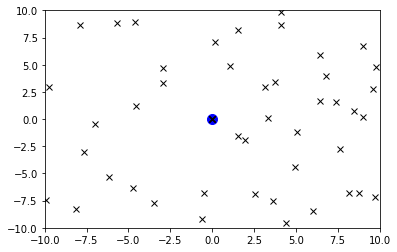

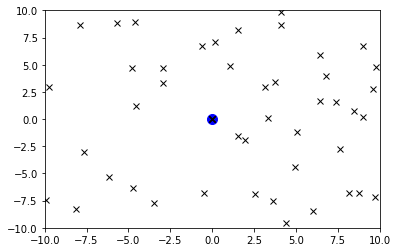

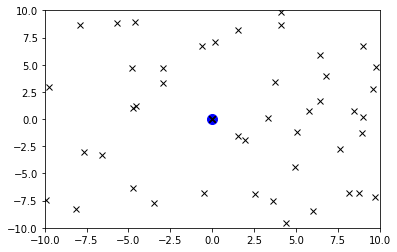

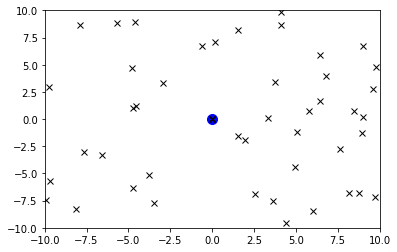

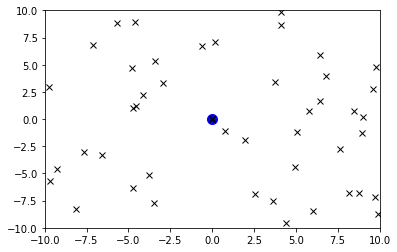

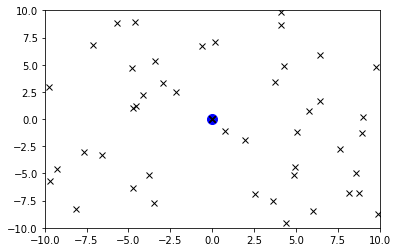

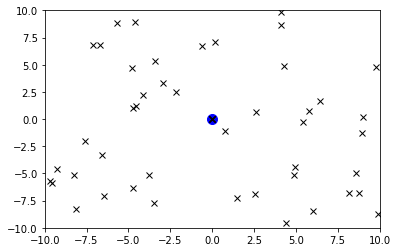

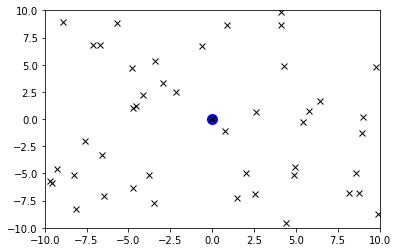

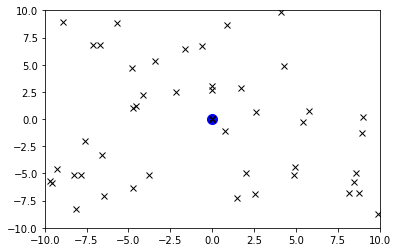

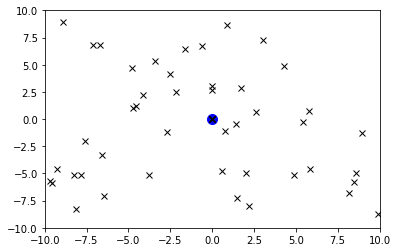

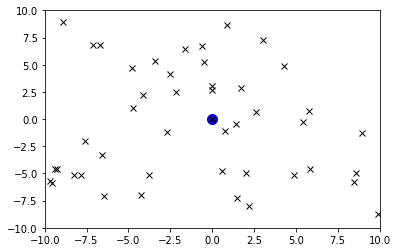

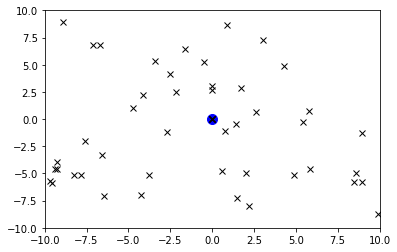

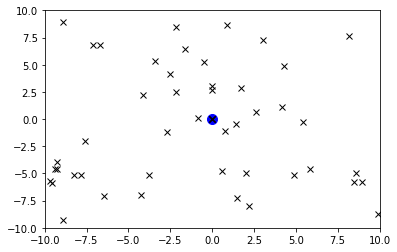

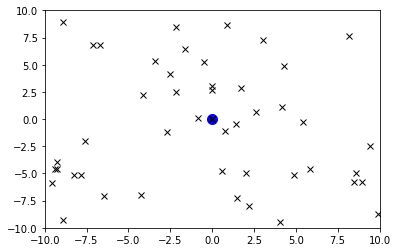

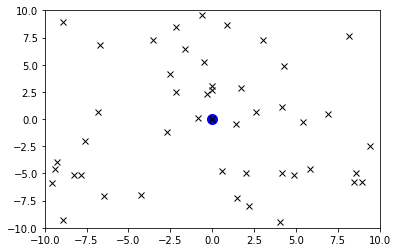

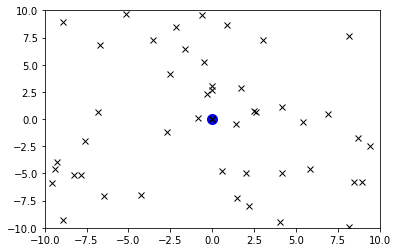

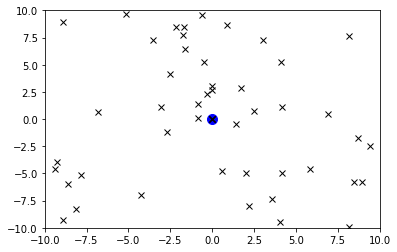

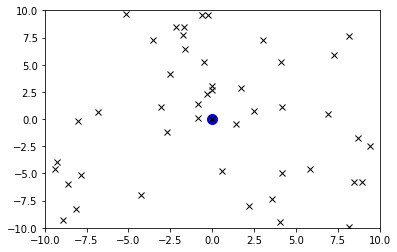

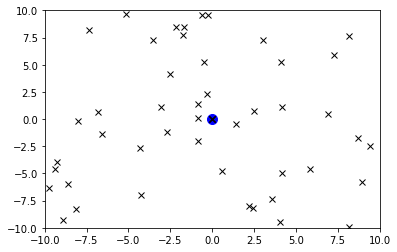

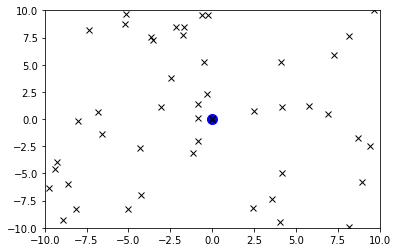

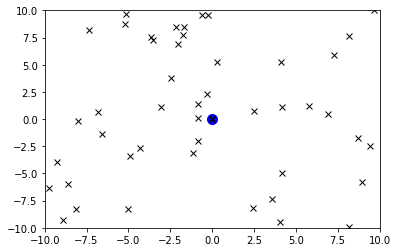

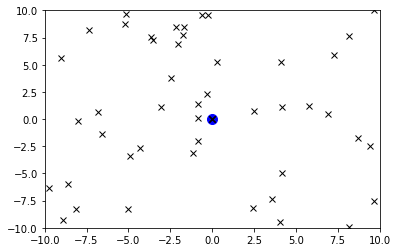

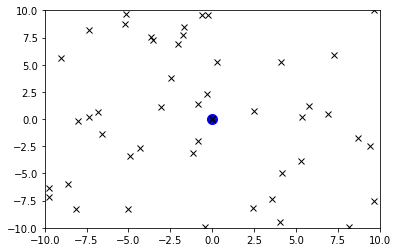

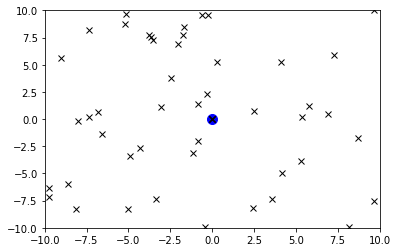

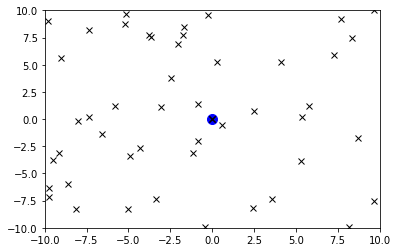

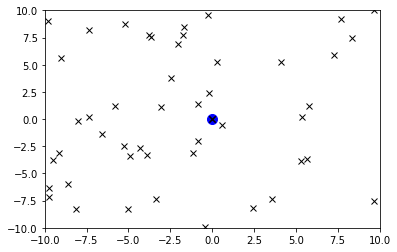

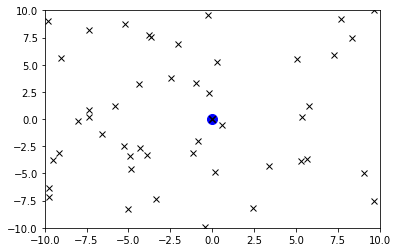

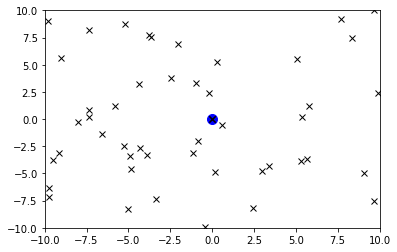

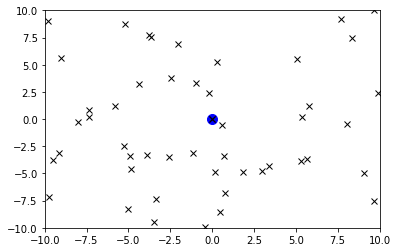

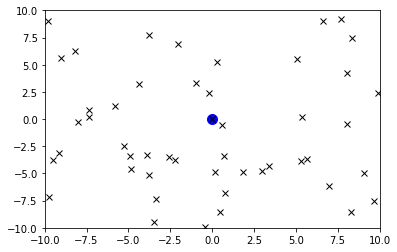

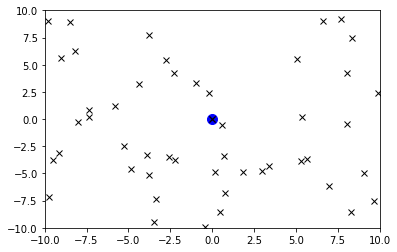

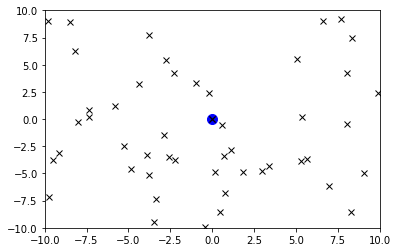

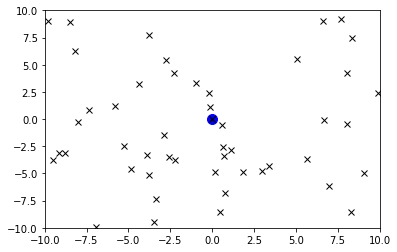

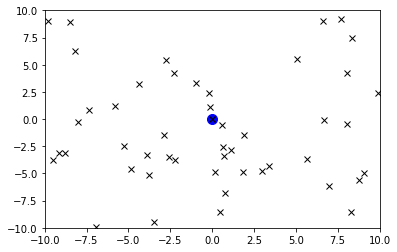

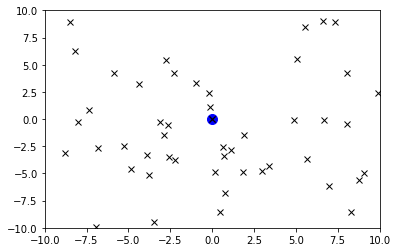

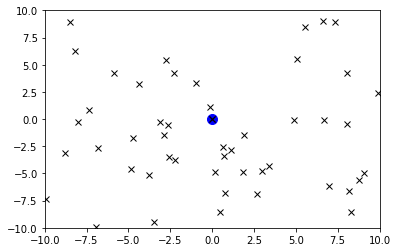

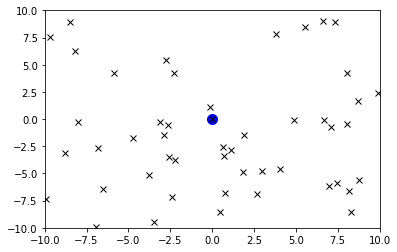

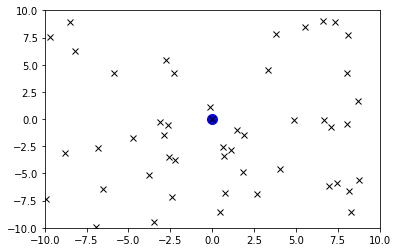

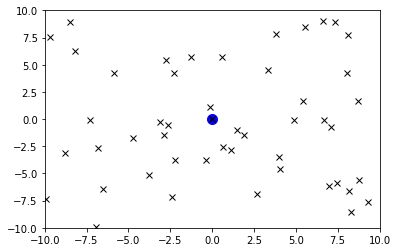

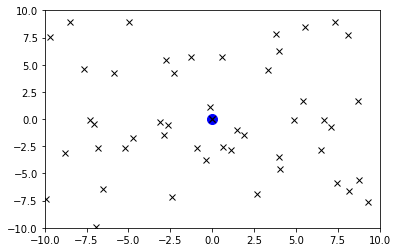

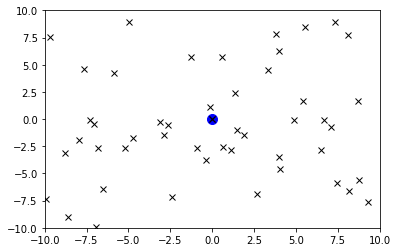

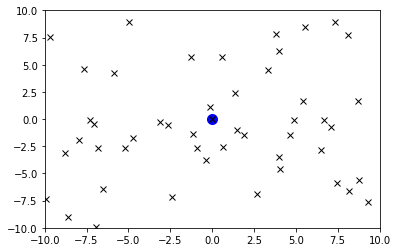

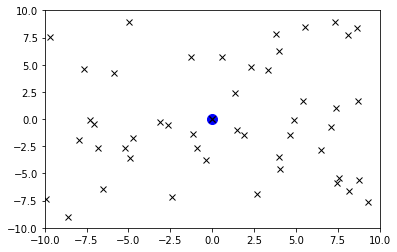

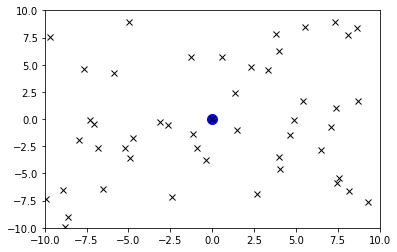

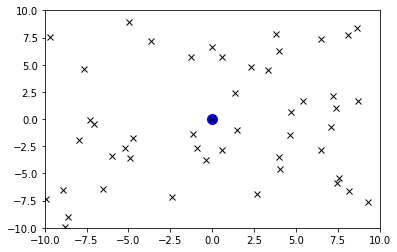

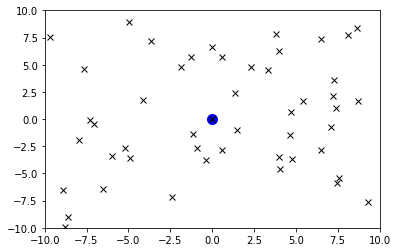

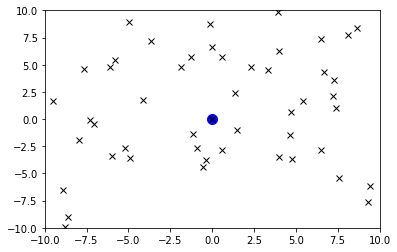

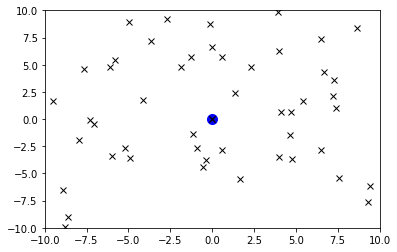

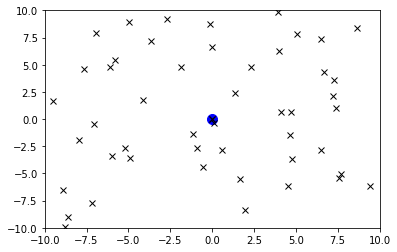

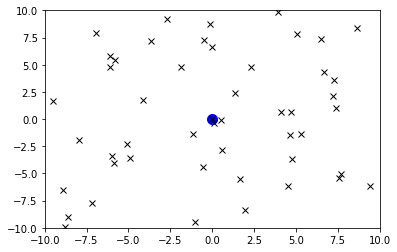

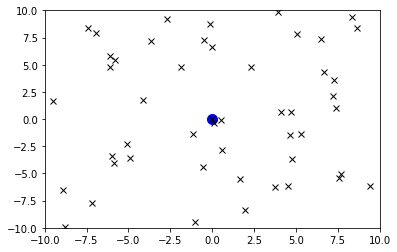

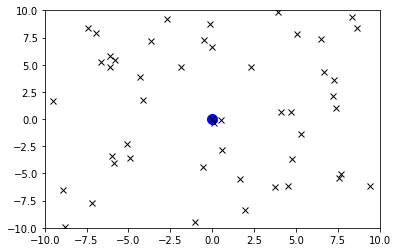

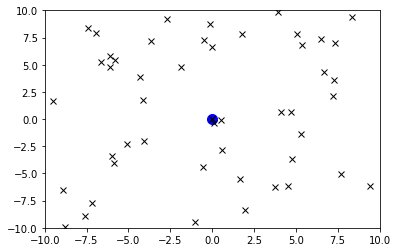

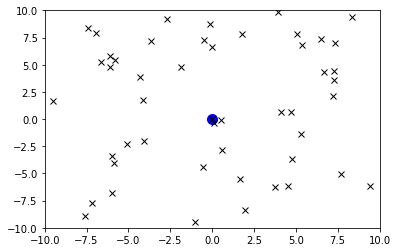

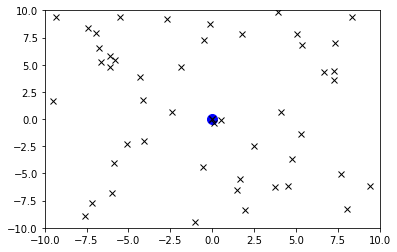

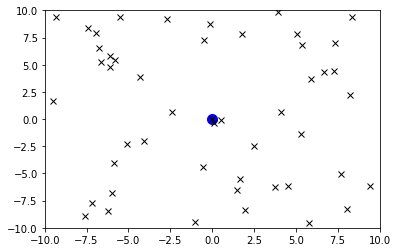

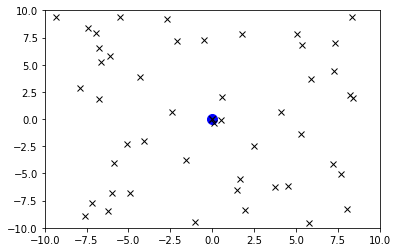

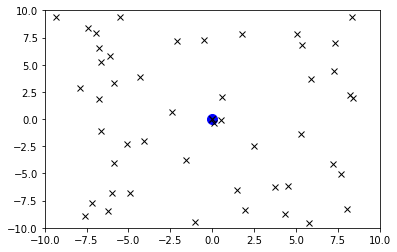

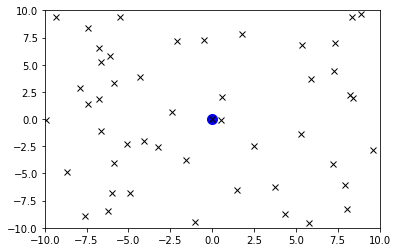

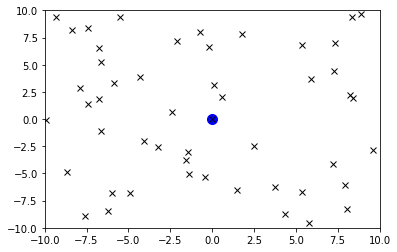

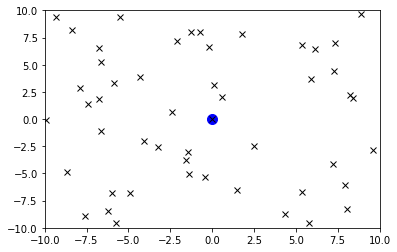

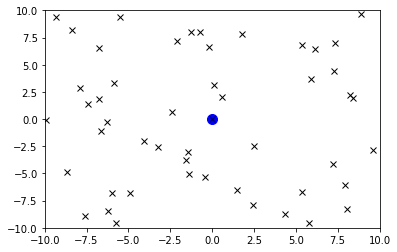

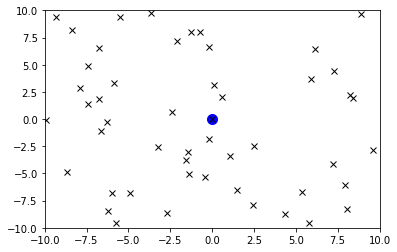

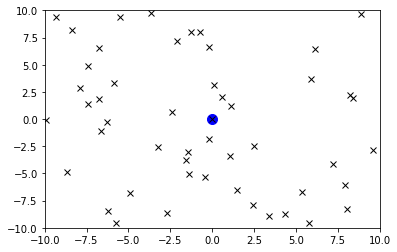

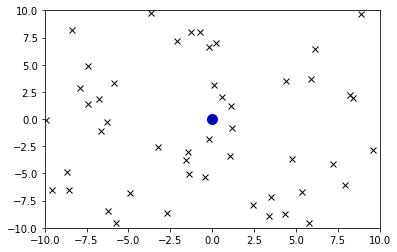

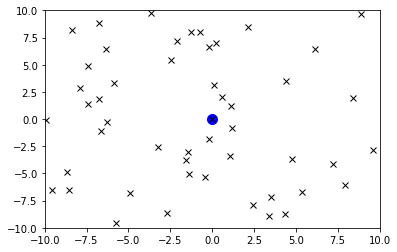

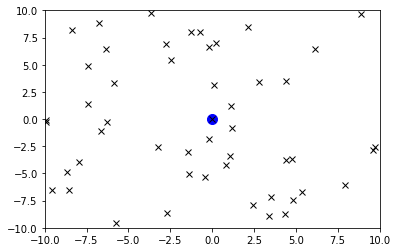

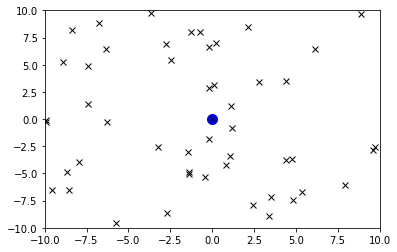

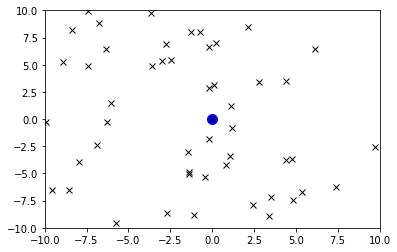

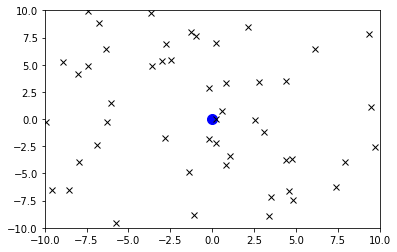

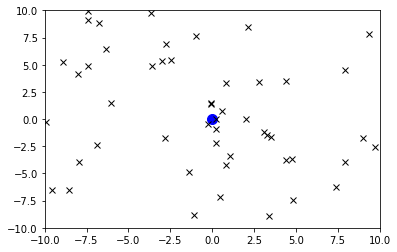

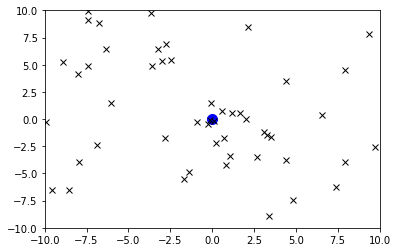

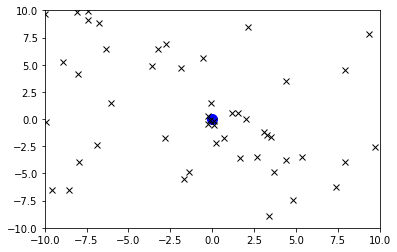

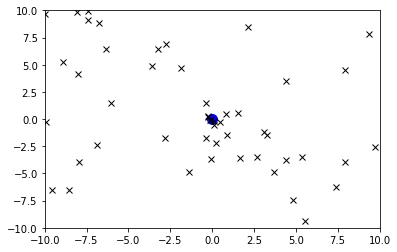

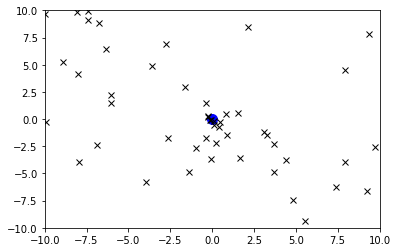

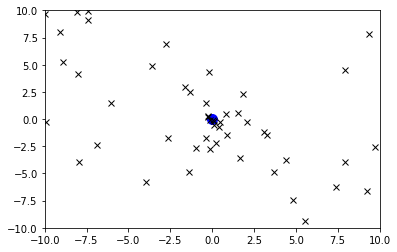

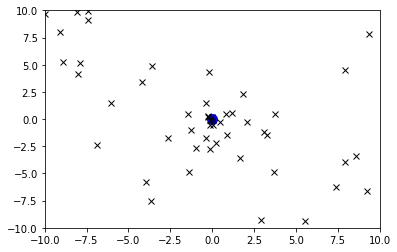

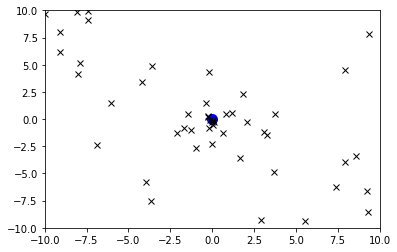

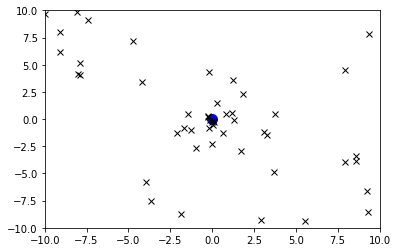

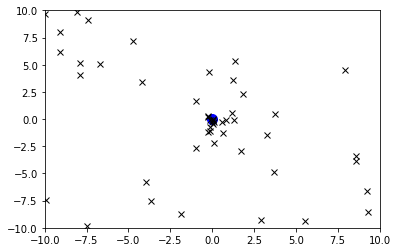

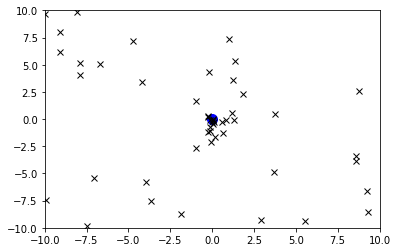

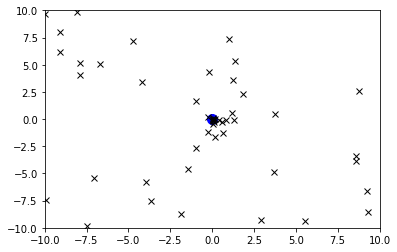

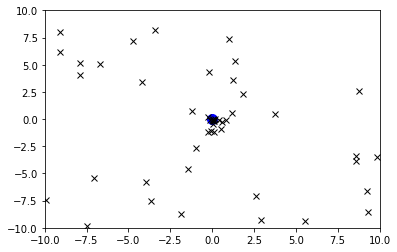

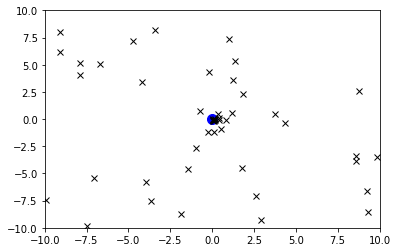

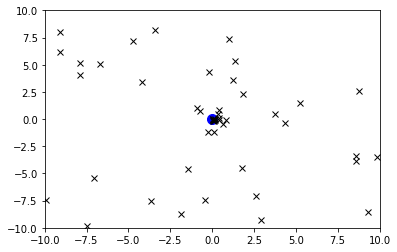

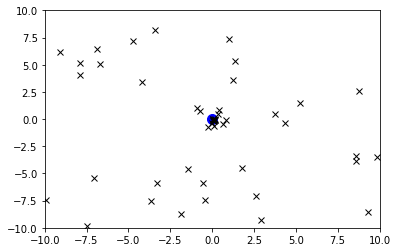

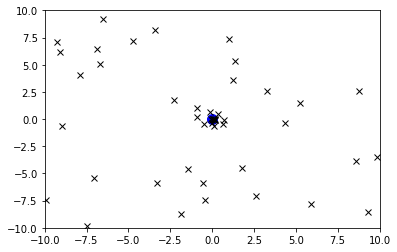

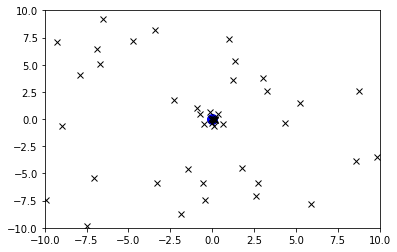

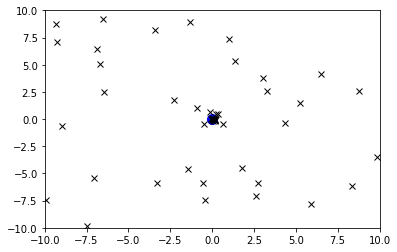

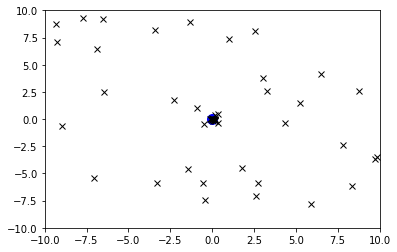

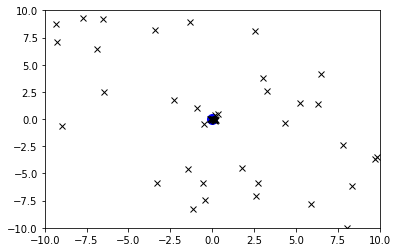

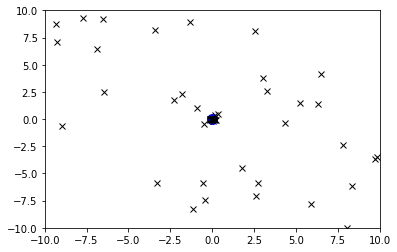

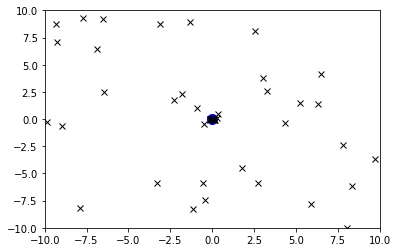

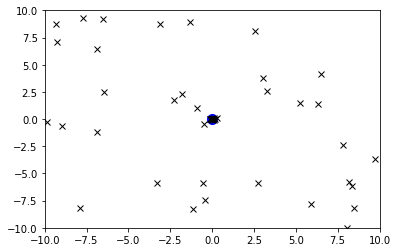

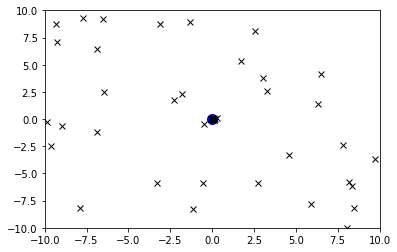

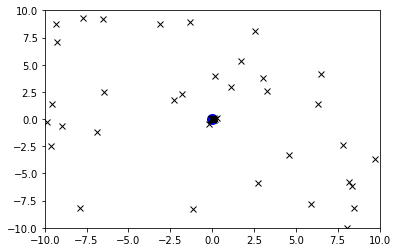

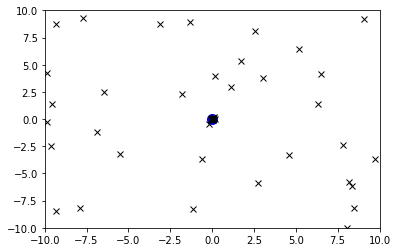

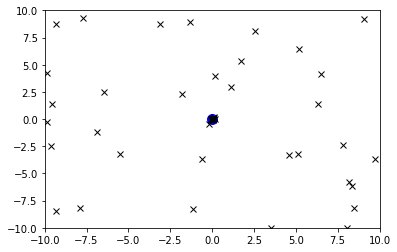

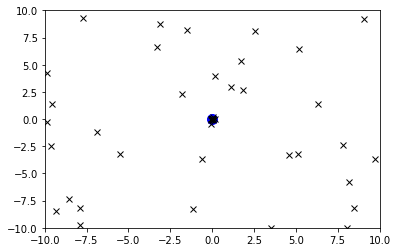

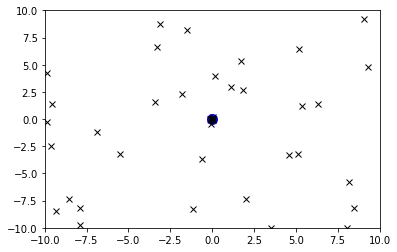

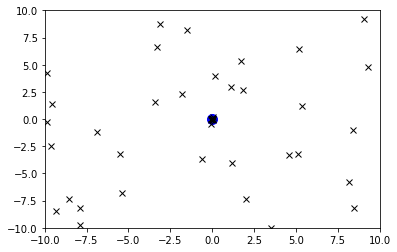

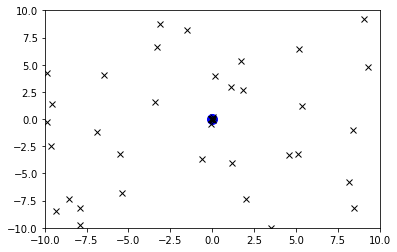

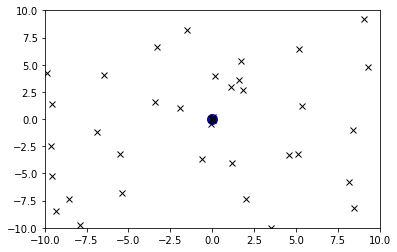

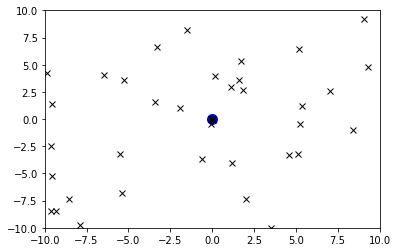

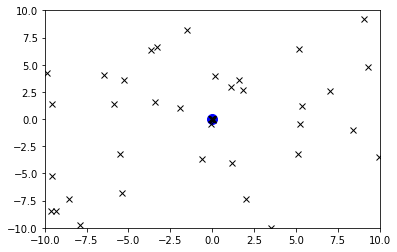

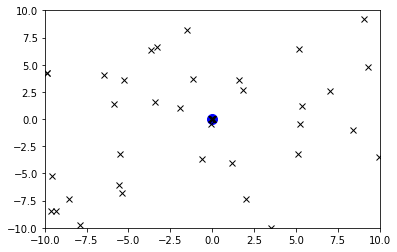

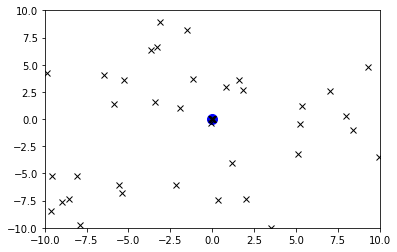

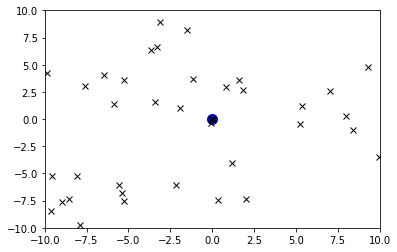

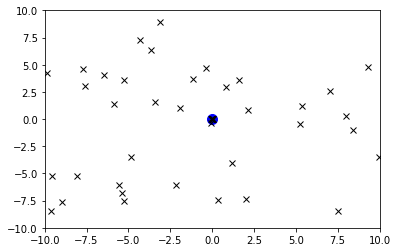

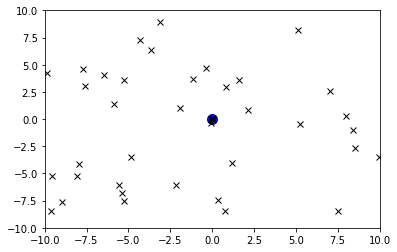

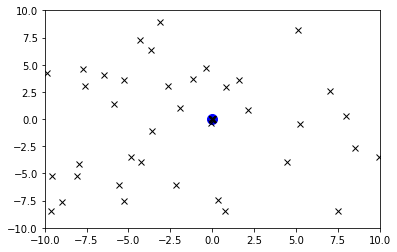

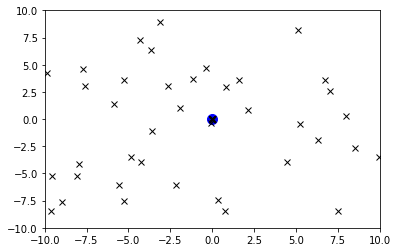

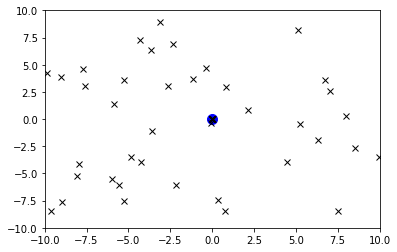

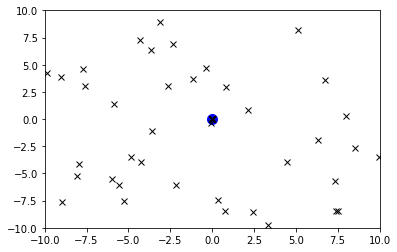

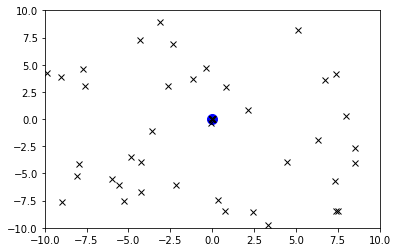

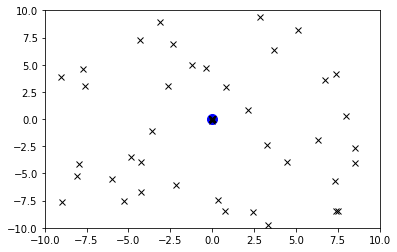

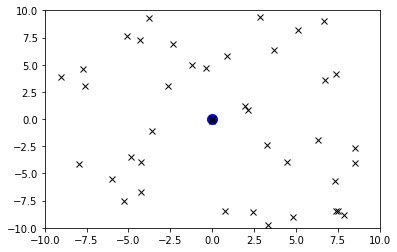

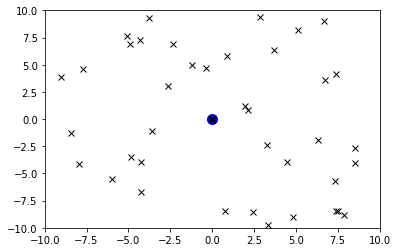

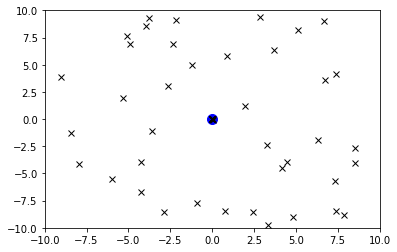

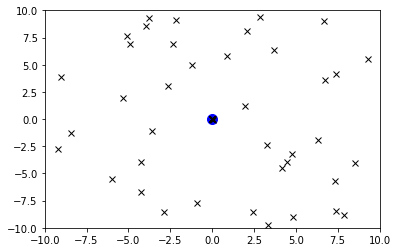

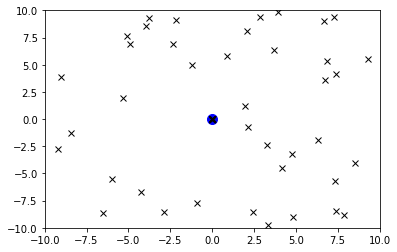

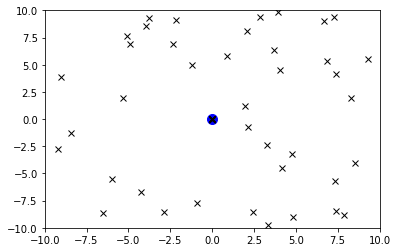

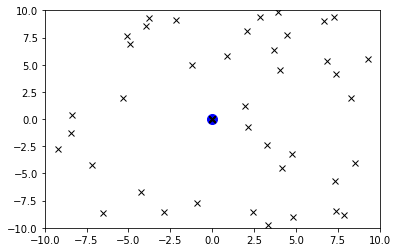

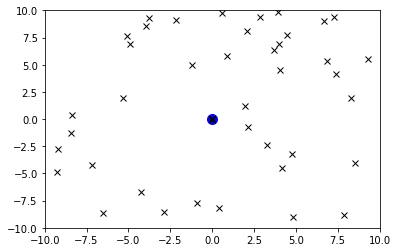

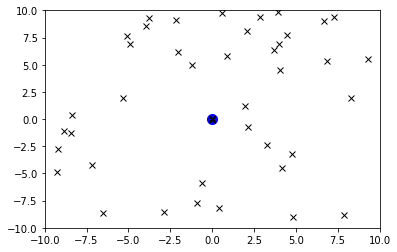

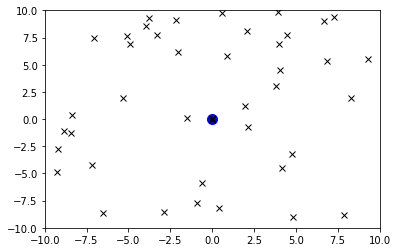

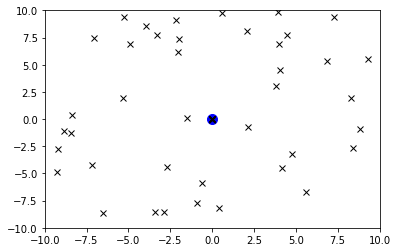

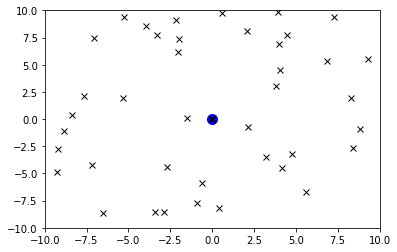

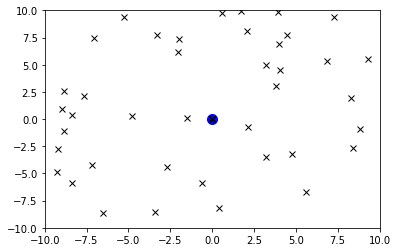

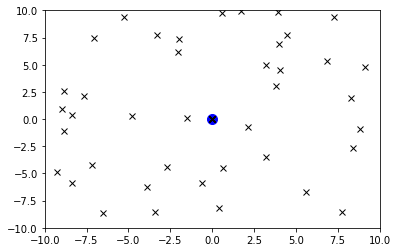

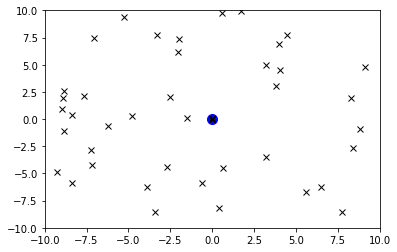

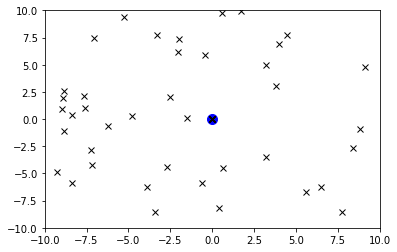

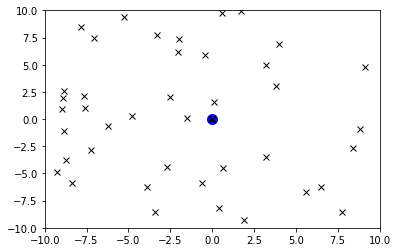

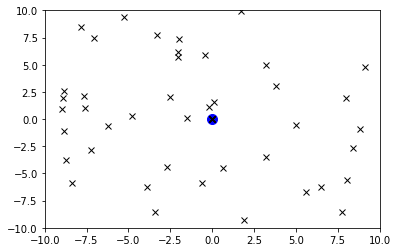

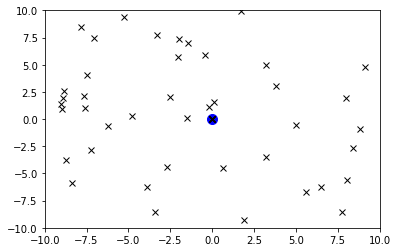

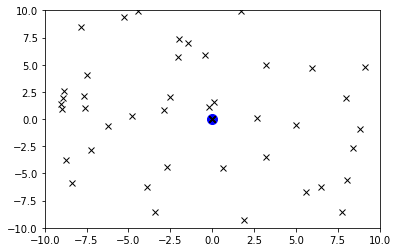

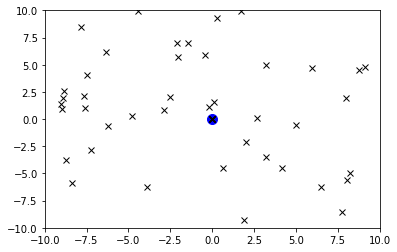

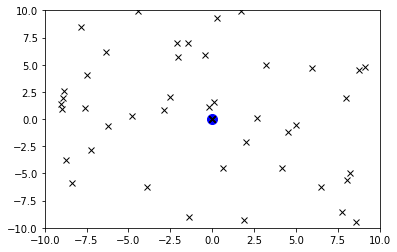

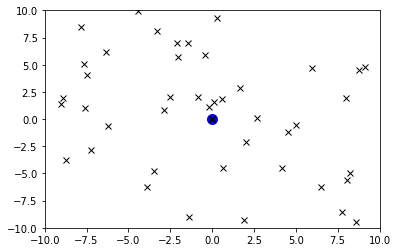

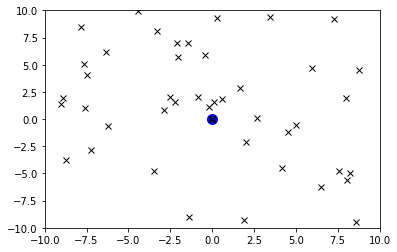

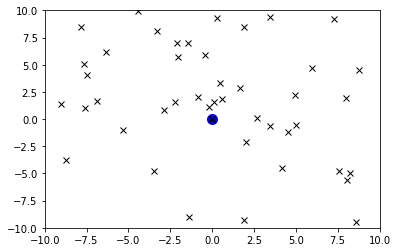

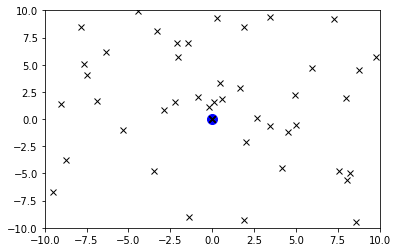

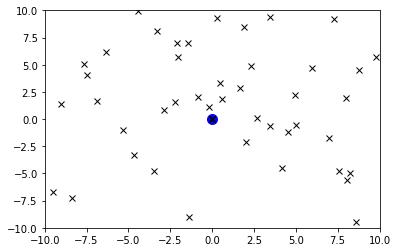

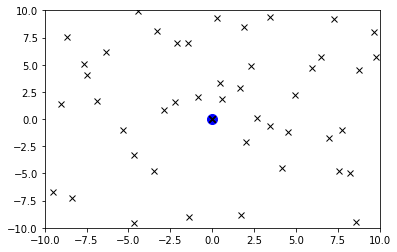

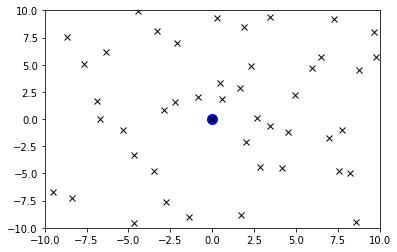

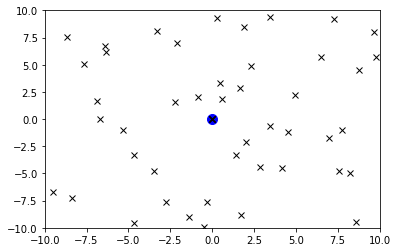

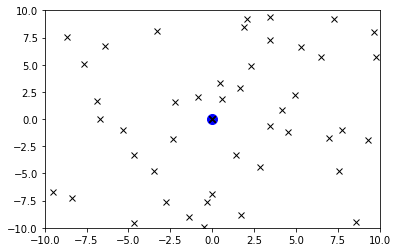

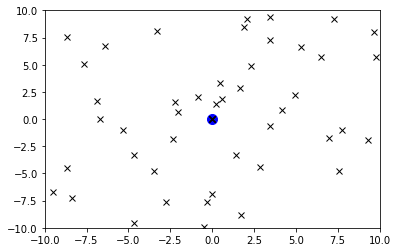

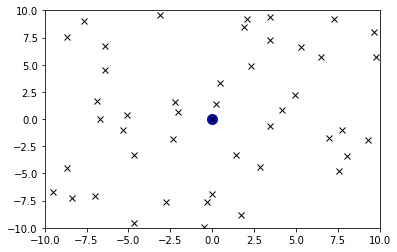

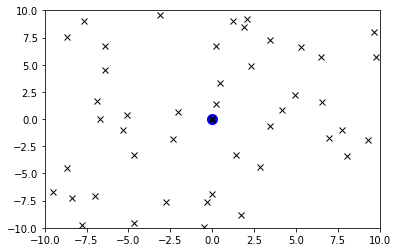

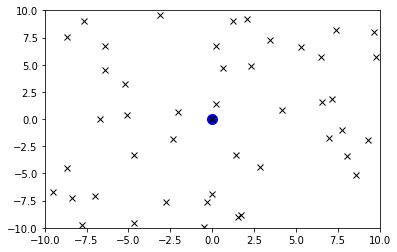

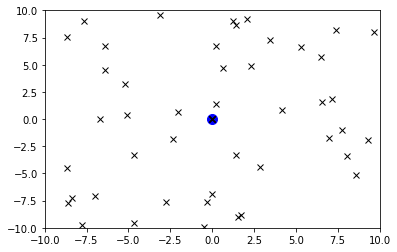

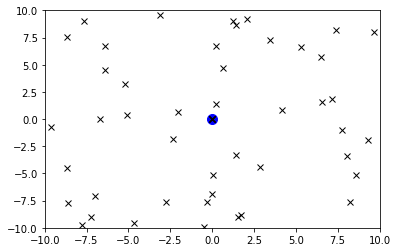

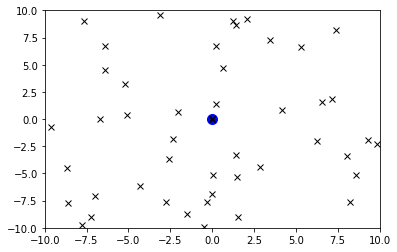

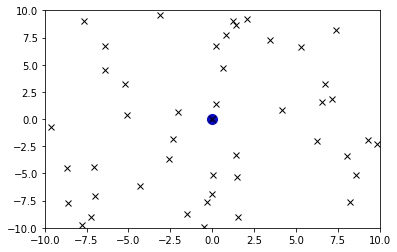

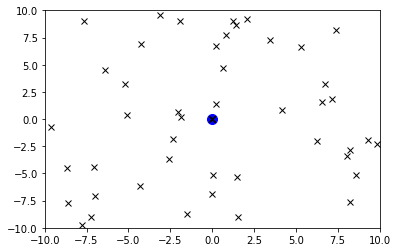

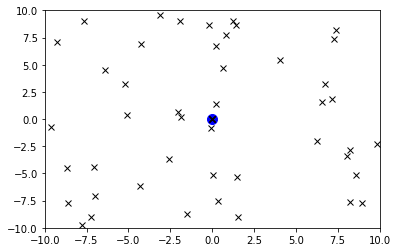

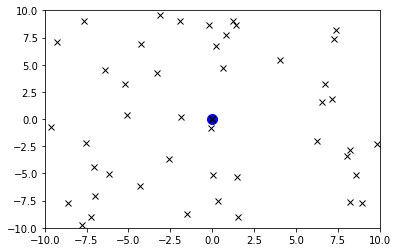

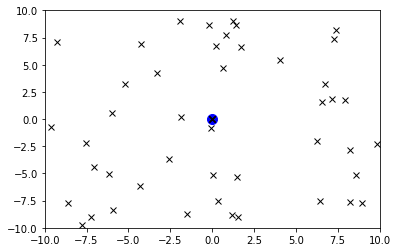

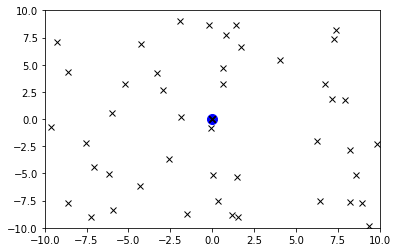

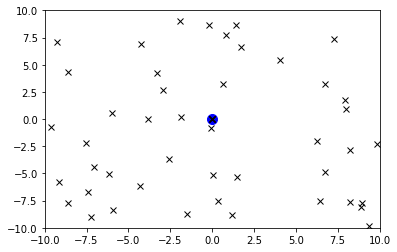

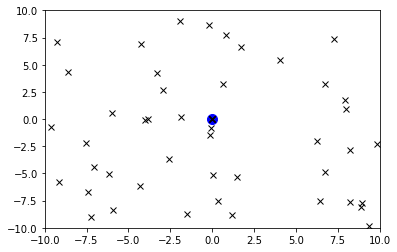

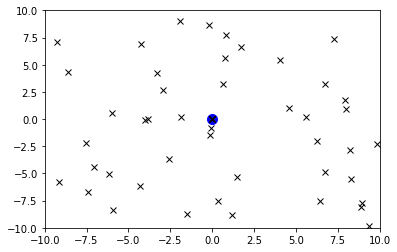

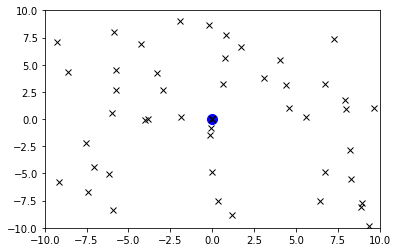

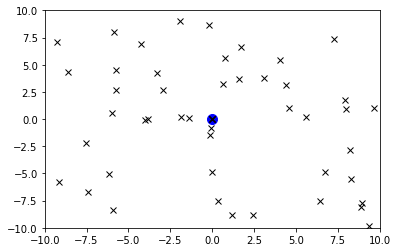

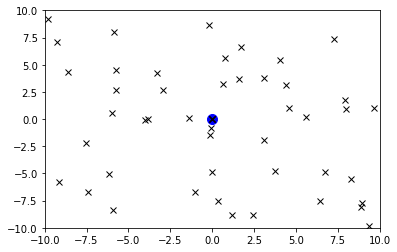

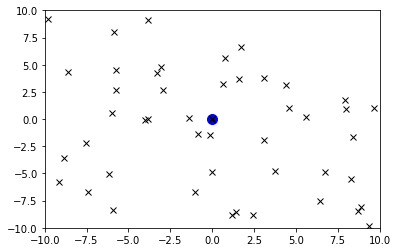

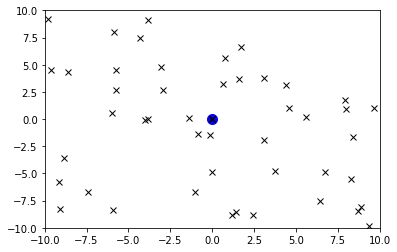

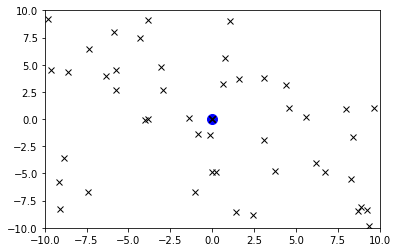

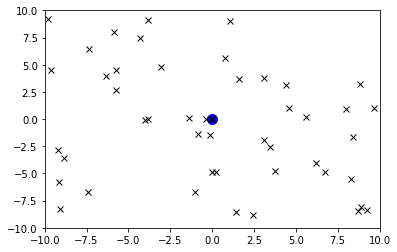

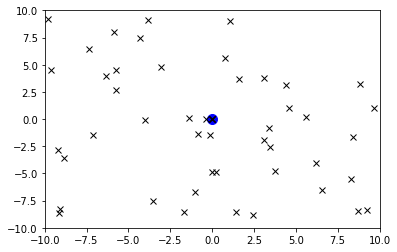

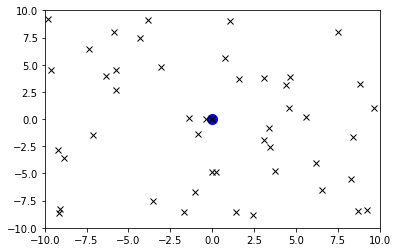

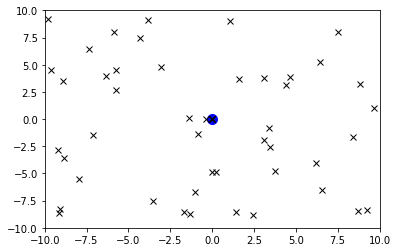

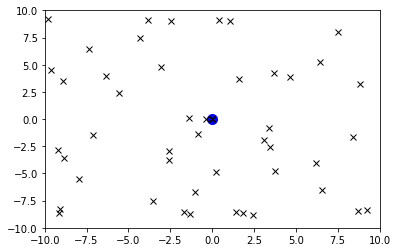

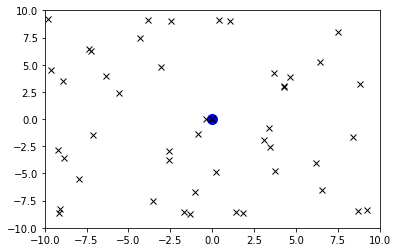

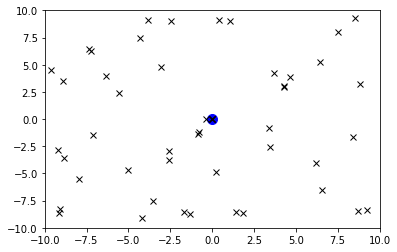

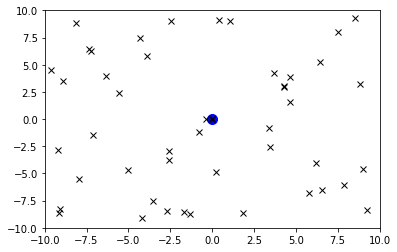

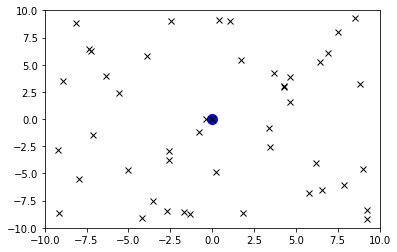

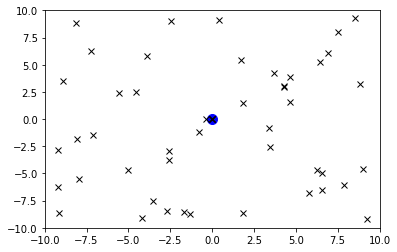

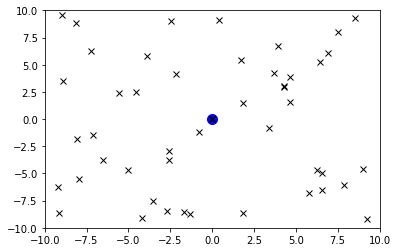

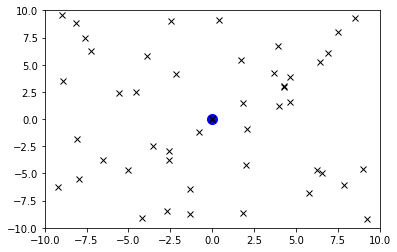

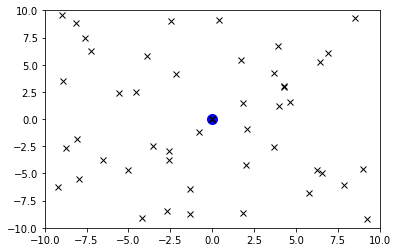

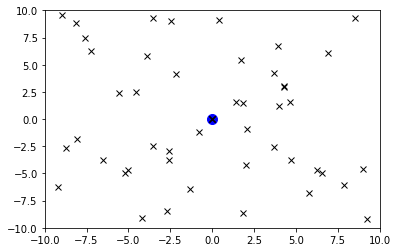

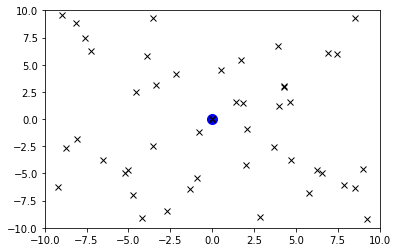

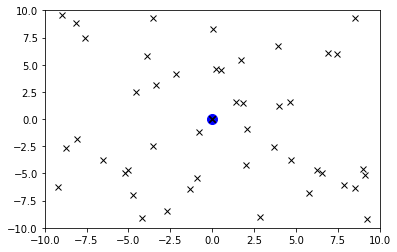

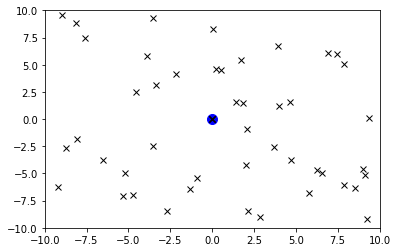

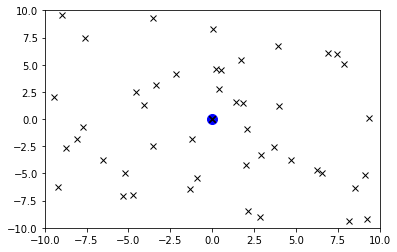

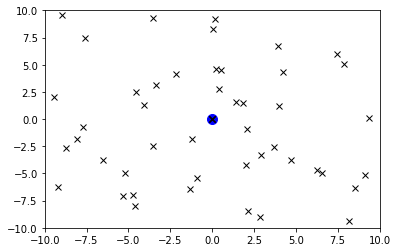

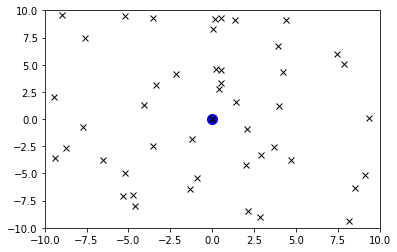

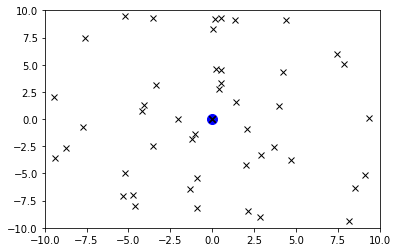

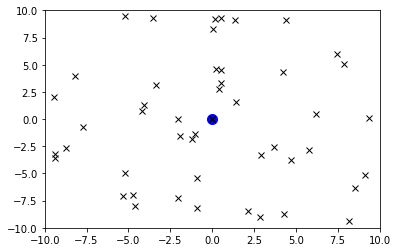

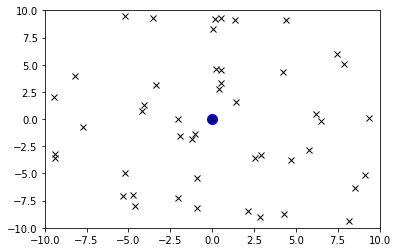

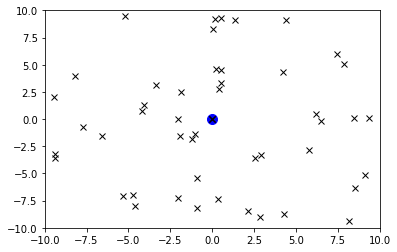

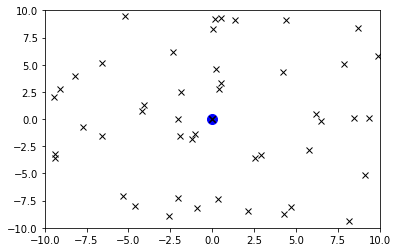

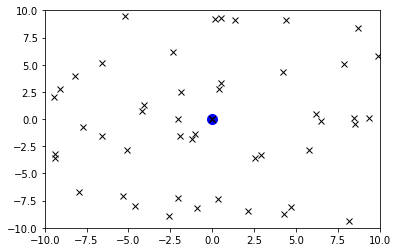

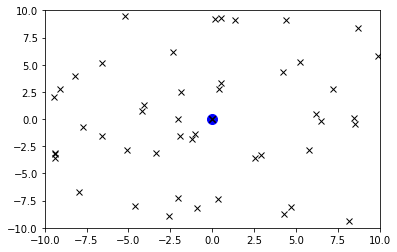

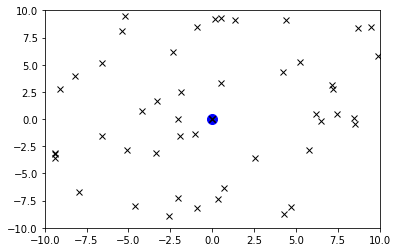

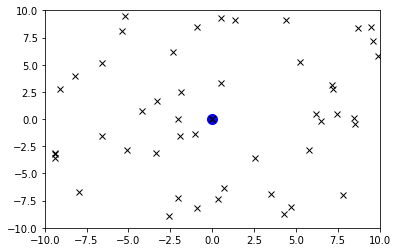

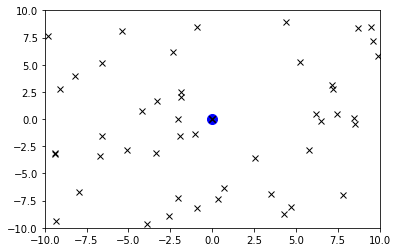

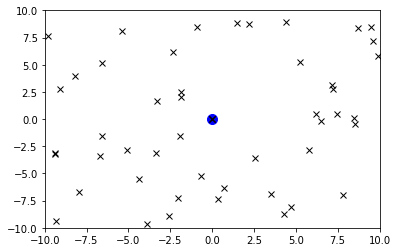

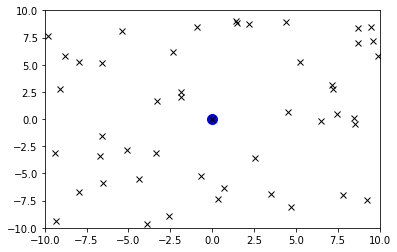

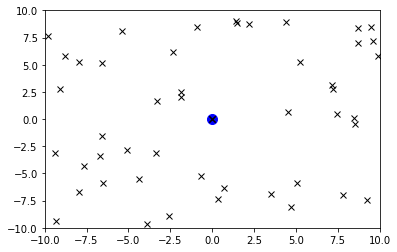

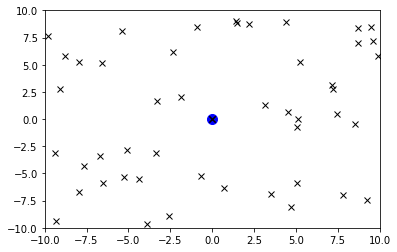

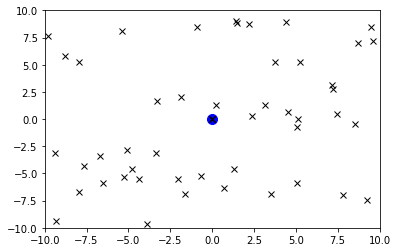

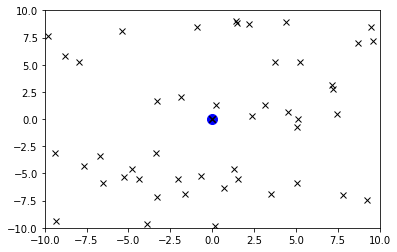

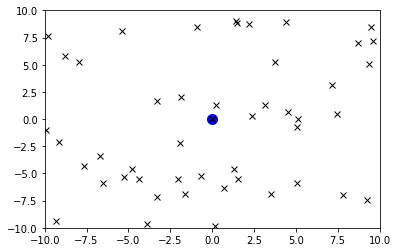

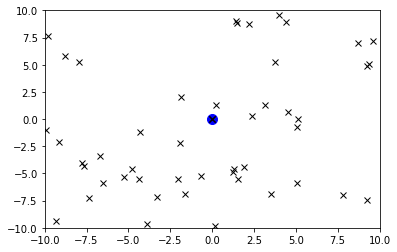

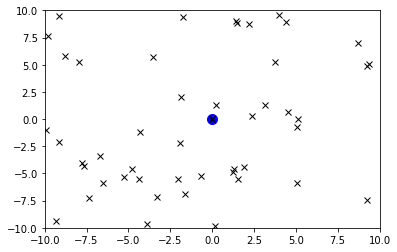

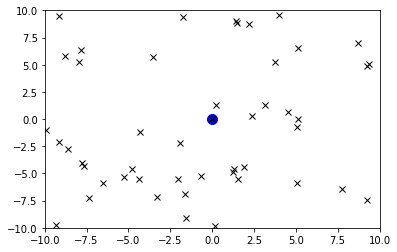

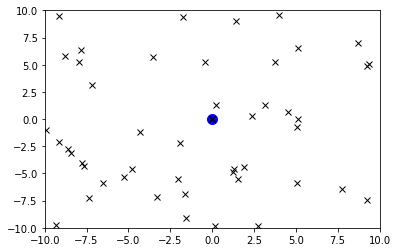

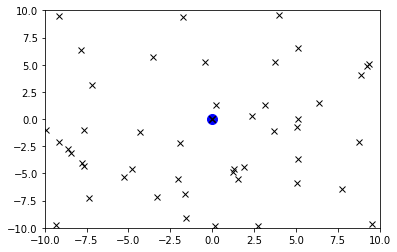

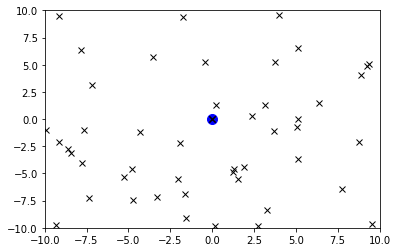

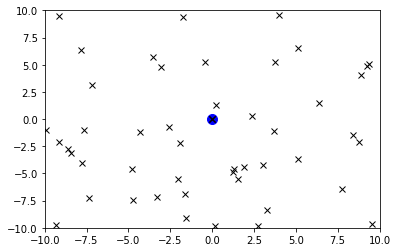

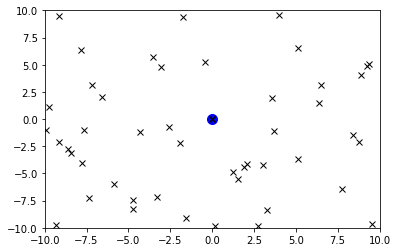

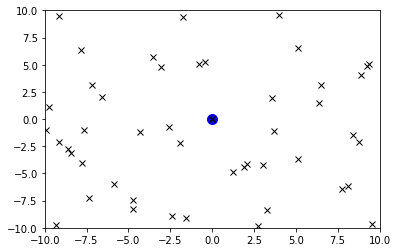

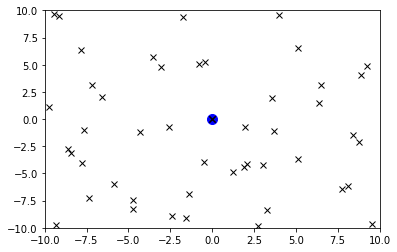

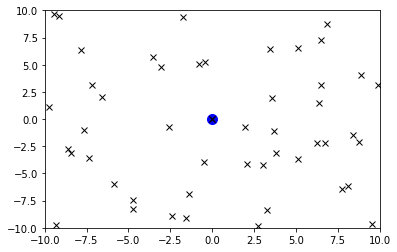

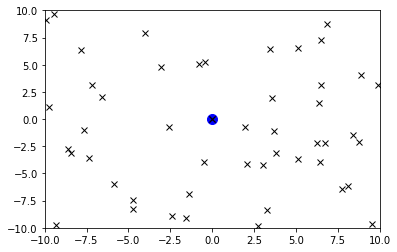

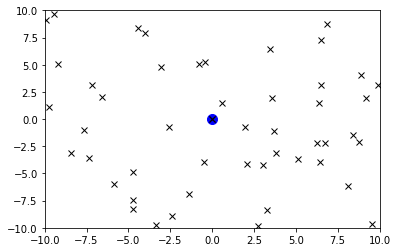

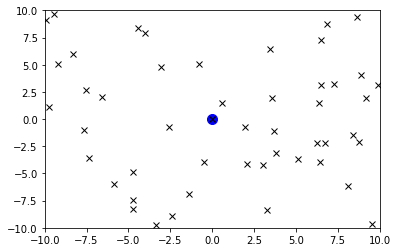

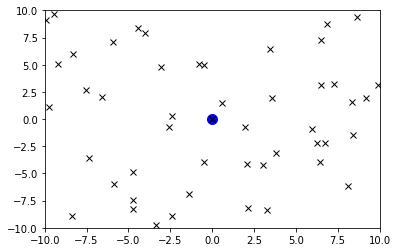

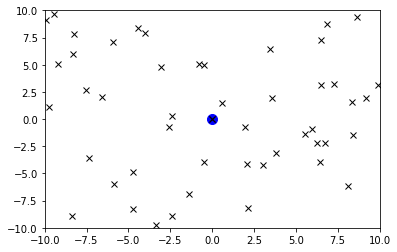

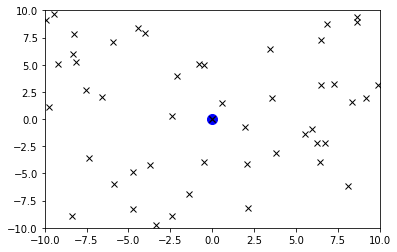

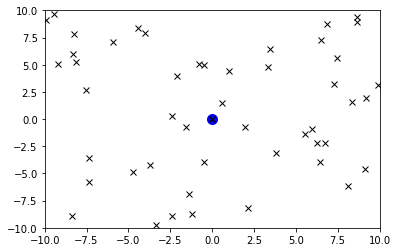

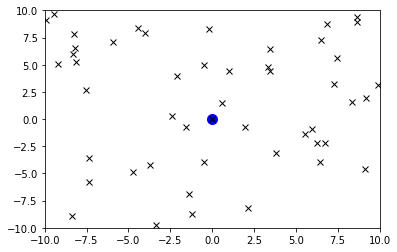

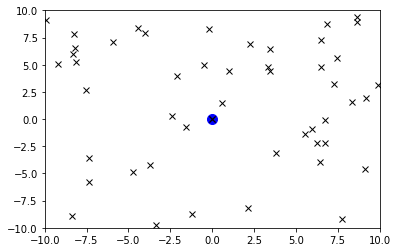

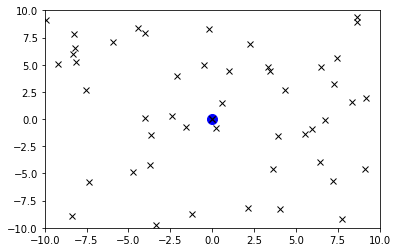

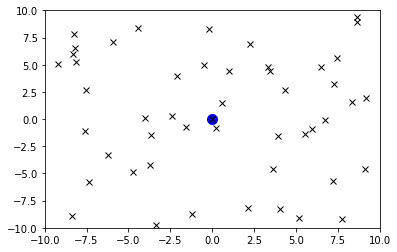

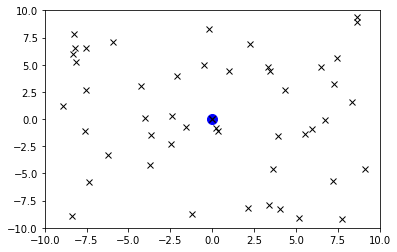

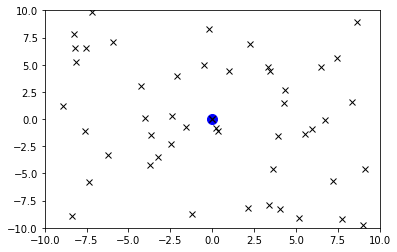

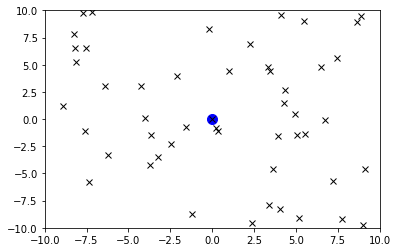

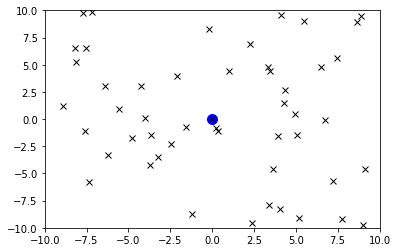

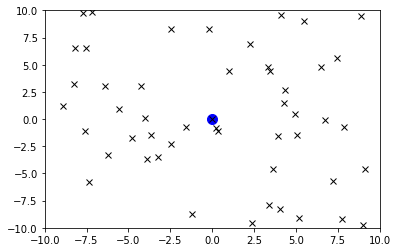

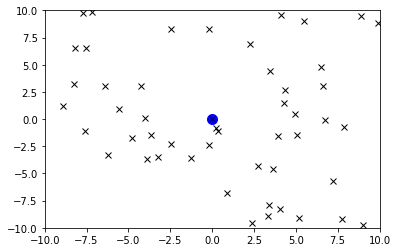

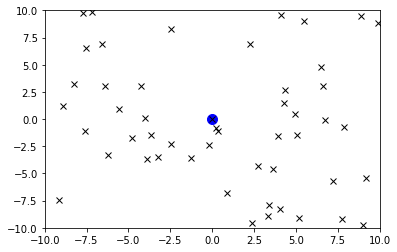

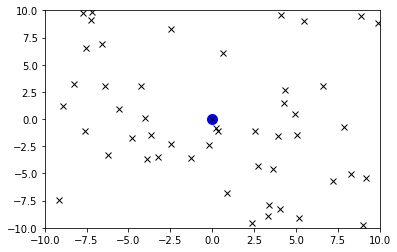

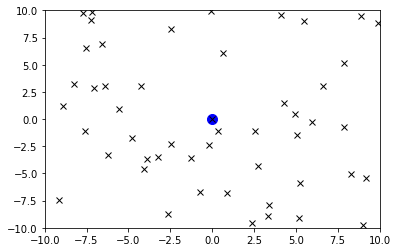

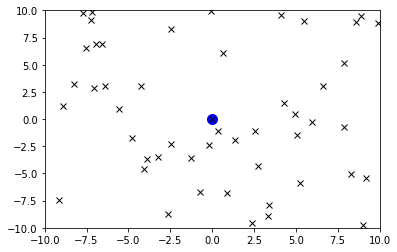

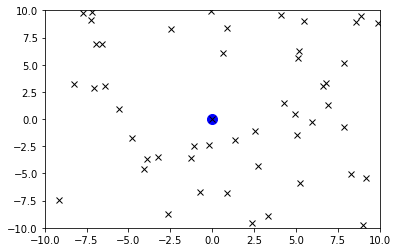

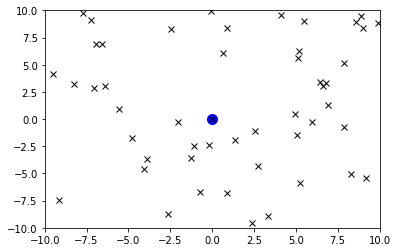

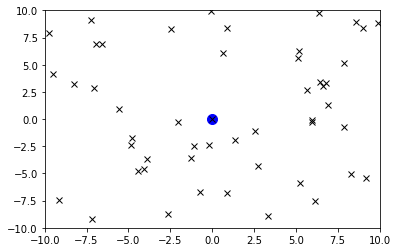

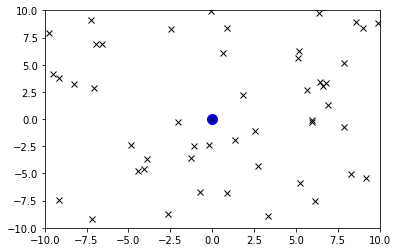

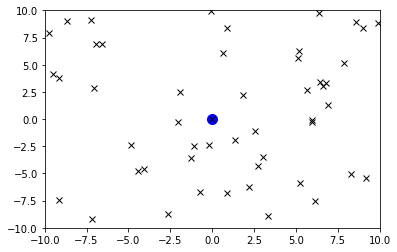

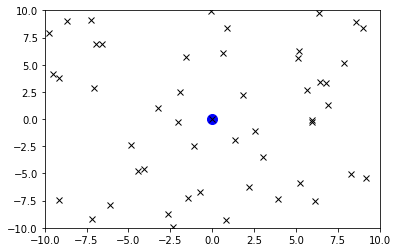

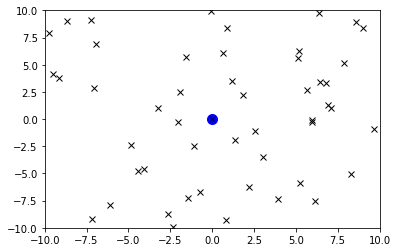

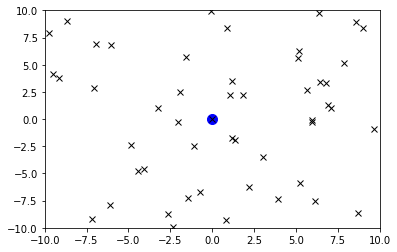

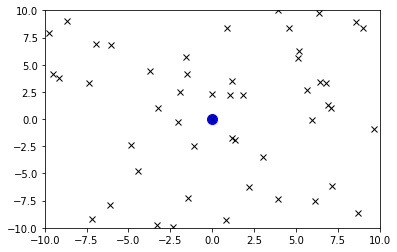

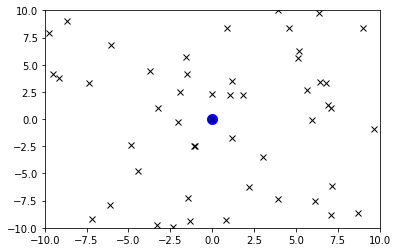

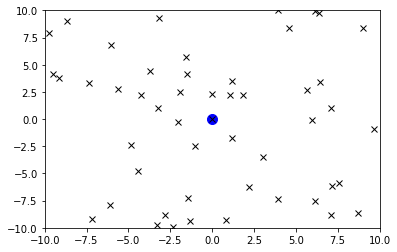

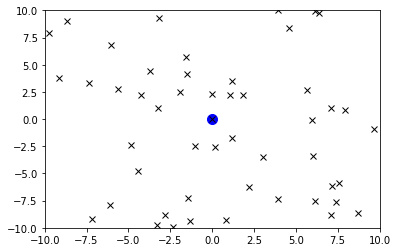

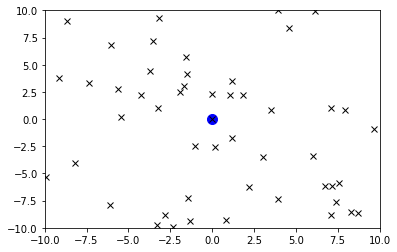

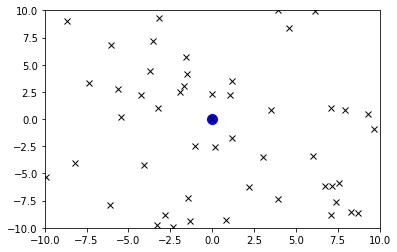

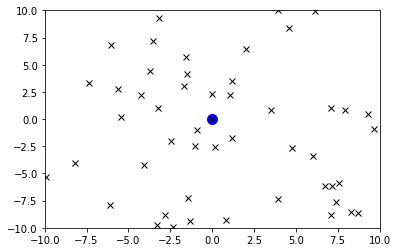

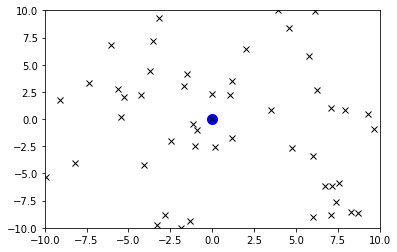

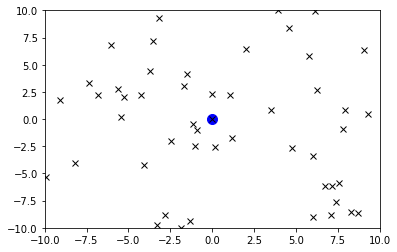

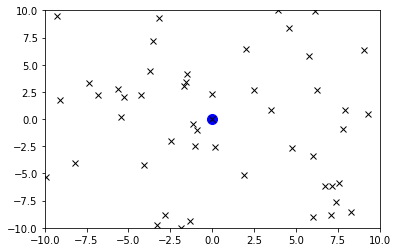

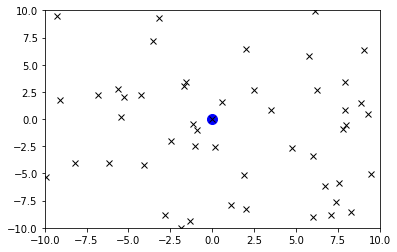

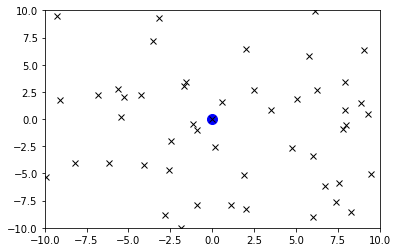

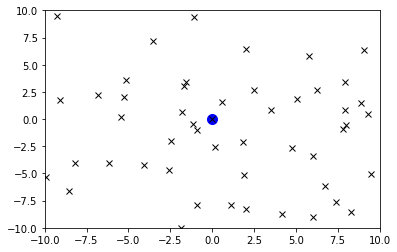

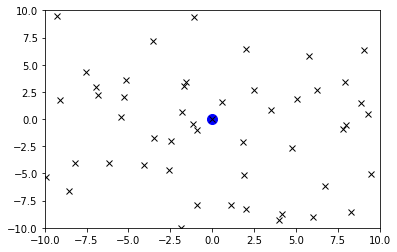

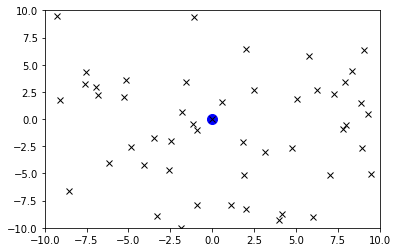

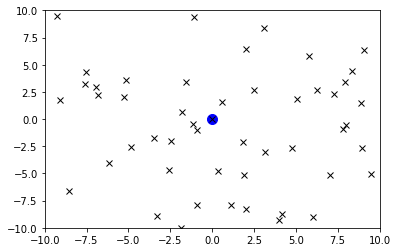

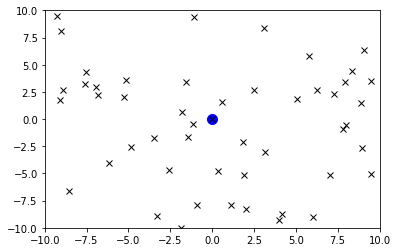

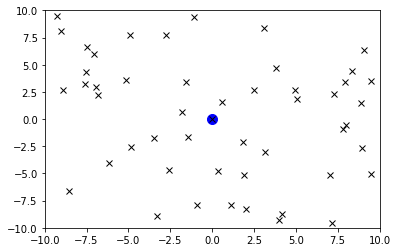

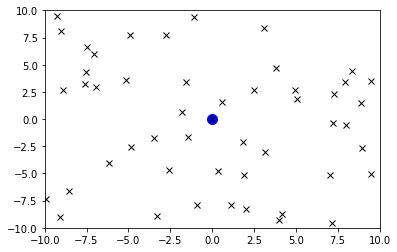

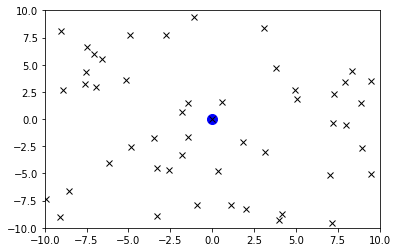

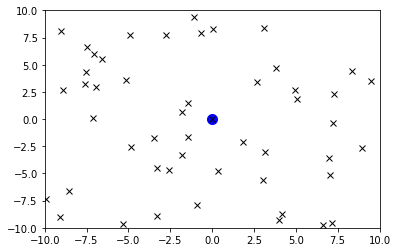

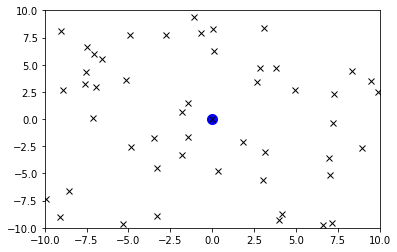

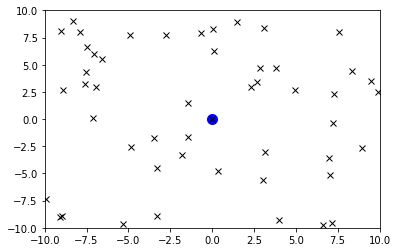

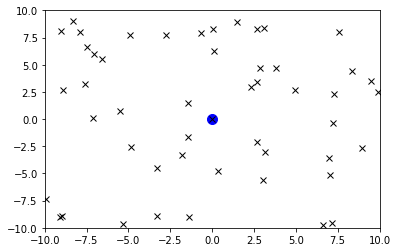

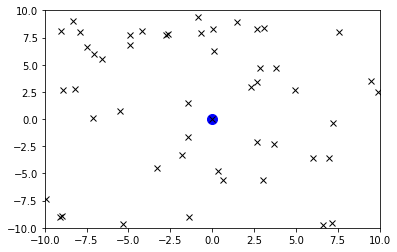

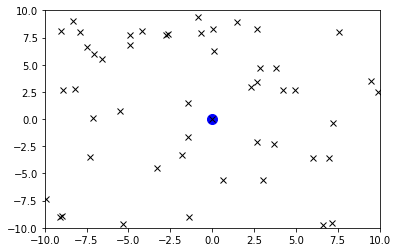

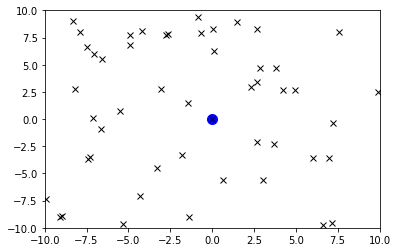

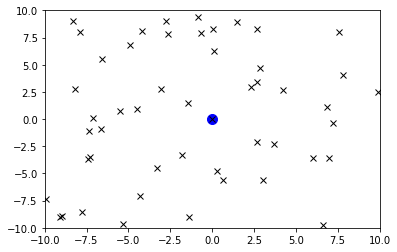

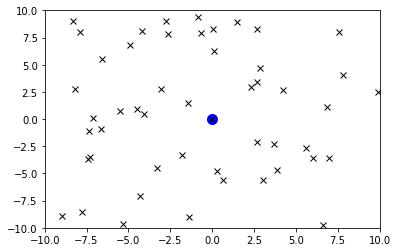

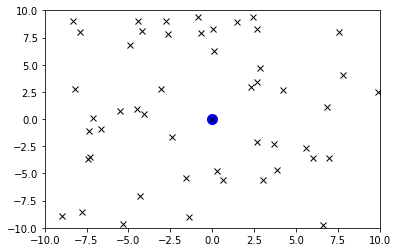

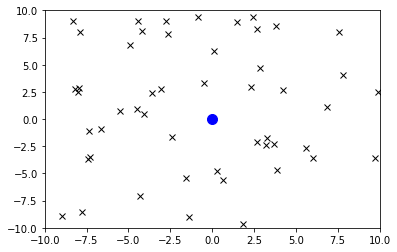

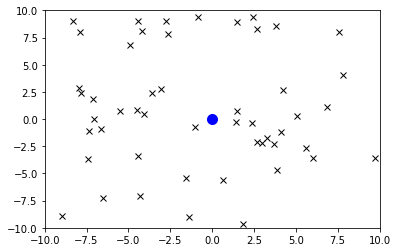

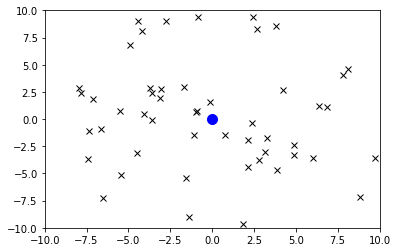

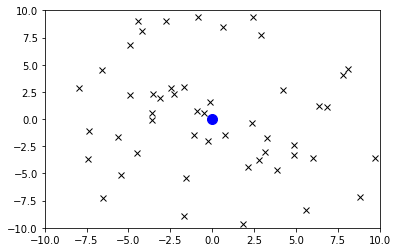

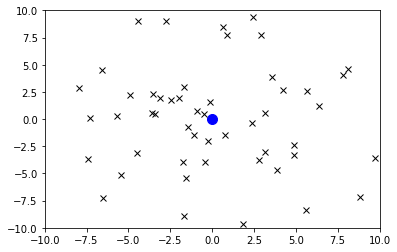

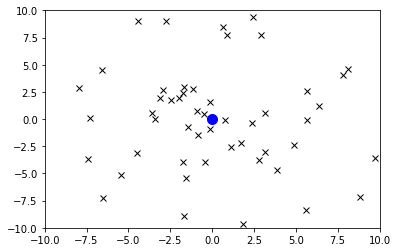

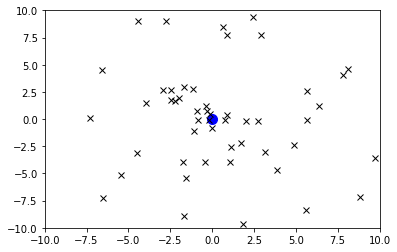

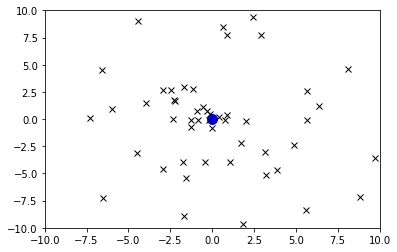

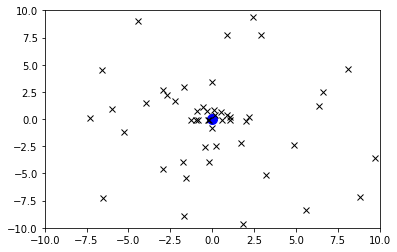

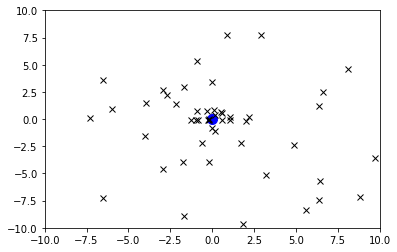

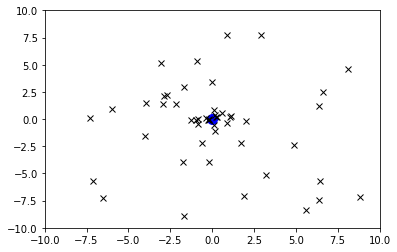

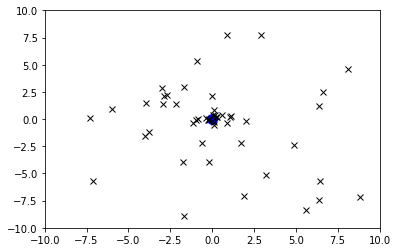

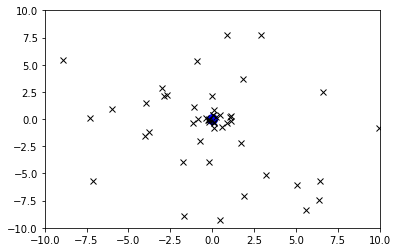

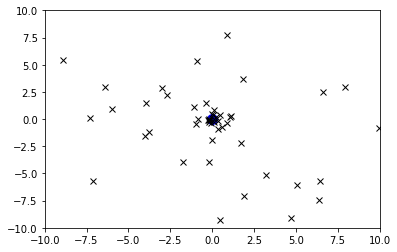

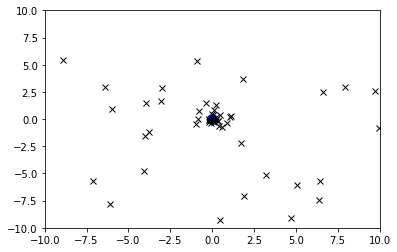

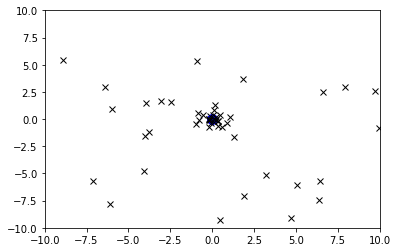

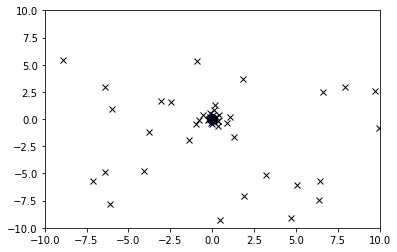

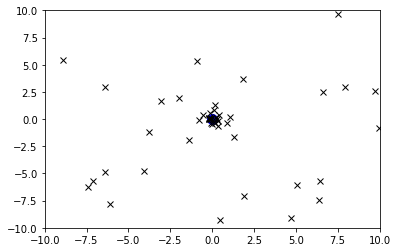

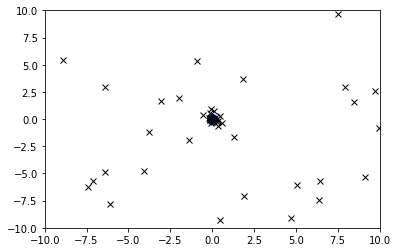

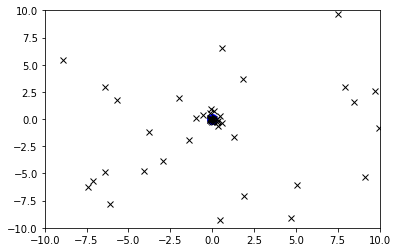

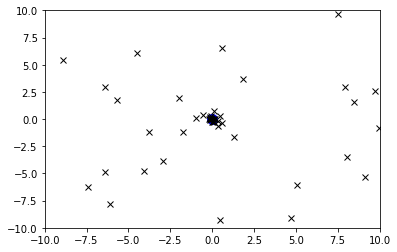

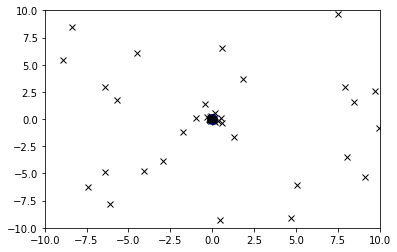

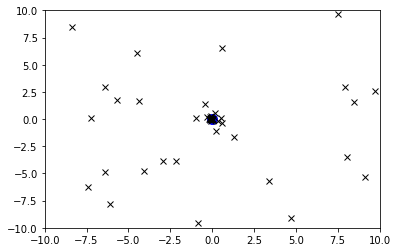

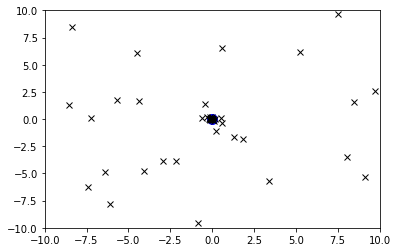

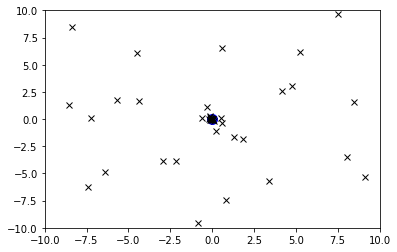

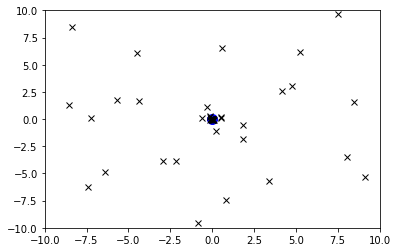

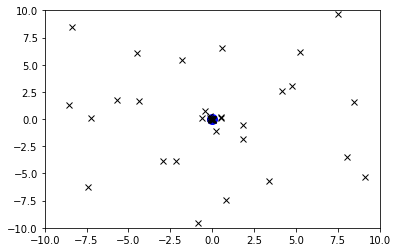

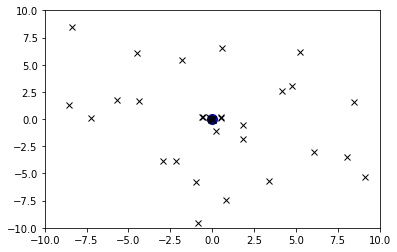

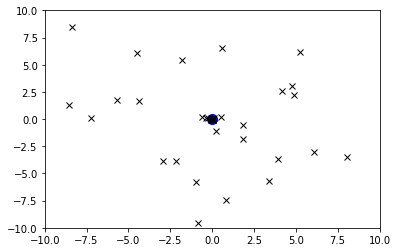

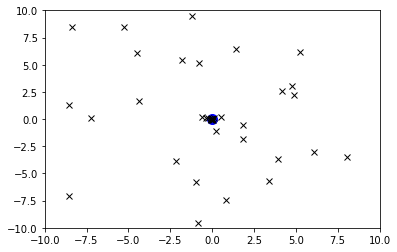

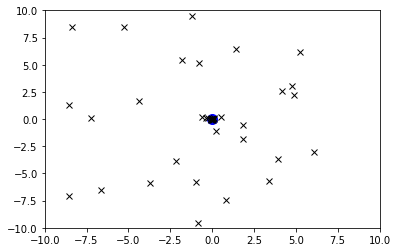

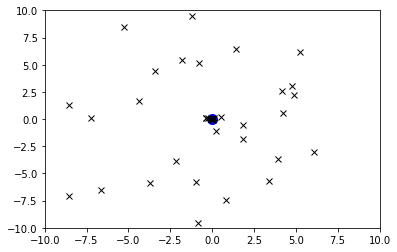

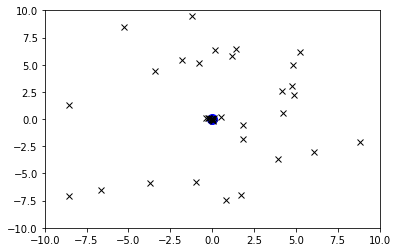

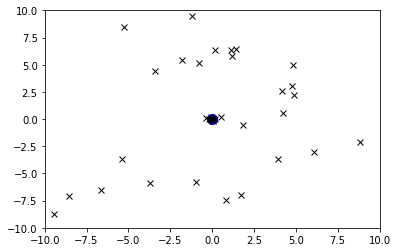

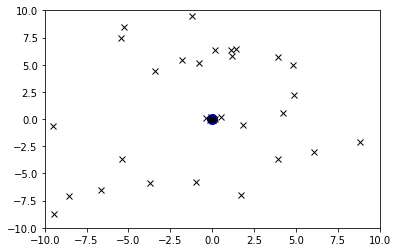

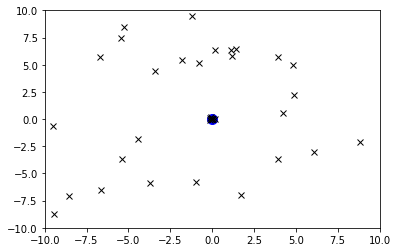

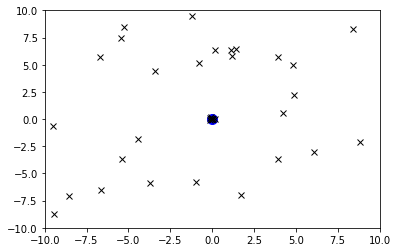

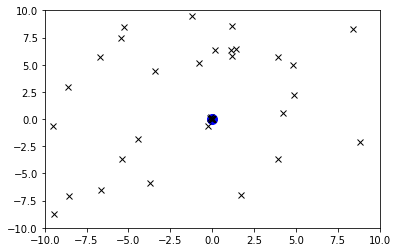

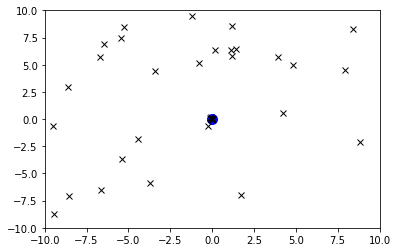

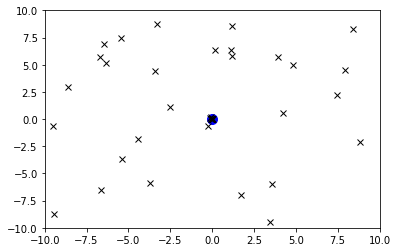

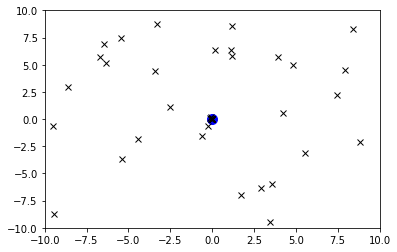

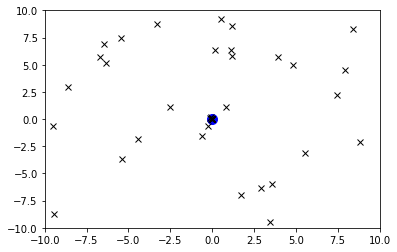

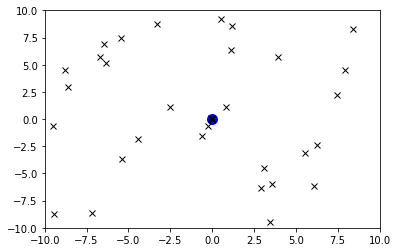

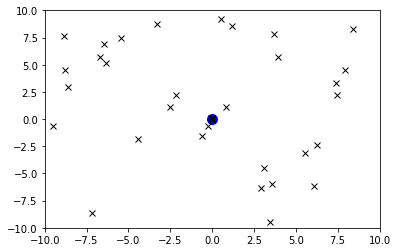

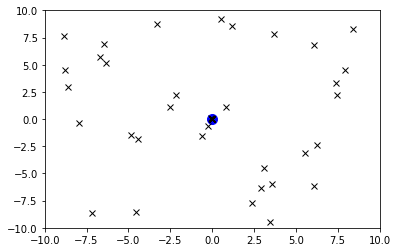

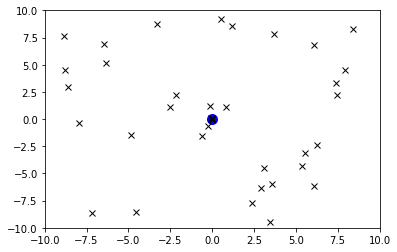

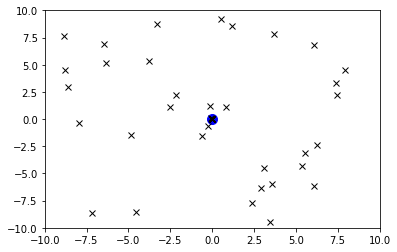

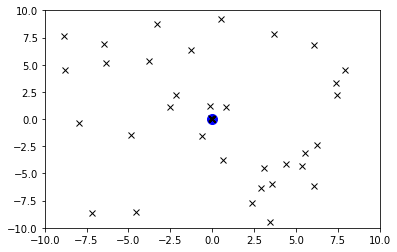

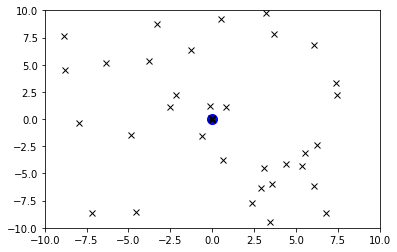

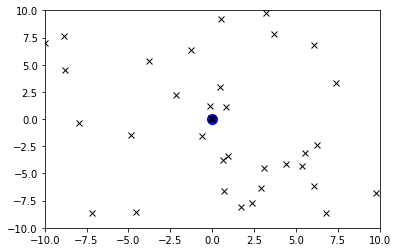

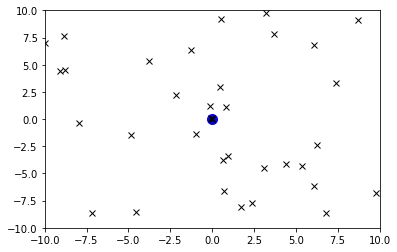

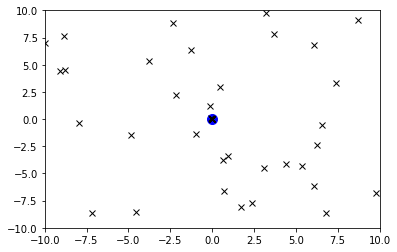

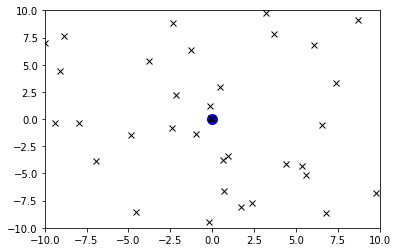

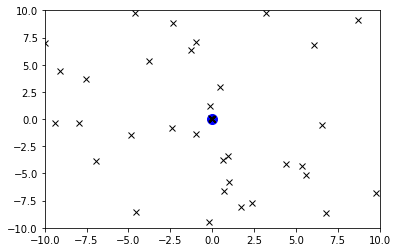

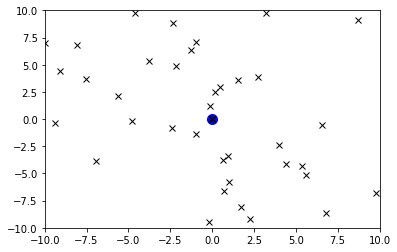

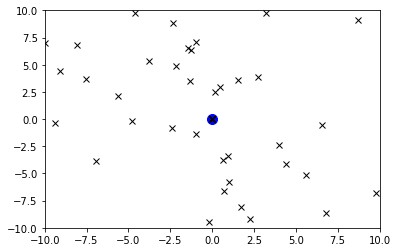

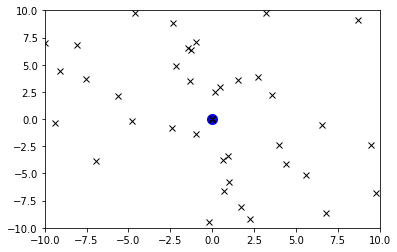

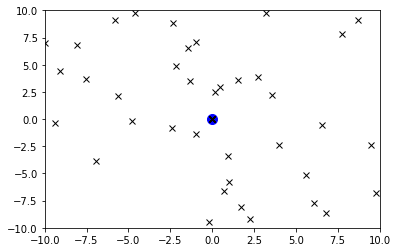

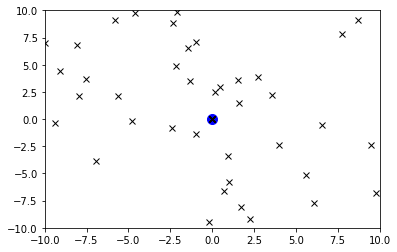

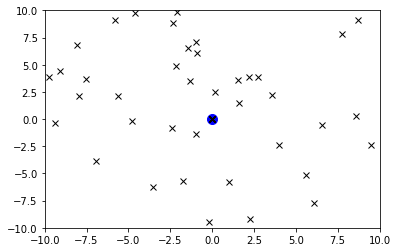

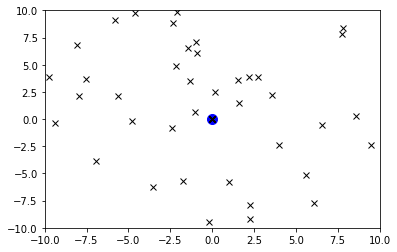

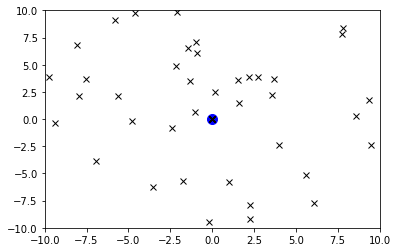

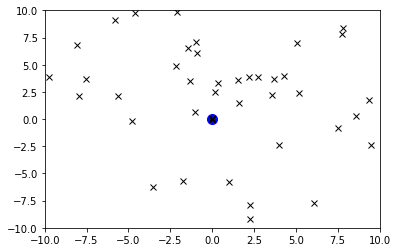

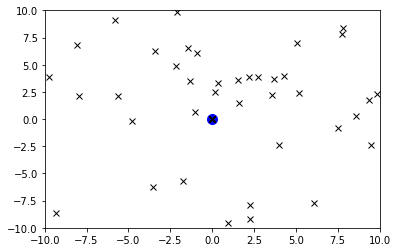

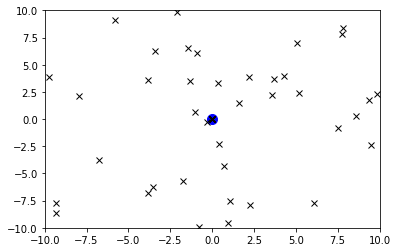

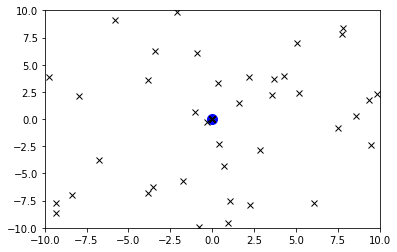

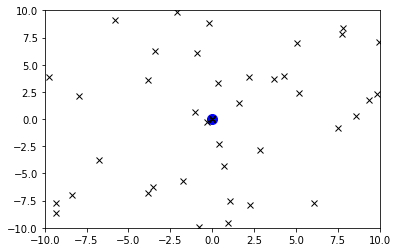

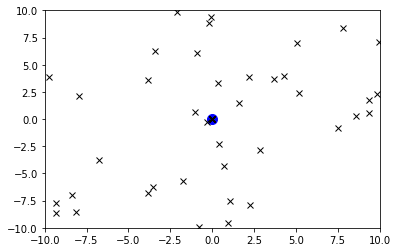

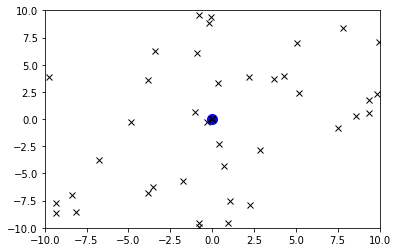

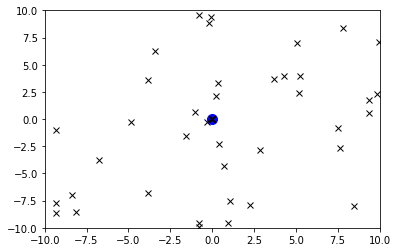

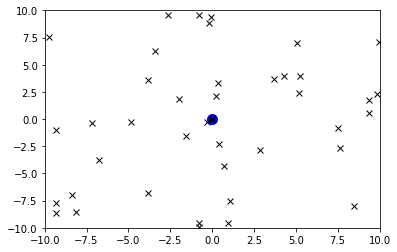

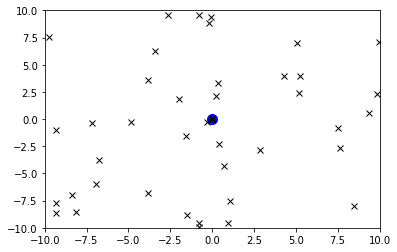

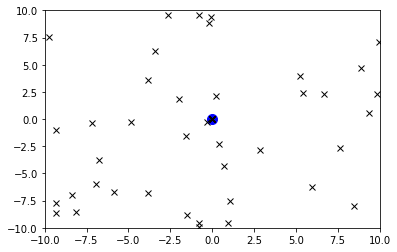

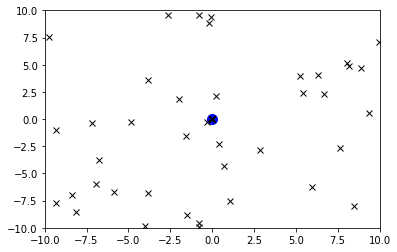

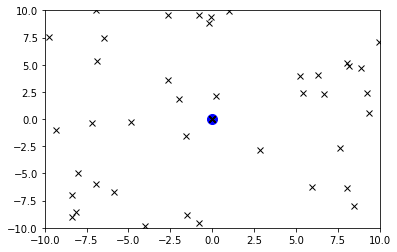

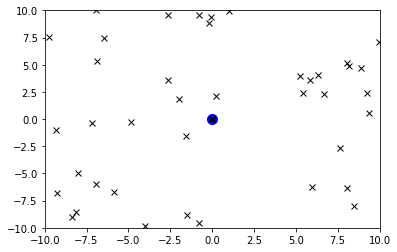

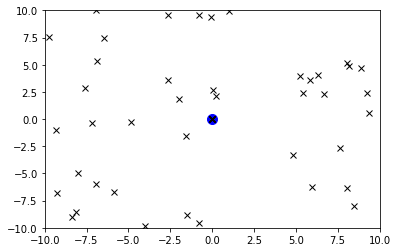

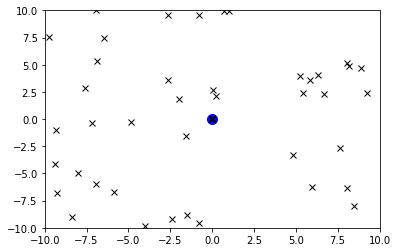

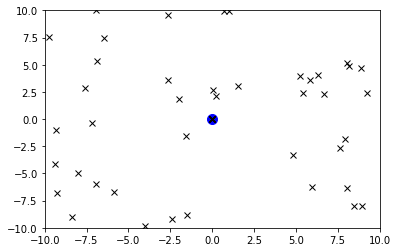

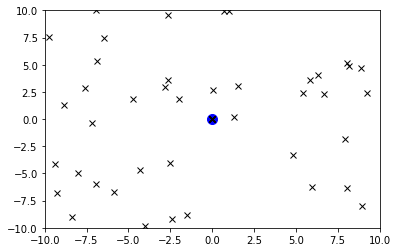

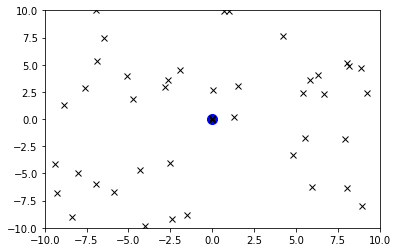

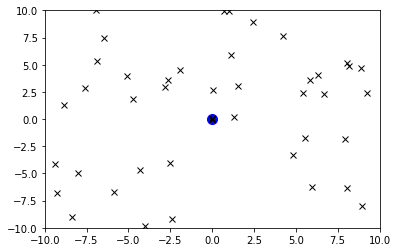

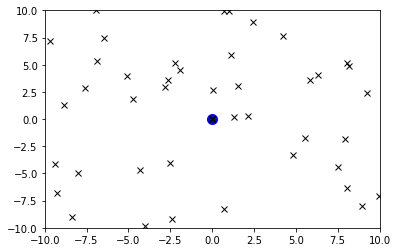

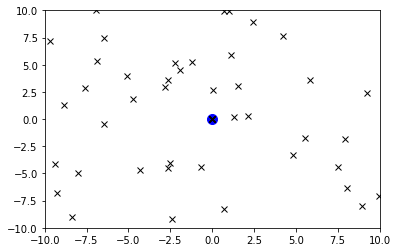

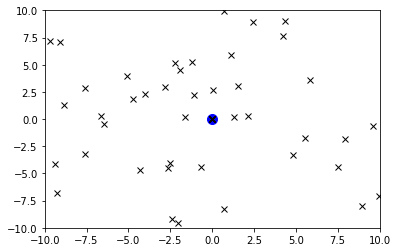

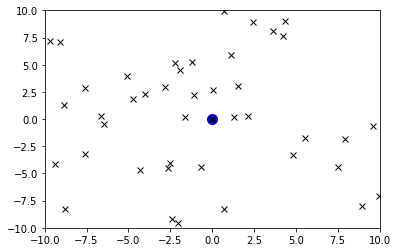

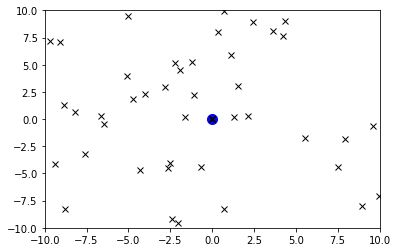

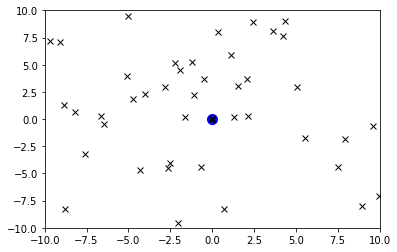

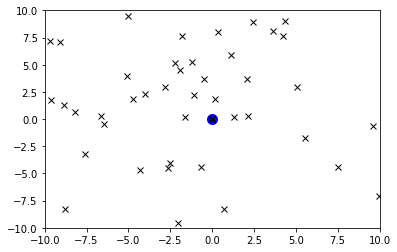

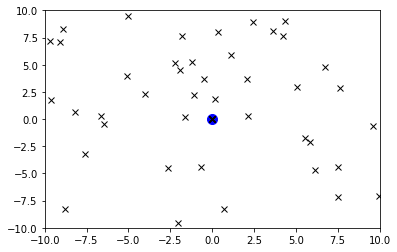

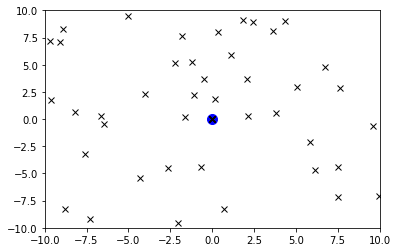

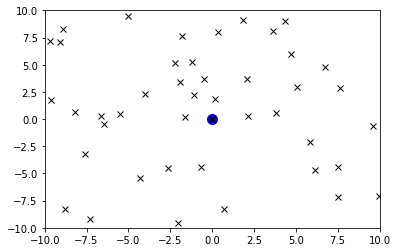

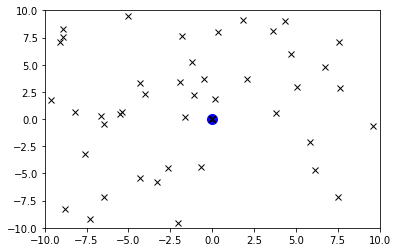

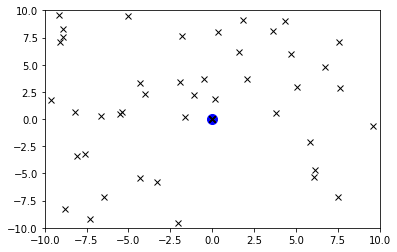

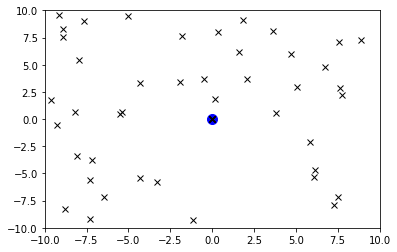

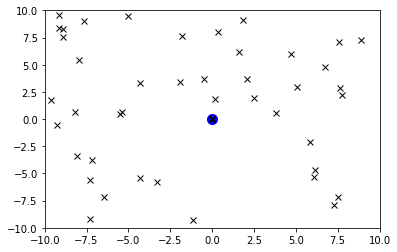

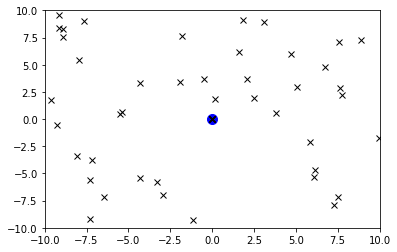

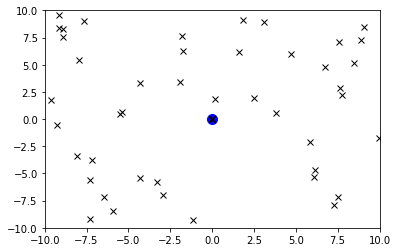

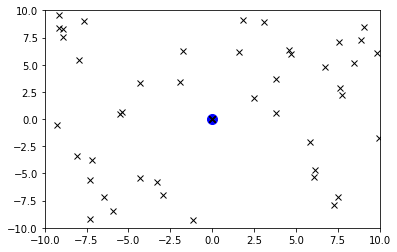

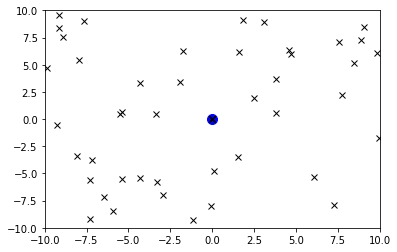

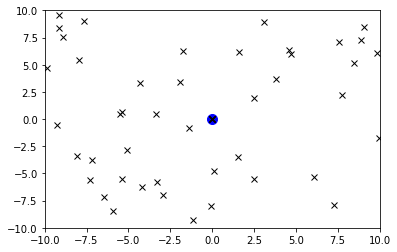

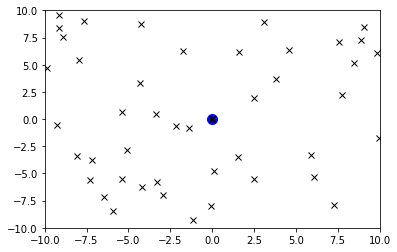

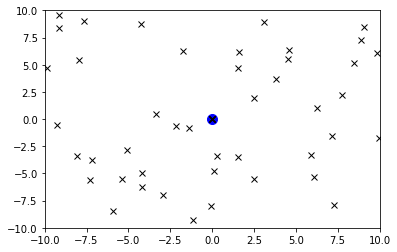

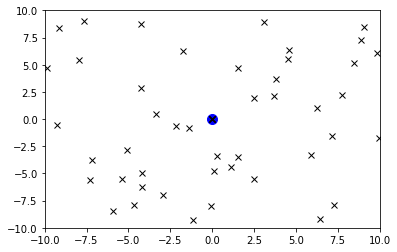

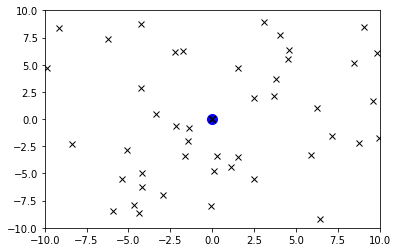

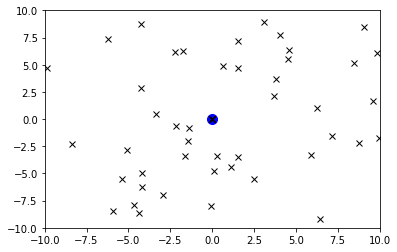

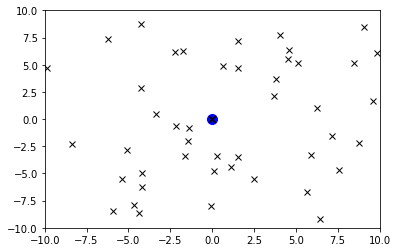

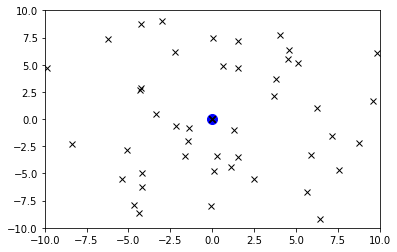

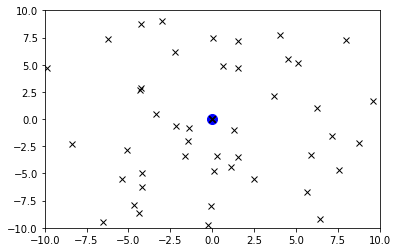

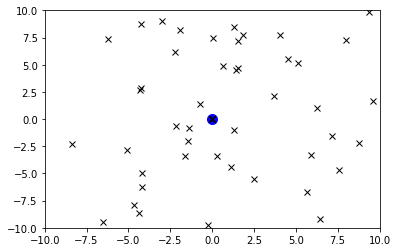

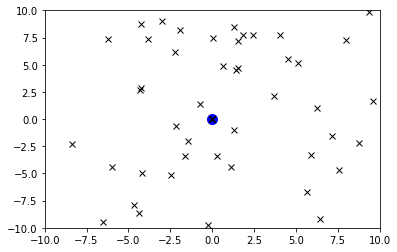

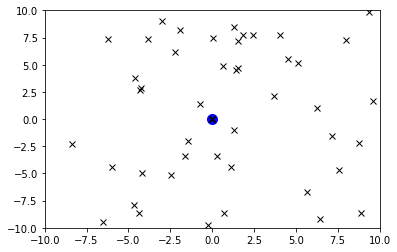

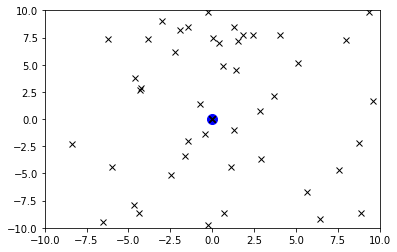

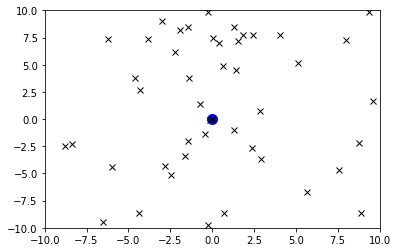

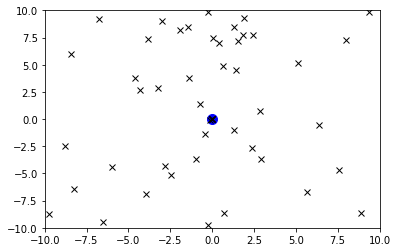

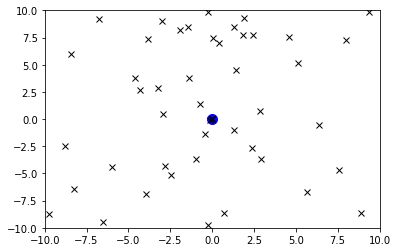

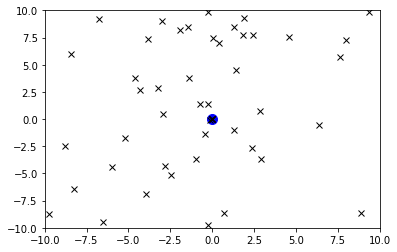

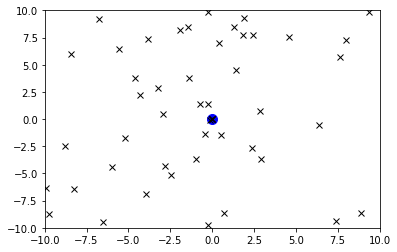

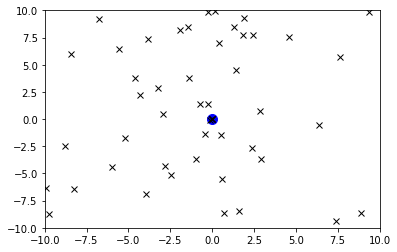

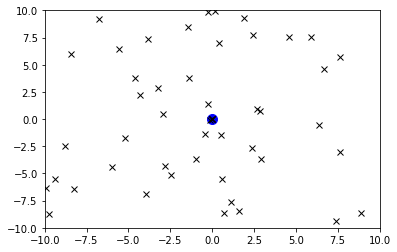

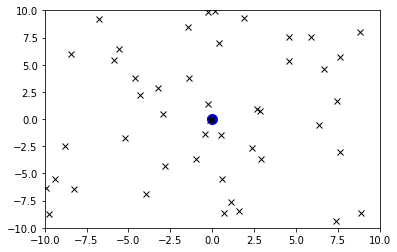

In [10]:
#Otimização

from matplotlib.animation import FuncAnimation

melhor_posicao = None
ciclo = 0

# alocando as abelhas oportunistas como trabalhadoras em suas fontes
alocar_abelhas(trabalhadoras)

while ciclo < cmax:
  ciclo += 1

  for exploradora in exploradoras:
    # movimentando as trabalhadoras de cada fonte de comida
    for trabalhadora in exploradora.trabalhadoras:
      movimenta_abelha(trabalhadora)

    # obtem a melhor posição da iteração
    melhor_posicao_iter = None
    
    if len(exploradora.trabalhadoras) == 0:
      melhor_posicao_iter = exploradora.posicao

    for trabalhadora in exploradora.trabalhadoras:
      if melhor_posicao_iter is None or fitness(trabalhadora.posicao) > fitness(melhor_posicao_iter):
        melhor_posicao_iter = trabalhadora.posicao.copy()

    # atualiza posição atual da abelha exploradora
    if melhor_posicao_iter is not None and fitness(melhor_posicao_iter) > fitness(exploradora.posicao):
      exploradora.posicao = melhor_posicao_iter.copy()
      exploradora.ciclos_sem_melhora = 0
    else:
      exploradora.ciclos_sem_melhora += 1
    
    # desfaz a exploração da fonte de comida se necessário
    if exploradora.ciclos_sem_melhora >= limite:
      exploradora.posicao = [random.uniform(-10, 10), random.uniform(-10, 10)]
      exploradora.melhor_posicao = exploradora.posicao.copy()
      exploradora.ciclos_sem_melhora = 0
      trabalhadoras_desalocadas = exploradora.trabalhadoras
      exploradora.trabalhadoras = []
      alocar_abelhas(trabalhadoras_desalocadas)

    # atuaiza melhor posicao global
    if melhor_posicao is None or fitness(melhor_posicao_iter) > fitness(melhor_posicao):
      melhor_posicao = melhor_posicao_iter.copy()

  # mostrando no gráfico as posições atuais de cada abelha exploradora
  plt.axis([-10, 10, -10, 10])
  plt.plot(0,0, marker='o', markersize=10, color='b')

  for i in range(nf):
    exploradora = exploradoras[i]
    x, y = zip(exploradora.posicao)
    plt.plot(x, y, marker='x', color='k')
  
  plt.show()

In [11]:
# Resultado

print(str(melhor_posicao))

[-7.587747011312757e-15, -1.3377216769841568e-15]
